<h1 style="font-size: 4em; color: #000000; text-shadow: 2px 2px 4px #000000, 0 0 10px #000000, 0 0 20px #000000; text-align: center; font-weight: bold; text-transform: uppercase;">Marketing Insights</h1>


<h1 style="font-size: 4em; color: #000000; text-shadow: 2px 2px 4px #000000, 0 0 10px #000000, 0 0 20px #000000; text-align: center; font-weight: bold; text-transform: uppercase;">For </h1>

<h1 style="font-size: 4em; color: #000000; text-shadow: 2px 2px 4px #000000, 0 0 10px #000000, 0 0 20px #000000; text-align: center; font-weight: bold; text-transform: uppercase;">E-Commerce Company </h1>

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf # Optimization of straight line
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF Selection
from patsy import dmatrices # Dependency for VIF


from sklearn.cluster import KMeans 
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#library that provide association rule functunality
from mlxtend.frequent_patterns import apriori  
from mlxtend.frequent_patterns import association_rules
from sklearn.compose import make_column_transformer
#Library for evaluation metrices
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.metrics import  silhouette_score


from sklearn.metrics import confusion_matrix,classification_report

#

# Business Context:
## One of the leading E-Commerce Company would like to get marketing insights from the data to define marketing strategies going forward. Also, expecting to build an analytical dashboard to monitor various KPI’s & business metricscs.

## Available Data: 
### Transaction  data has been provided for the period of 1st Jan 2019 to 31st Dec 2019. The below datasets have been provided ed

### 1) Online_Sales.csv : This file contains actual orders data (point of Sales data) at transaction level with below variables.### 2) Customers_Data.csv : This file contains customer’s demographics.### 3) Discount_Coupon.csv : Discount coupons have been given for different categories in different months### 4) Marketing_Spend.csv : Marketing spend on both offline & online channels on day wise.
### 5) Tax_Amount.csv : GST Details for given category.s.

#

### importing the datasets

In [2]:
Online_Sales=pd.read_csv("D:/A LABS FLODER/ML using python/CASE STUDYS/Finding-Marketing-Insights/Datasets/Online_Sales.csv")
Customers_Data=pd.read_excel("D:/A LABS FLODER/ML using python/CASE STUDYS/Finding-Marketing-Insights/Datasets/CustomersData.xlsx")
Discount_Coupon=pd.read_csv("D:/A LABS FLODER/ML using python/CASE STUDYS/Finding-Marketing-Insights/Datasets/Discount_Coupon.csv")
Marketing_Spend=pd.read_csv("D:/A LABS FLODER/ML using python/CASE STUDYS/Finding-Marketing-Insights/Datasets/Marketing_Spend.csv")
Tax_Amount=pd.read_excel("D:/A LABS FLODER/ML using python/CASE STUDYS/Finding-Marketing-Insights/Datasets/Tax_amount.xlsx")

In [3]:
Online_Sales

CustomerID  Transaction_ID  Transaction_Date     Product_SKU  \
0           17850           16679          20190101  GGOENEBJ079499   
1           17850           16680          20190101  GGOENEBJ079499   
2           17850           16681          20190101  GGOEGFKQ020399   
3           17850           16682          20190101  GGOEGAAB010516   
4           17850           16682          20190101  GGOEGBJL013999   
...           ...             ...               ...             ...   
52919       14410           48493          20191231  GGOENEBB078899   
52920       14410           48494          20191231  GGOEGAEB091117   
52921       14410           48495          20191231  GGOENEBQ084699   
52922       14600           48496          20191231  GGOENEBQ079199   
52923       14600           48497          20191231  GGOENEBQ079099   

                                     Product_Description Product_Category  \
0      Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1      Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2                  Google Laptop and Cell Phone Stickers           Office   
3      Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                        Google Canvas Tote Natural/Navy             Bags   
...                                                  ...              ...   
52919              Nest Cam Indoor Security Camera - USA         Nest-USA   
52920                            Google Zip Hoodie Black          Apparel   
52921       Nest Learning Thermostat 3rd Gen-USA - White         Nest-USA   
52922      Nest Protect Smoke + CO White Wired Alarm-USA         Nest-USA   
52923    Nest Protect Smoke + CO White Battery Alarm-USA         Nest-USA   

       Quantity  Avg_Price  Delivery_Charges Coupon_Status  
0             1     153.71              6.50          Used  
1             1     153.71              6.50          Used  
2             1       2.05              6.50          Used  
3             5      17.53              6.50      Not Used  
4             1      16.50              6.50          Used  
...         ...        ...               ...           ...  
52919         1     121.30              6.50       Clicked  
52920         1      48.92              6.50          Used  
52921         1     151.88              6.50          Used  
52922         5      80.52              6.50       Clicked  
52923         4      80.52             19.99       Clicked  

[52924 rows x 10 columns]

In [4]:
Customers_Data

CustomerID Gender    Location  Tenure_Months
0          17850      M     Chicago             12
1          13047      M  California             43
2          12583      M     Chicago             33
3          13748      F  California             30
4          15100      M  California             49
...          ...    ...         ...            ...
1463       14438      F    New York             41
1464       12956      F     Chicago             48
1465       15781      M  New Jersey             19
1466       14410      F    New York             45
1467       14600      F  California              7

[1468 rows x 4 columns]

In [5]:
Discount_Coupon.rename(columns={'Product_Category ': 'Product_Category'},inplace=True)

In [6]:
Discount_Coupon

Month      Product_Category Coupon_Code  Discount_pct
0     Jan               Apparel      SALE10            10
1     Feb               Apparel      SALE20            20
2     Mar               Apparel      SALE30            30
3     Jan              Nest-USA      ELEC10            10
4     Feb              Nest-USA      ELEC20            20
..    ...                   ...         ...           ...
199   Nov  Notebooks & Journals        NJ20            20
200   Dec  Notebooks & Journals        NJ30            30
201   Oct               Android       AND10            10
202   Nov               Android       AND20            20
203   Dec               Android       AND30            30

[204 rows x 4 columns]

In [7]:
Marketing_Spend

Date  Offline_Spend  Online_Spend
0      1/1/2019           4500       2424.50
1      1/2/2019           4500       3480.36
2      1/3/2019           4500       1576.38
3      1/4/2019           4500       2928.55
4      1/5/2019           4500       4055.30
..          ...            ...           ...
360  12/27/2019           4000       3396.87
361  12/28/2019           4000       3246.84
362  12/29/2019           4000       2546.58
363  12/30/2019           4000        674.31
364  12/31/2019           4000       2058.75

[365 rows x 3 columns]

In [8]:
Tax_Amount

Product_Category   GST
0               Nest-USA  0.10
1                 Office  0.10
2                Apparel  0.18
3                   Bags  0.18
4              Drinkware  0.18
5              Lifestyle  0.18
6   Notebooks & Journals  0.05
7               Headgear  0.05
8                   Waze  0.18
9                    Fun  0.18
10           Nest-Canada  0.10
11             Backpacks  0.10
12                Google  0.10
13               Bottles  0.05
14            Gift Cards  0.05
15             More Bags  0.18
16            Housewares  0.12
17               Android  0.10
18           Accessories  0.10
19                  Nest  0.05

# Data Merging 

In [9]:
# Find values present in Online_Sales but not in Discount_Coupon and Discount_Coupon but not in Online_Sales
columns_only_in_online_sales = set(Online_Sales.Product_Category) - set(Discount_Coupon.Product_Category)
values_only_in_online_sale = set(Discount_Coupon.Product_Category) - set(Online_Sales.Product_Category)
print(columns_only_in_online_sales)
print(values_only_in_online_sale)

{'More Bags', 'Backpacks', 'Fun', 'Google'}
{'Notebooks'}


In [10]:
# Define a dictionary to map old values to new values
value_1 = {'Nest-USA': 'Nest-USA', 'Office': 'Office', 'Apparel': 'Apparel',
         'Bags': 'Bags', 'Backpacks': 'Bags', 'More Bags': 'Bags',
         'Drinkware': 'Drinkware', 'Lifestyle': 'Lifestyle',
         'Notebooks & Journals': 'Notebooks & Journals', 'Headgear': 'Headgear',
         'Waze': 'Waze', 'Nest-Canada': 'Nest-Canada', 'Housewares': 'Housewares',
         'Nest': 'Nest', 'Bottles': 'Bottles', 'Gift Cards': 'Gift Cards',
         'Android': 'Android', 'Accessories': 'Accessories', 'Fun':'Bags','Google':'Bottles'}

value_2={'Nest-USA': 'Nest-USA', 'Office': 'Office', 
         'Apparel': 'Apparel','Notebooks & Journals': 'Notebooks & Journals', 'Drinkware': 'Drinkware',                                                     ##'Notebooks':'Notebooks & Journals',
        'Lifestyle': 'Lifestyle', 'Bags': 'Bags', 'Headgear': 'Headgear',
         'Nest': 'Nest','Waze': 'Waze','Nest-Canada': 'Nest-Canada', 'Housewares': 'Housewares', 'Bottles': 'Bottles',
         'Gift Cards': 'Gift Cards','Android': 'Android', 'Accessories': 'Accessories' }

# Replace values in the 'Product_Category' column of the 'Online_Sales' DataFrame
Online_Sales['Product_Category'] = Online_Sales['Product_Category'].map(value_1)
Discount_Coupon['Product_Category'] = Discount_Coupon['Product_Category'].map(value_2)

In [11]:
# Here i am merging the Online_Sales and Customers_Data datasets

k=pd.merge(left=Online_Sales,right=Customers_Data,left_on='CustomerID',right_on='CustomerID',how='left')
print(k.shape)

# ------------------------------------------- DATA TYPE CONVERTING ------------------------------------------------------------------
# Here i am converting the data type for the k['Transaction_Date'] and Marketing_Spend['Date'] into datatime data type and extracting  months from them 

k['Transaction_Date']=pd.to_datetime(k['Transaction_Date'],format="%Y%m%d")
k['month'] = k['Transaction_Date'].dt.strftime('%b')
k['Week'] = k['Transaction_Date'].dt.isocalendar().week
k['Day'] = k['Transaction_Date'].dt.day_name()
Marketing_Spend['Date']=pd.to_datetime(Marketing_Spend['Date'],format='%m/%d/%Y')
Marketing_Spend['month']=Marketing_Spend['Date'].dt.strftime('%b')
#--------------------------------------------*********************-------------------------------------------------------------------

## Here i am merging the K(Online_Sales + Customers_Data) and Discount_Coupon datasets

kk=pd.merge(left=k,right=Discount_Coupon,left_on=['Product_Category','month'],right_on=['Product_Category','Month'],how='left')
print(kk.shape)


## Here i am merging the Kk(Online_Sales + Customers_Data+Discount_Coupon) and Tax_Amount datasets

kkk=pd.merge(left=kk,right=Tax_Amount,left_on='Product_Category',right_on='Product_Category',how='left')
print(kkk.shape)

## Here i am merging the Kk(Online_Sales + Customers_Data+Discount_Coupon+Tax_Amount) and Marketing_Spend datasets

final_df=pd.merge(left=kkk,right=Marketing_Spend,left_on='Transaction_Date',right_on='Date',how='left')
print(final_df.shape)

(52924, 13)
(52924, 19)
(52924, 20)
(52924, 24)


In [12]:
final_df = final_df.drop(columns=['Product_SKU','month_x','month_y'])

In [13]:
final_df

CustomerID  Transaction_ID Transaction_Date  \
0           17850           16679       2019-01-01   
1           17850           16680       2019-01-01   
2           17850           16681       2019-01-01   
3           17850           16682       2019-01-01   
4           17850           16682       2019-01-01   
...           ...             ...              ...   
52919       14410           48493       2019-12-31   
52920       14410           48494       2019-12-31   
52921       14410           48495       2019-12-31   
52922       14600           48496       2019-12-31   
52923       14600           48497       2019-12-31   

                                     Product_Description Product_Category  \
0      Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1      Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2                  Google Laptop and Cell Phone Stickers           Office   
3      Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                        Google Canvas Tote Natural/Navy             Bags   
...                                                  ...              ...   
52919              Nest Cam Indoor Security Camera - USA         Nest-USA   
52920                            Google Zip Hoodie Black          Apparel   
52921       Nest Learning Thermostat 3rd Gen-USA - White         Nest-USA   
52922      Nest Protect Smoke + CO White Wired Alarm-USA         Nest-USA   
52923    Nest Protect Smoke + CO White Battery Alarm-USA         Nest-USA   

       Quantity  Avg_Price  Delivery_Charges Coupon_Status Gender  ...  \
0             1     153.71              6.50          Used      M  ...   
1             1     153.71              6.50          Used      M  ...   
2             1       2.05              6.50          Used      M  ...   
3             5      17.53              6.50      Not Used      M  ...   
4             1      16.50              6.50          Used      M  ...   
...         ...        ...               ...           ...    ...  ...   
52919         1     121.30              6.50       Clicked      F  ...   
52920         1      48.92              6.50          Used      F  ...   
52921         1     151.88              6.50          Used      F  ...   
52922         5      80.52              6.50       Clicked      F  ...   
52923         4      80.52             19.99       Clicked      F  ...   

      Tenure_Months  Week      Day Month Coupon_Code Discount_pct   GST  \
0                12     1  Tuesday   Jan      ELEC10           10  0.10   
1                12     1  Tuesday   Jan      ELEC10           10  0.10   
2                12     1  Tuesday   Jan       OFF10           10  0.10   
3                12     1  Tuesday   Jan      SALE10           10  0.18   
4                12     1  Tuesday   Jan       AIO10           10  0.18   
...             ...   ...      ...   ...         ...          ...   ...   
52919            45     1  Tuesday   Dec      ELEC30           30  0.10   
52920            45     1  Tuesday   Dec      SALE30           30  0.18   
52921            45     1  Tuesday   Dec      ELEC30           30  0.10   
52922             7     1  Tuesday   Dec      ELEC30           30  0.10   
52923             7     1  Tuesday   Dec      ELEC30           30  0.10   

            Date Offline_Spend  Online_Spend  
0     2019-01-01          4500       2424.50  
1     2019-01-01          4500       2424.50  
2     2019-01-01          4500       2424.50  
3     2019-01-01          4500       2424.50  
4     2019-01-01          4500       2424.50  
...          ...           ...           ...  
52919 2019-12-31          4000       2058.75  
52920 2019-12-31          4000       2058.75  
52921 2019-12-31          4000       2058.75  
52922 2019-12-31          4000       2058.75  
52923 2019-12-31          4000       2058.75  

[52924 rows x 21 columns]

## Data Exploratory analysis

In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_Description  52924 non-null  object        
 4   Product_Category     52924 non-null  object        
 5   Quantity             52924 non-null  int64         
 6   Avg_Price            52924 non-null  float64       
 7   Delivery_Charges     52924 non-null  float64       
 8   Coupon_Status        52924 non-null  object        
 9   Gender               52924 non-null  object        
 10  Location             52924 non-null  object        
 11  Tenure_Months        52924 non-null  int64         
 12  Week                 52924 non-null  UInt32        
 13  Day                  52924 non-

In [15]:
final_df.isna().sum()

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
Gender                 0
Location               0
Tenure_Months          0
Week                   0
Day                    0
Month                  0
Coupon_Code            0
Discount_pct           0
GST                    0
Date                   0
Offline_Spend          0
Online_Spend           0
dtype: int64

## Number of rows & Number of columns in the dataset

In [16]:
print("In this final_df dataframe having " + str(len(final_df)) + " rows and " + str(len(final_df.columns)) + " columns are there")

In this final_df dataframe having 52924 rows and 21 columns are there


## Number of numerical & categorical columns in the data set

In [17]:
num_old_df= final_df.select_dtypes(include=['float64', 'int64'])
obj_old_df=final_df.select_dtypes(include='object')
datetime_columns = final_df.select_dtypes(include='datetime64')
no_of_numericals_columns=len(num_old_df.columns)
no_of_categorical_columns=len(obj_old_df.columns)
no_of_datetime_columns=len(datetime_columns.columns)
print("In the above final_df dataframe having "+ str(no_of_numericals_columns)+ " numericals_columns and "+ str(no_of_categorical_columns)+ " categorical_columns and " +str(no_of_datetime_columns)+ " datetime_columns are there")

In the above final_df dataframe having 10 numericals_columns and 8 categorical_columns and 2 datetime_columns are there


## description about numericals_columns

In [18]:
def custom_description( x ):
    
    non_missing = x.isnull().count()
    missing = x.isnull().sum()
    missing_pct = missing / non_missing
    
    p25 = x.quantile(0.25)
    p75 = x.quantile(0.75)
    
    iqr = p75 - p25
    
    lc_iqr = p25 - 1.5 * iqr
    uc_iqr = p75 + 1.5 * iqr
    
    return pd.Series( [ x.dtypes, x.count(), x.nunique(), non_missing, missing, missing_pct, 
                       x.sum(), x.var(), x.std(), x.mean(), 
                       iqr, lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.50), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max()],
                     
                    index = ['dtype', 'rows','unique values', 'non_missing', 'missing', 'missing_pct',
                             'sum', 'var', 'std', 'mean',
                             'Interquartile Range', 'IQR lower bound', 'IQR upper bound',
                             'min', '1%', '5%', '10%', 
                             '25%', '50%', '75%', 
                             '90%', '95%', '99%', 'max'])


In [19]:
num_old_df.apply(custom_description)

CustomerID   Transaction_ID    Quantity    Avg_Price  \
dtype                         int64            int64       int64      float64   
rows                          52924            52924       52924        52924   
unique values                  1468            25061         151          546   
non_missing                   52924            52924       52924        52924   
missing                           0                0           0            0   
missing_pct                     0.0              0.0         0.0          0.0   
sum                       812209270       1715257614      238033    2764625.2   
var                  3120720.172992  74799475.072798  404.199397  4096.880892   
std                      1766.55602      8648.668977   20.104711    64.006882   
mean                    15346.70981     32409.825675    4.497638    52.237646   
Interquartile Range         3127.25         13742.25         1.0        96.43   
IQR lower bound            9178.125         4770.625        -0.5     -138.945   
IQR upper bound           21687.125        59739.625         3.5      246.775   
min                           12346            16679           1         0.39   
1%                          12413.0         17053.23         1.0         0.99   
5%                          12585.0          18487.0         1.0         1.99   
10%                         12782.0          20219.3         1.0         2.79   
25%                         13869.0          25384.0         1.0          5.7   
50%                         15311.0          32625.5         1.0        16.99   
75%                        16996.25         39126.25         2.0       102.13   
90%                         17799.0          44683.7         6.0        149.0   
95%                         17967.0          46553.7        16.0       151.88   
99%                         18179.0         48055.77        60.0        279.0   
max                           18283            48497         900       355.74   

                    Delivery_Charges Tenure_Months Discount_pct       GST  \
dtype                        float64         int64        int64   float64   
rows                           52924         52924        52924     52924   
unique values                    267            49            3         4   
non_missing                    52924         52924        52924     52924   
missing                            0             0            0         0   
missing_pct                      0.0           0.0          0.0       0.0   
sum                        556635.07       1382798      1055490    7276.9   
var                       379.299511    181.664172    66.049375  0.002113   
std                        19.475613     13.478285     8.127077  0.045967   
mean                        10.51763     26.127995    19.943504  0.137497   
Interquartile Range              0.5          22.0         20.0      0.08   
IQR lower bound                 5.25         -18.0        -20.0     -0.02   
IQR upper bound                 7.25          70.0         60.0       0.3   
min                              0.0             2           10      0.05   
1%                               6.0           2.0         10.0      0.05   
5%                               6.0           5.0         10.0      0.05   
10%                              6.0           7.0         10.0       0.1   
25%                              6.0          15.0         10.0       0.1   
50%                              6.0          27.0         20.0      0.18   
75%                              6.5          37.0         30.0      0.18   
90%                            15.37          44.0         30.0      0.18   
95%                            26.43          47.0         30.0      0.18   
99%                             75.0          50.0         30.0      0.18   
max                           521.36            50           30      0.18   

                     Offline_Spend   Online_Spend  
dtype                

#

# Univariate & Bi Variate analysis on dataset

## Univariate analysis for numericals_columns

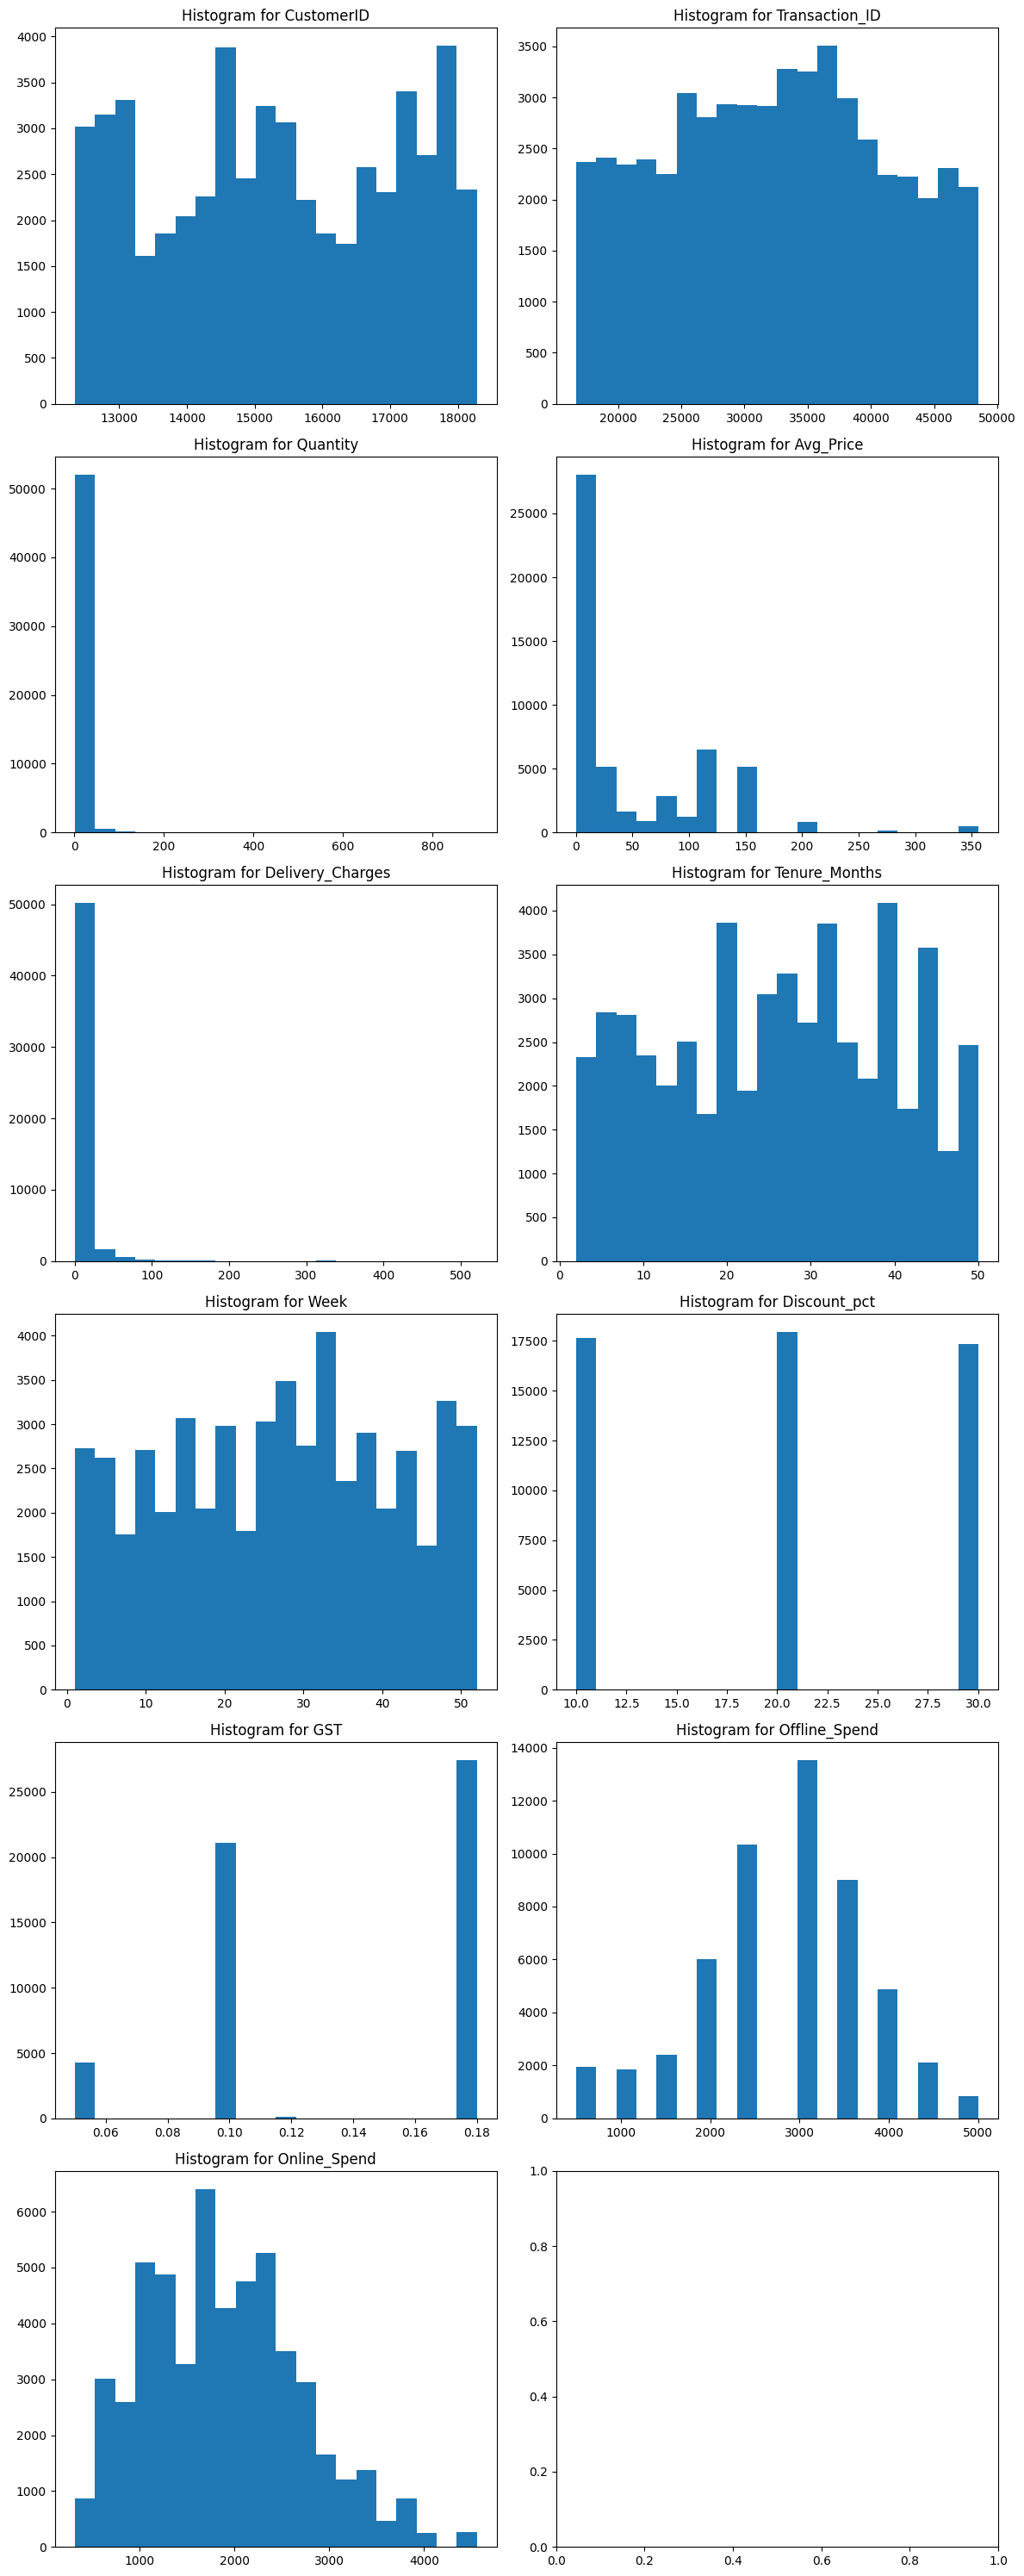

In [20]:
# Get numerical columns in the DataFrame
numerical_columns = final_df.select_dtypes(include=['number']).columns

# Calculate the number of subplots needed
num_subplots = len(numerical_columns)

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=num_subplots // 2 + num_subplots % 2, ncols=2, figsize=(12, 5 * (num_subplots // 2 + num_subplots % 2)))

# Loop through numerical columns
for i, column in enumerate(numerical_columns):
    # Calculate the position in the subplot grid
    row = i // 2
    col = i % 2

    # Plot histogram
    axes[row, col].hist(final_df[column], bins=20)
    axes[row, col].set_title(f"Histogram for {column}")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


#

## Univariate analysis for categorical_columns

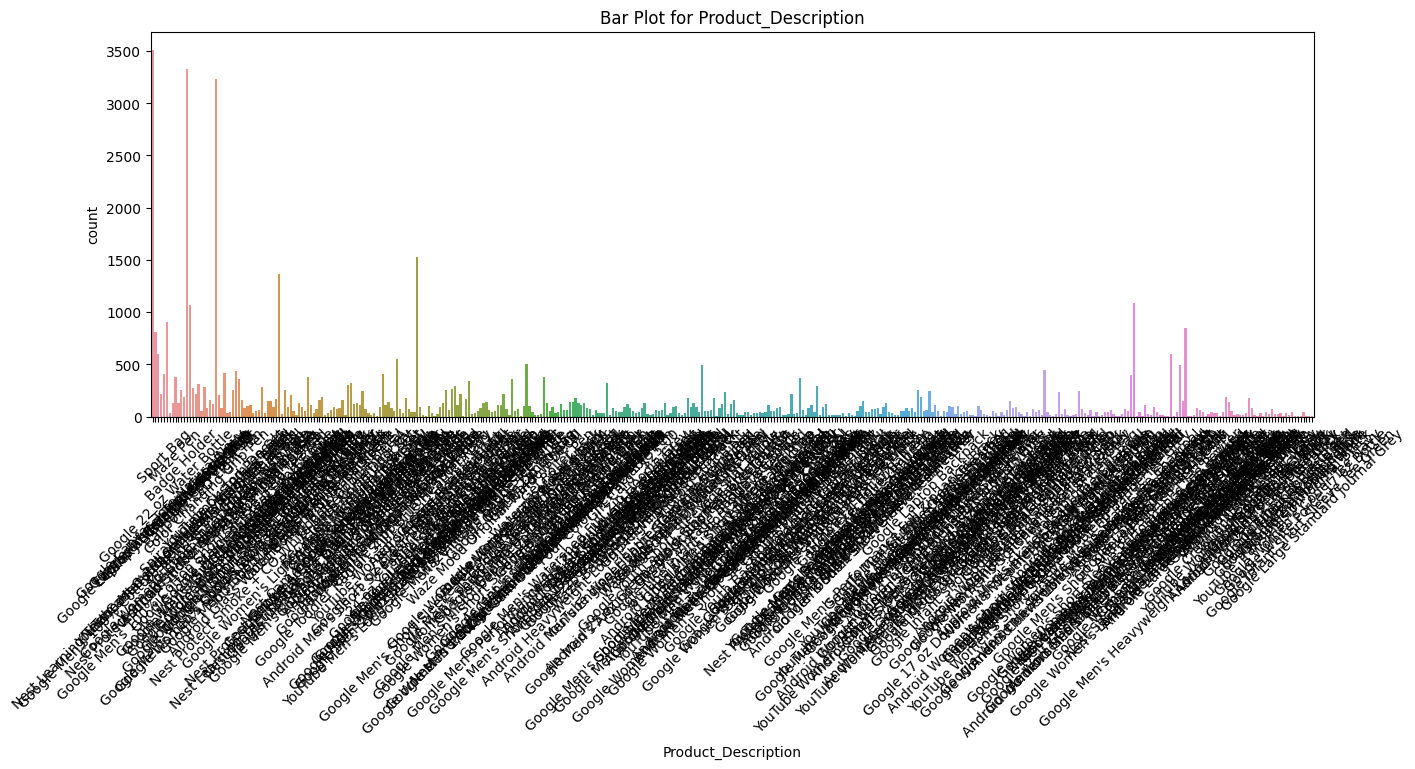

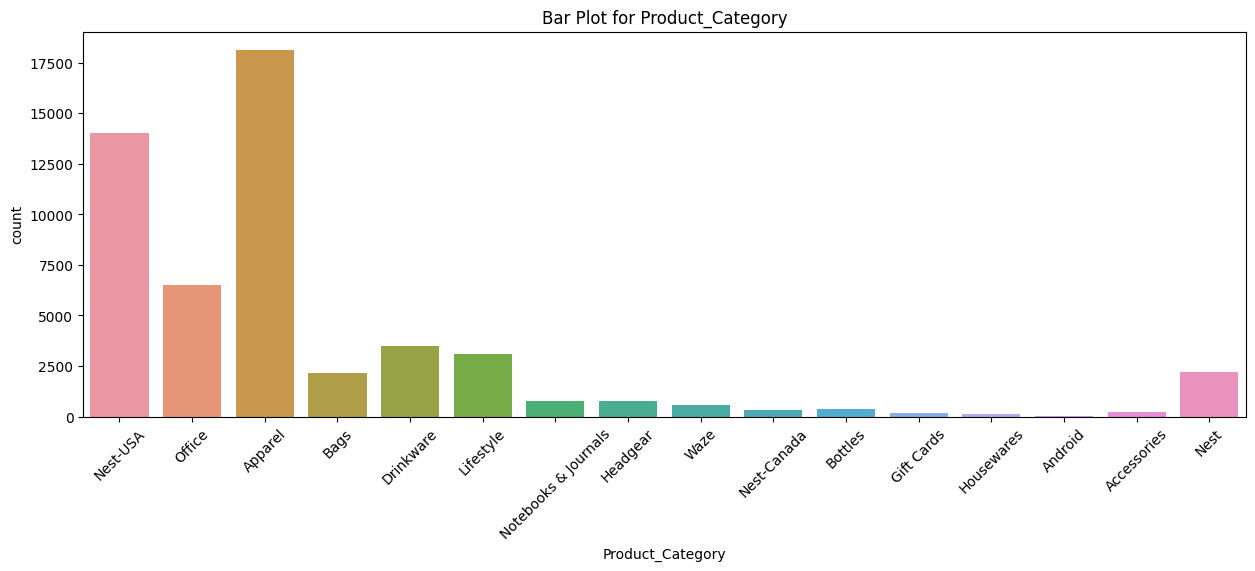

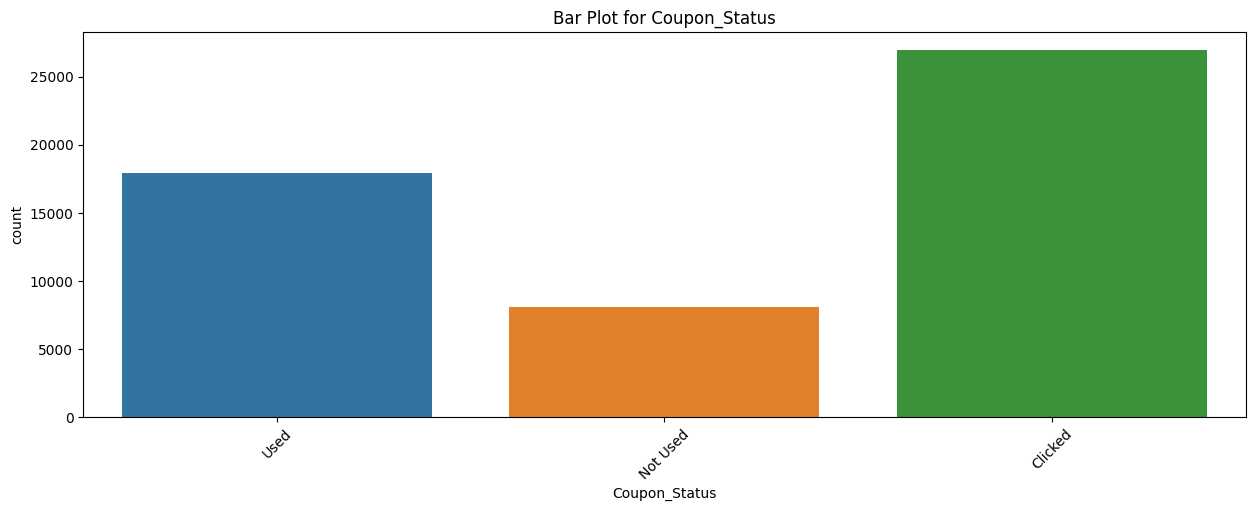

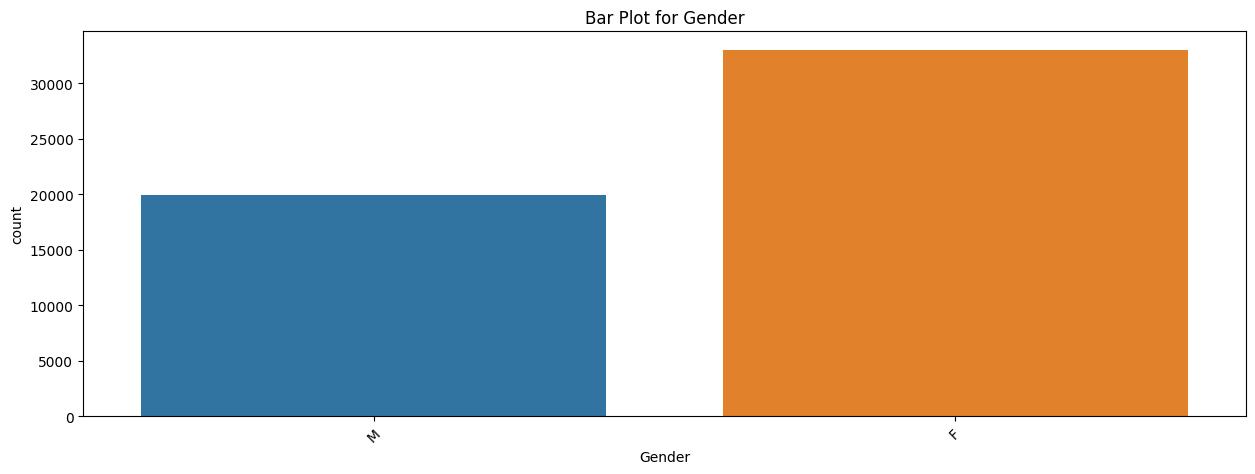

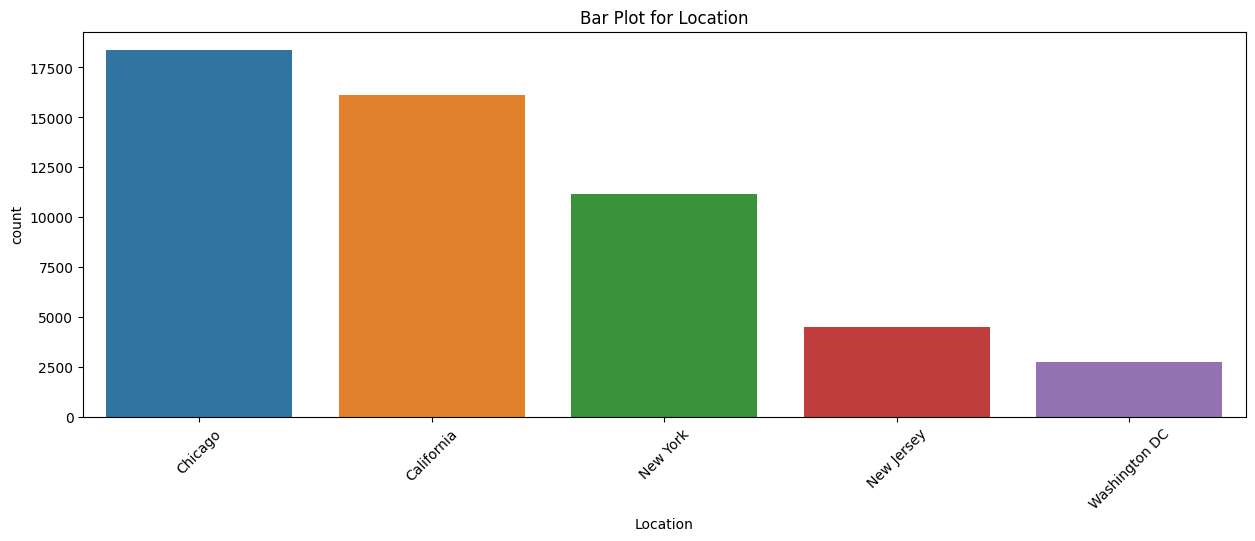

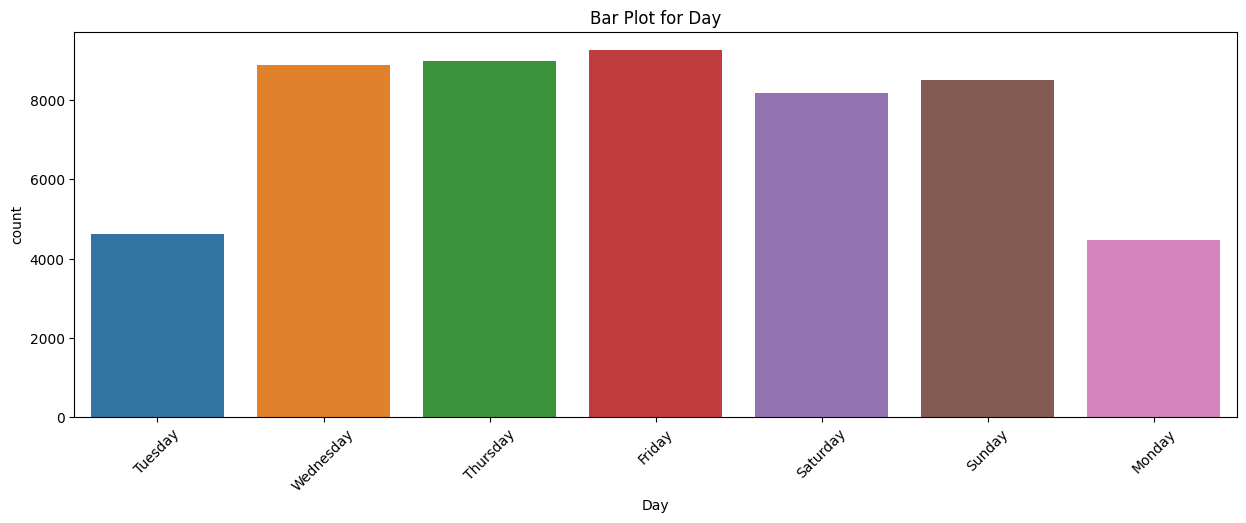

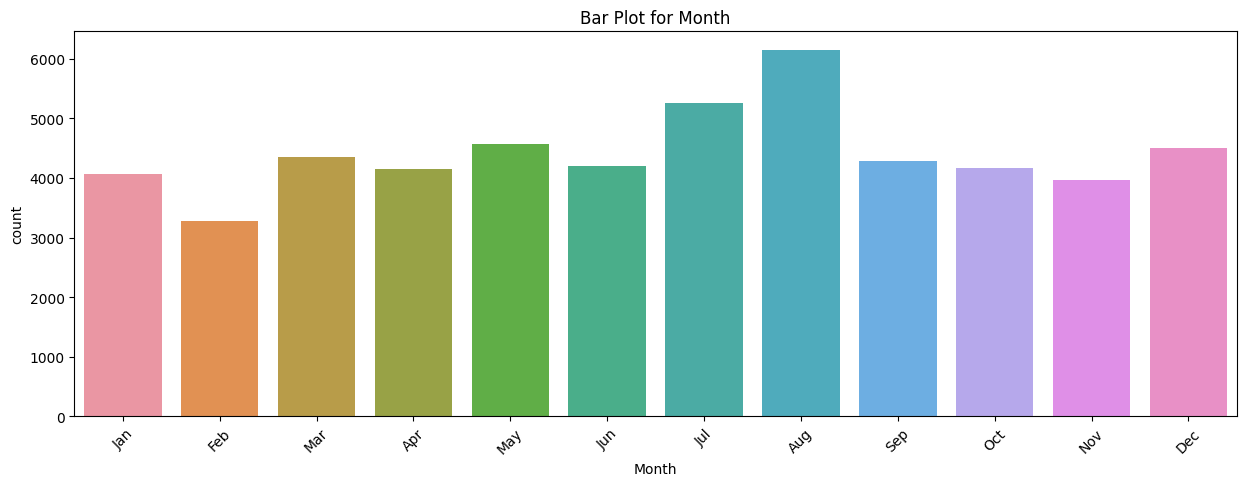

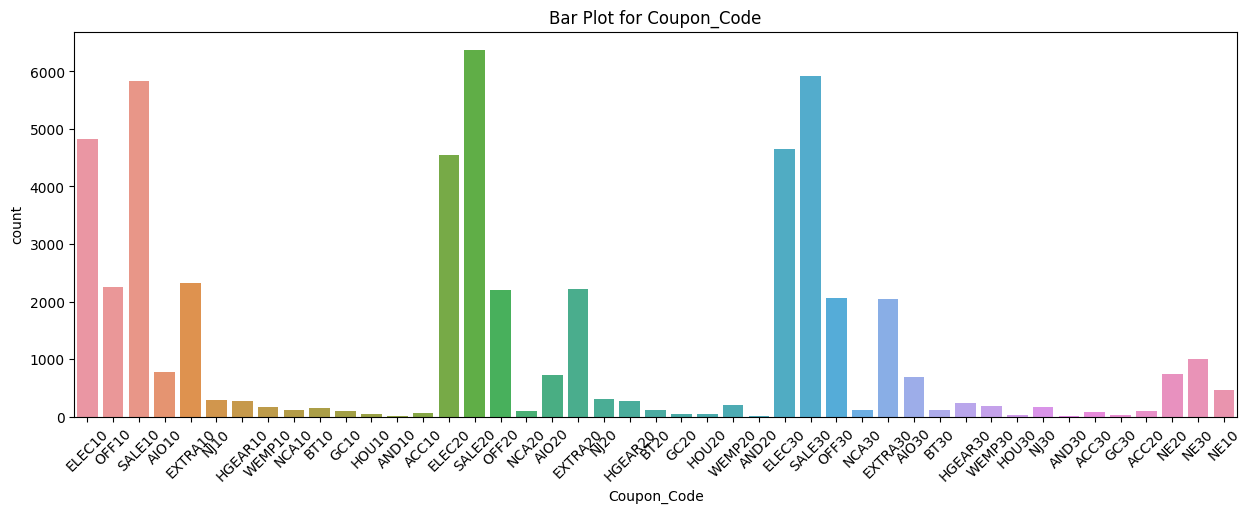

In [21]:
# Get categorical columns in the DataFrame
obj_old_df = final_df.select_dtypes(include='object')

# Loop through categorical columns
for i in obj_old_df:
    plt.figure(figsize=(15,5))
    # Create a bar plot using seaborn
    sns.countplot(x=i, data=final_df)
    
    # Set title and adjust rotation for better readability
    plt.title(f"Bar Plot for {i}")
    plt.xticks(rotation=45, fontsize=10)
    
    # Show the plot
    plt.show()


#

## Bi Variate analysis

### Relationship between numeric and categorical variables

for i in final_df.select_dtypes('number'):
   for j in obj_old_df:
        plt.figure(figsize=(8,9))
        sns.barplot(x=final_df[i], y=obj_old_df[j])
        plt.title(f'Barplot of {i} by {j}')
        plt.show()

### Numeric vs Numeric Relationships

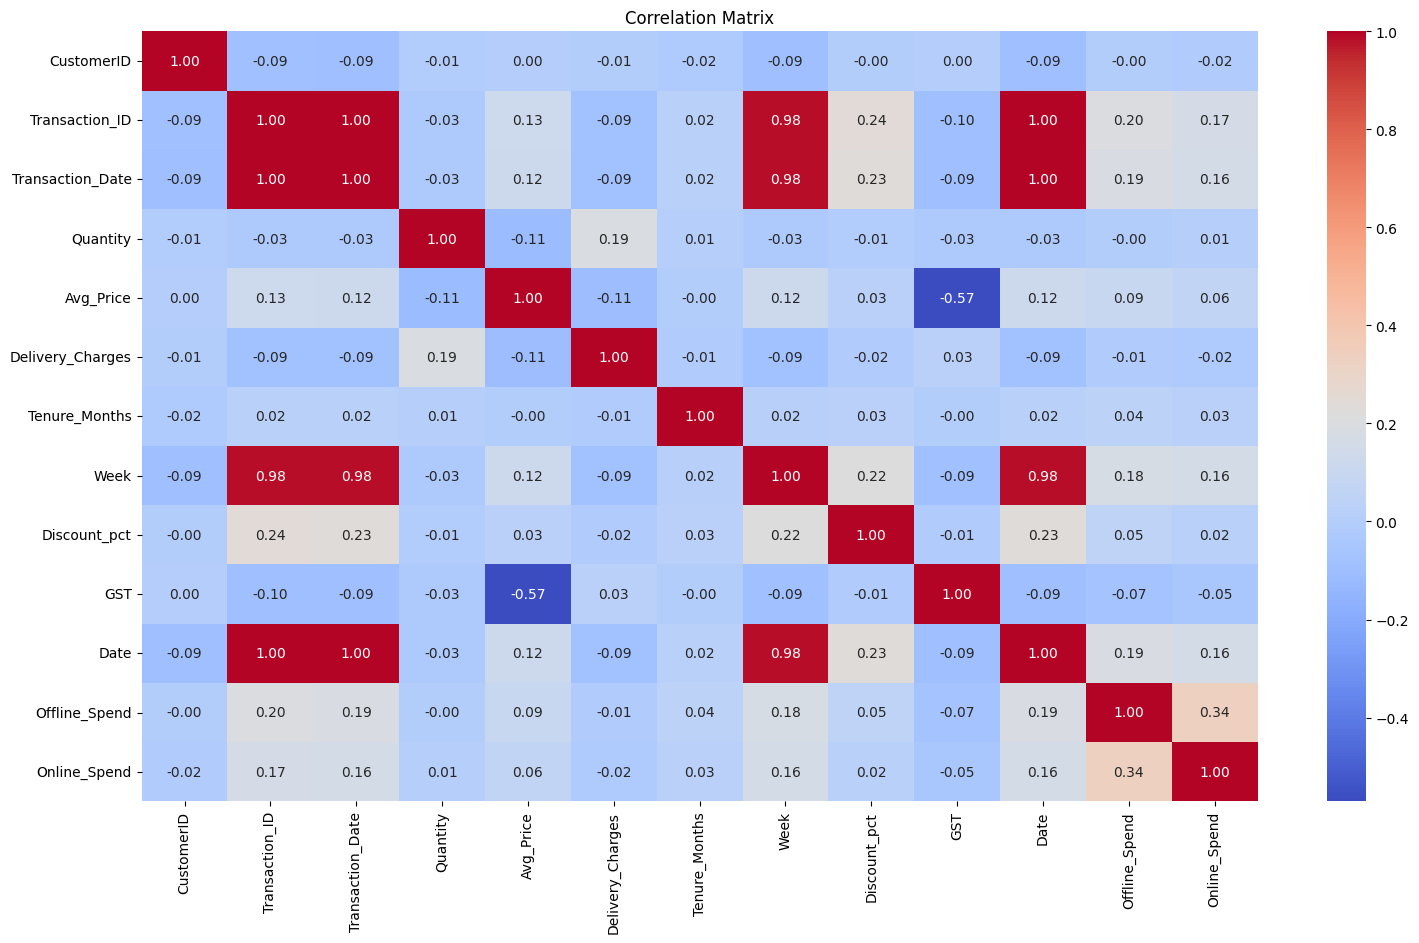

In [22]:
num_old_df=final_df.select_dtypes(exclude='object').columns
correlation_matrix = final_df[num_old_df].corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 

### categorical variables vs categorical variables

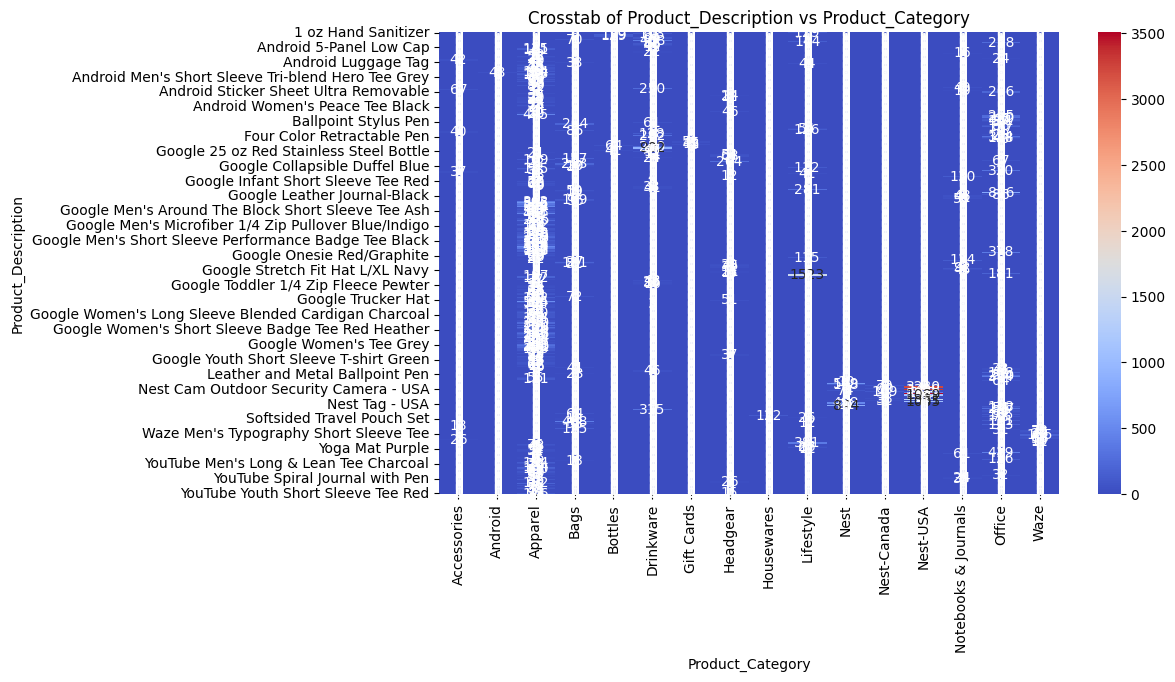

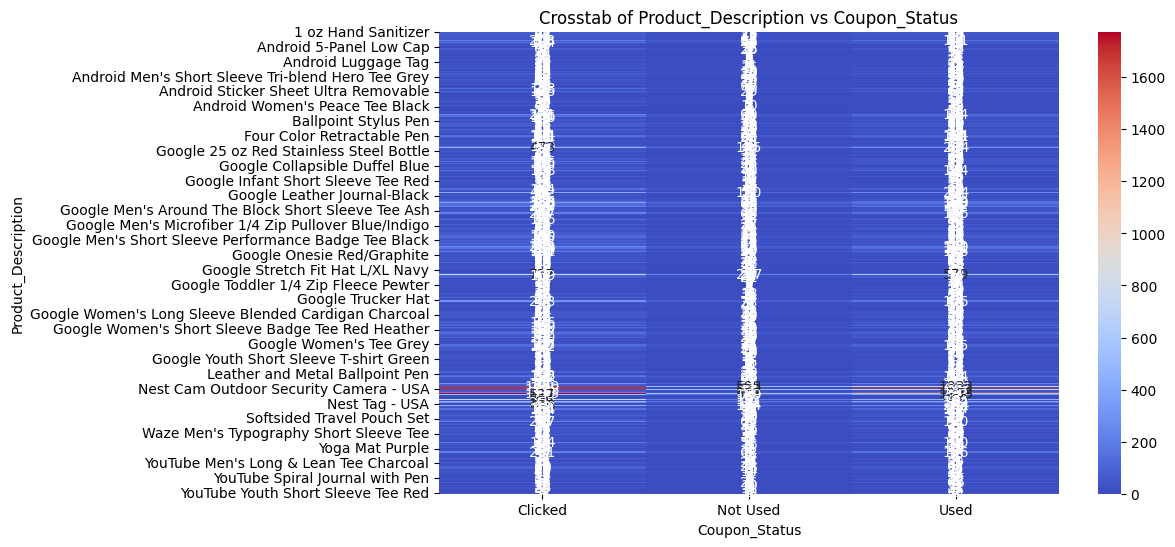

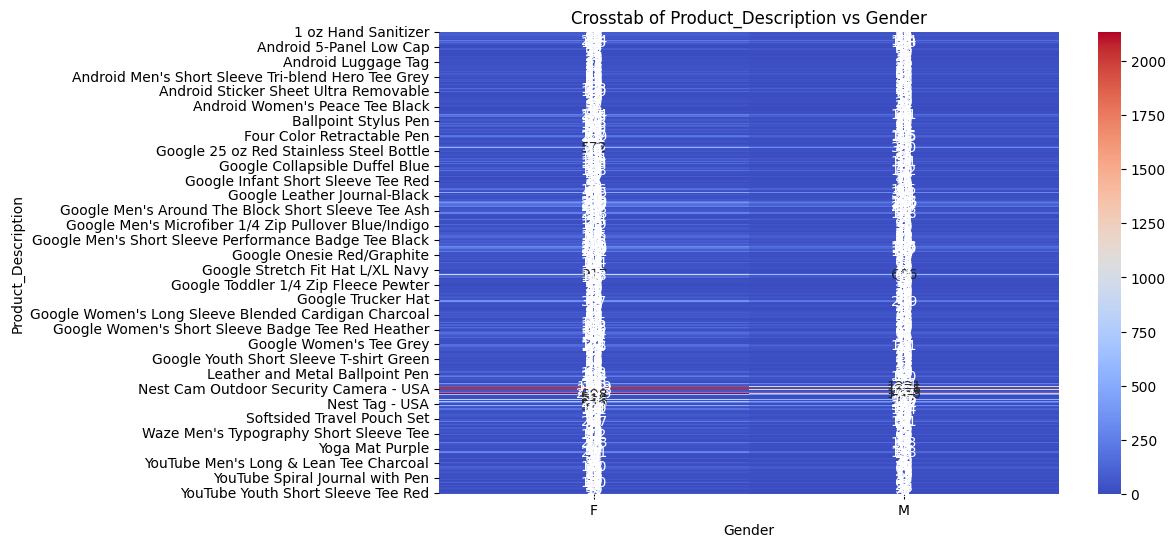

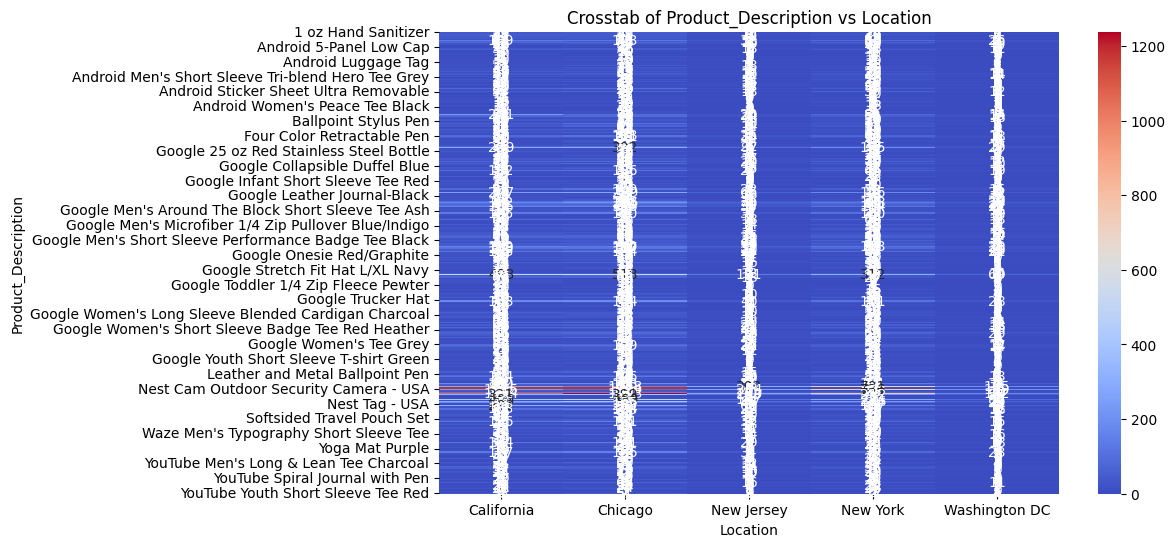

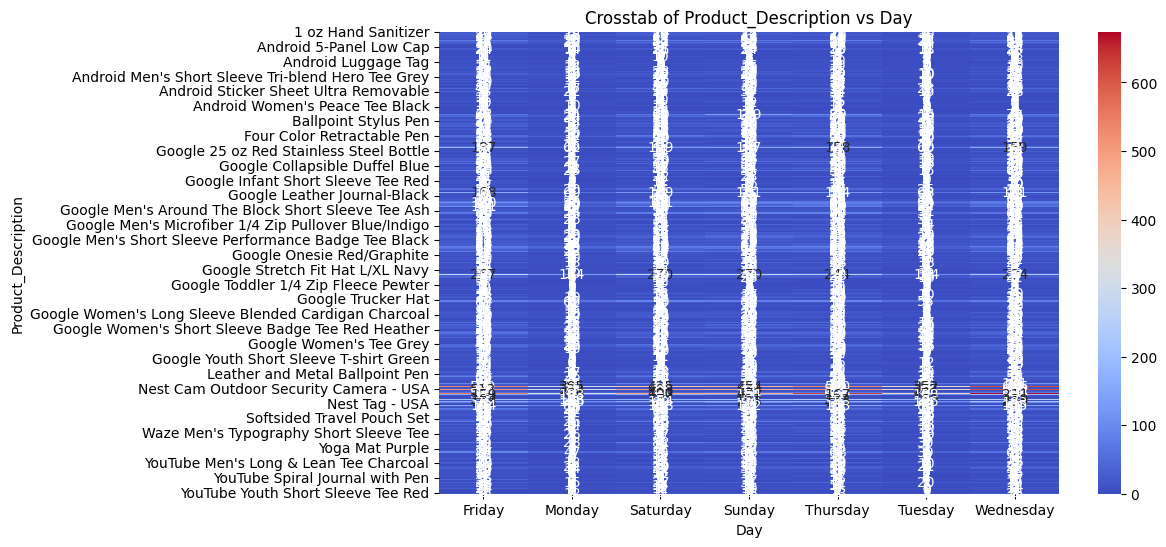

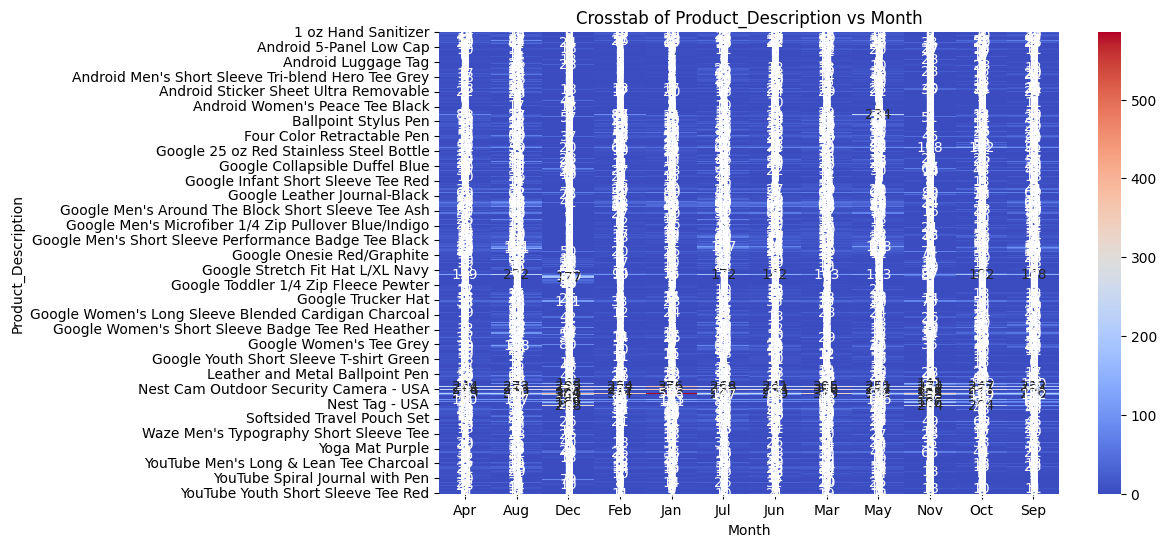

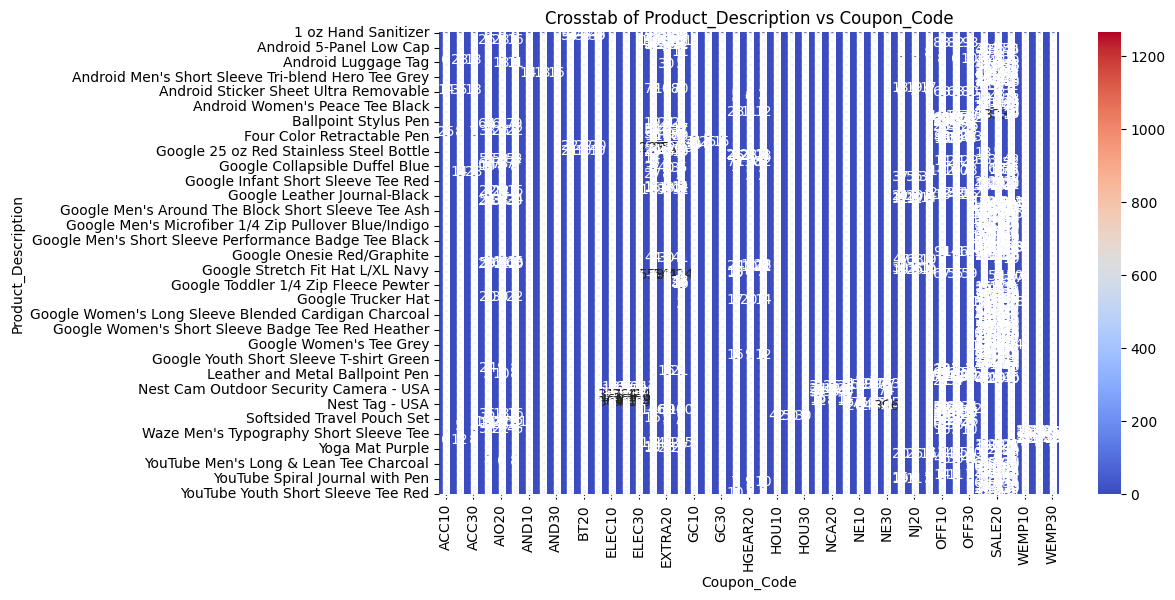

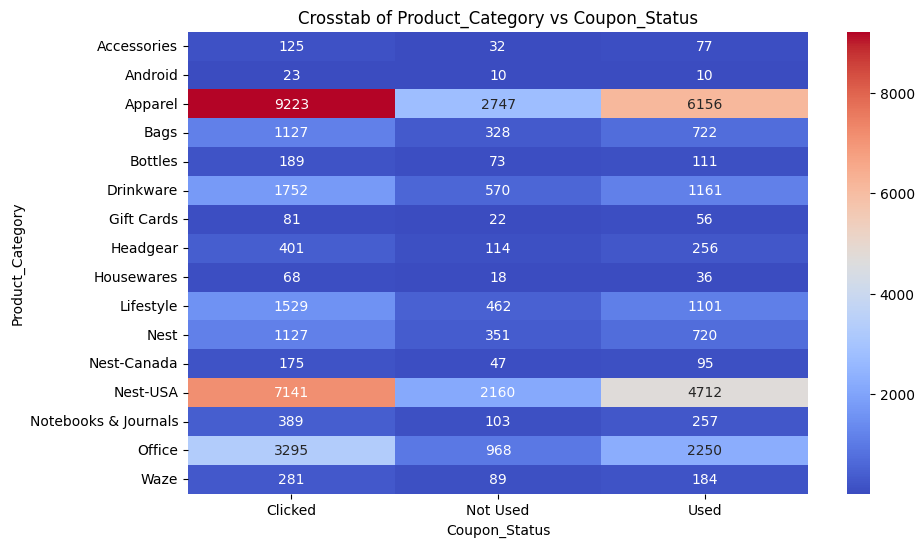

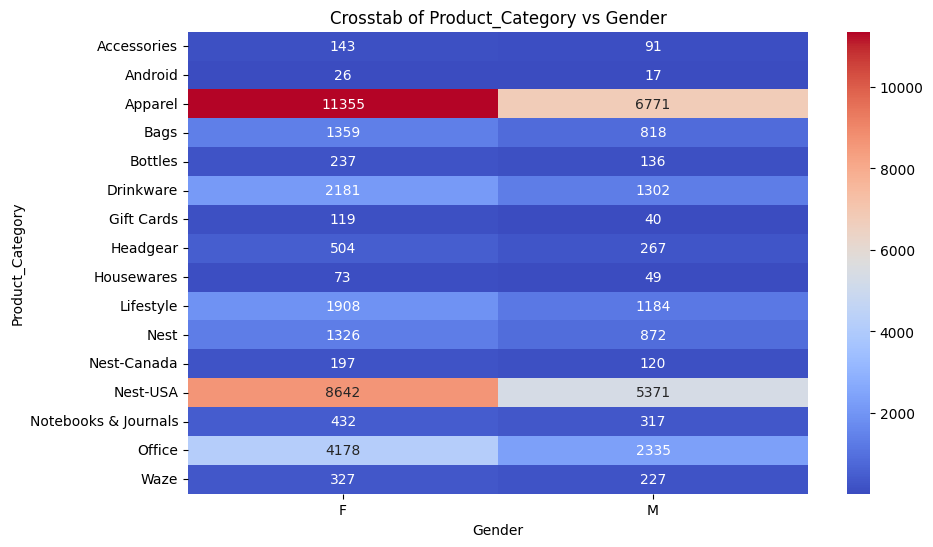

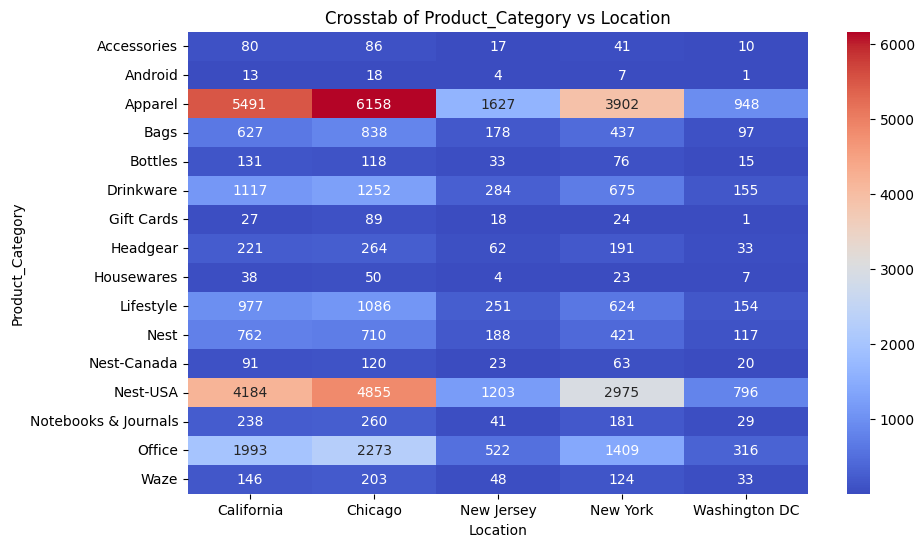

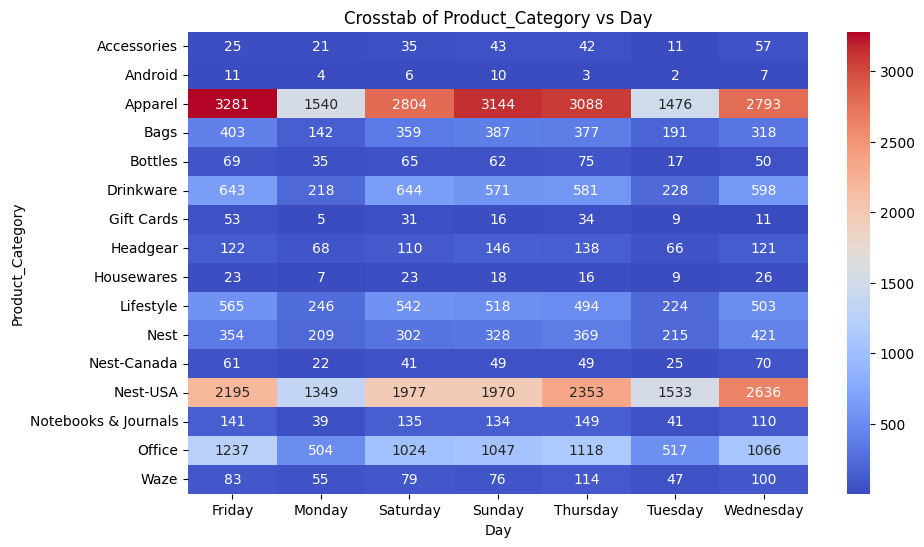

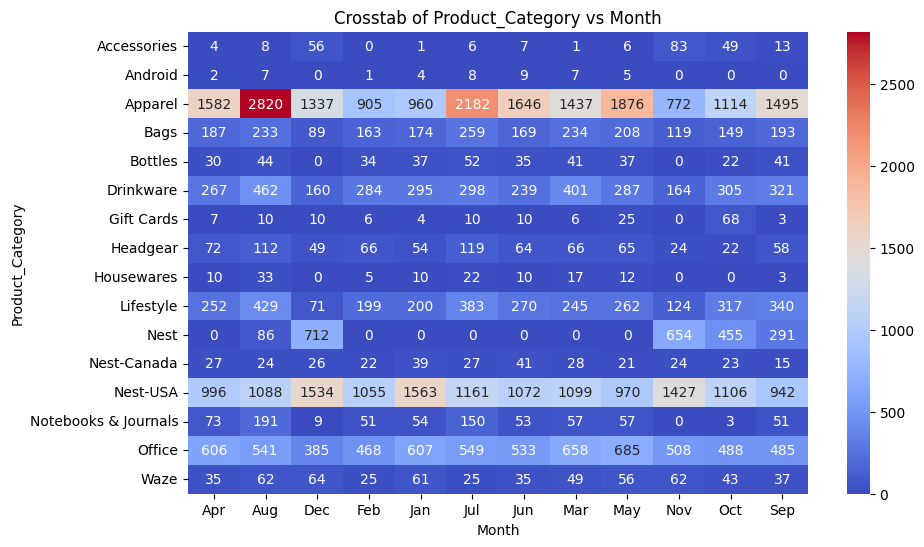

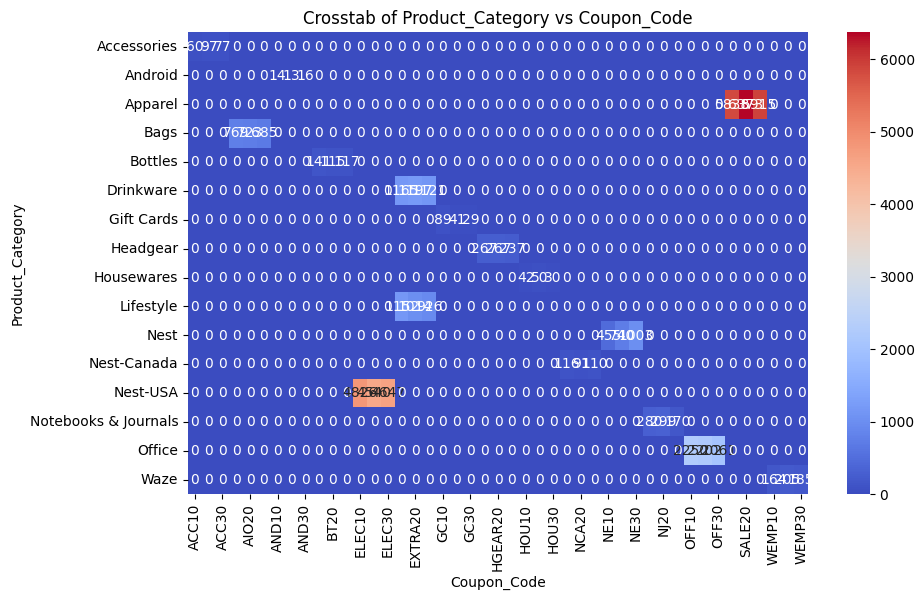

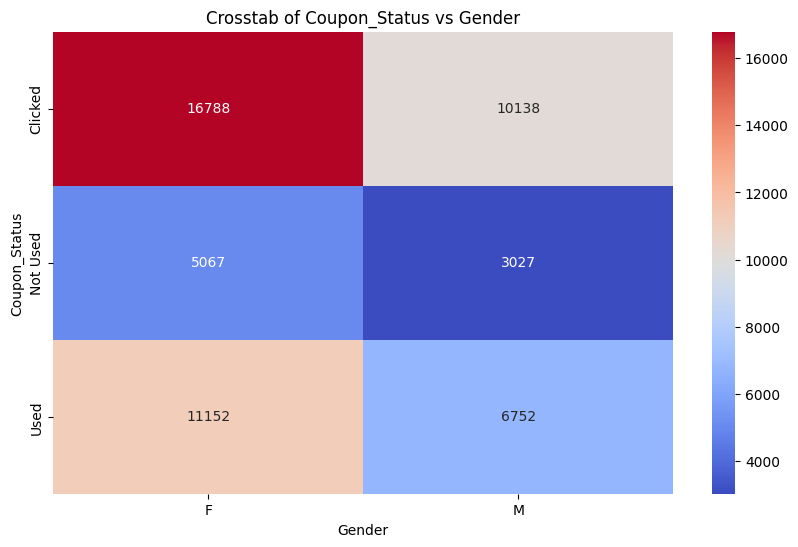

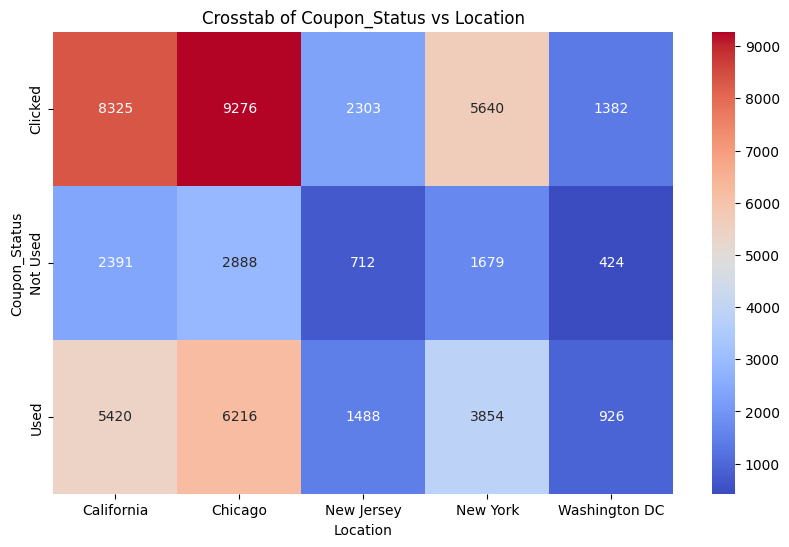

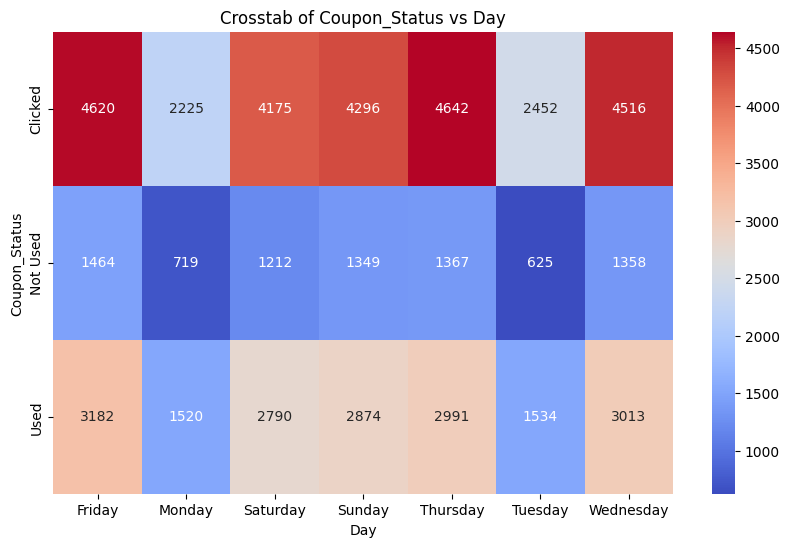

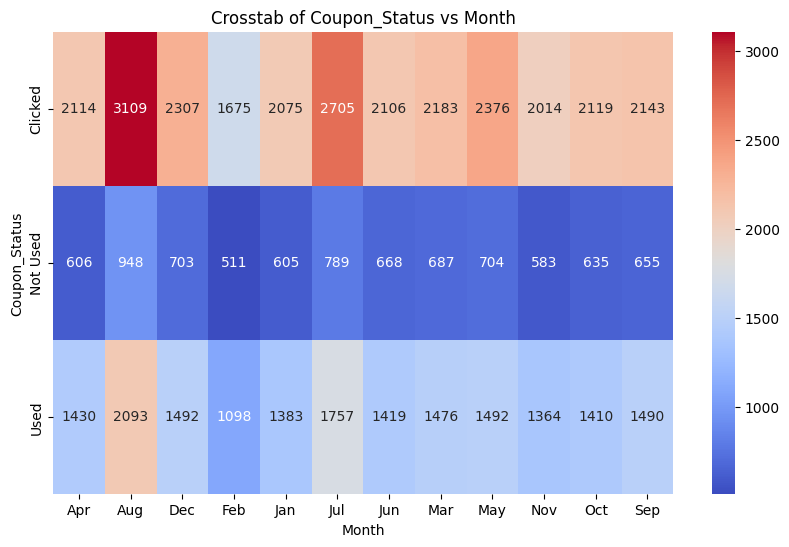

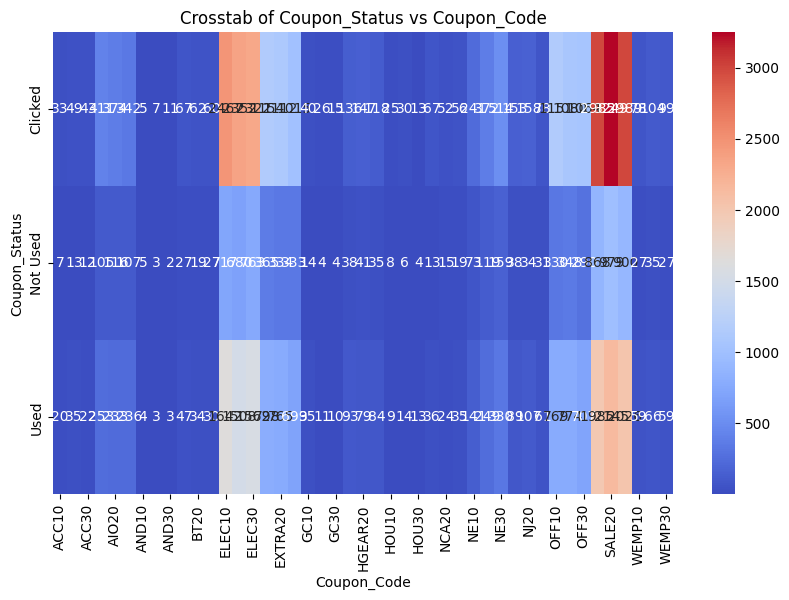

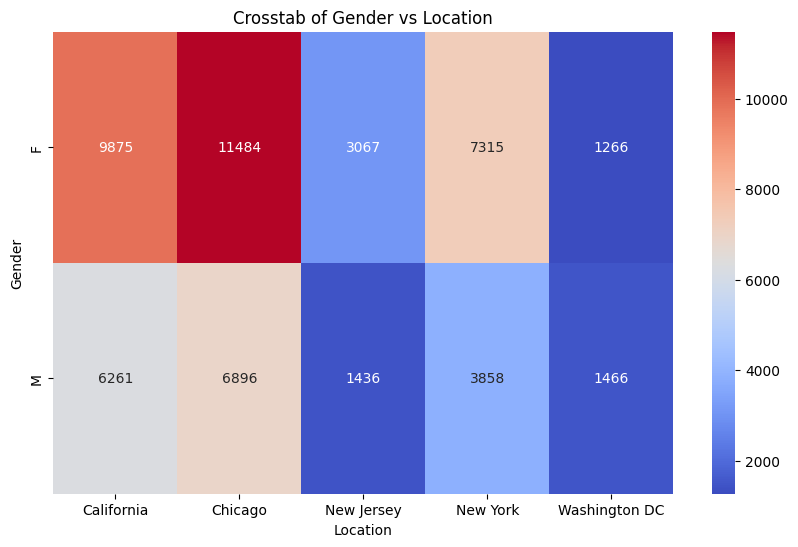

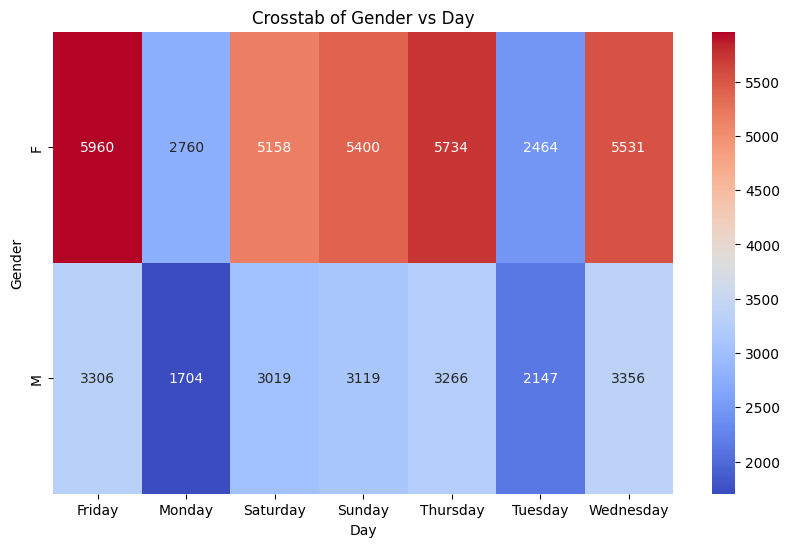

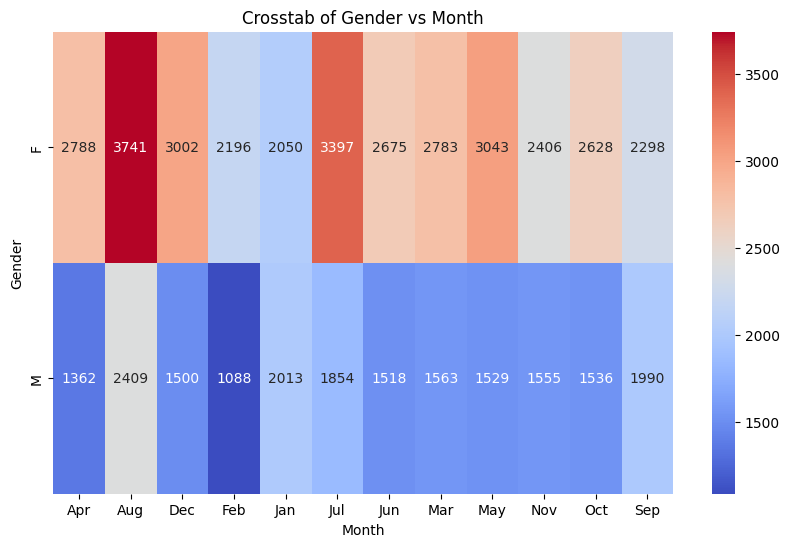

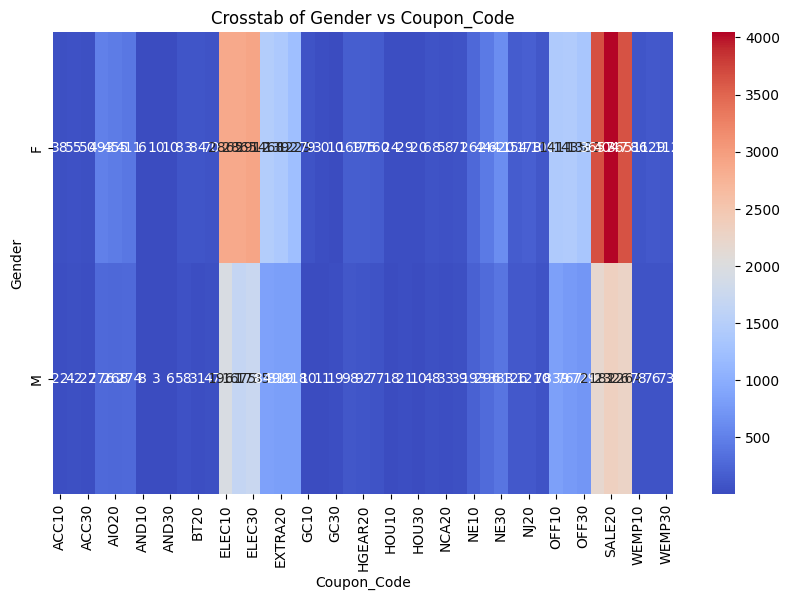

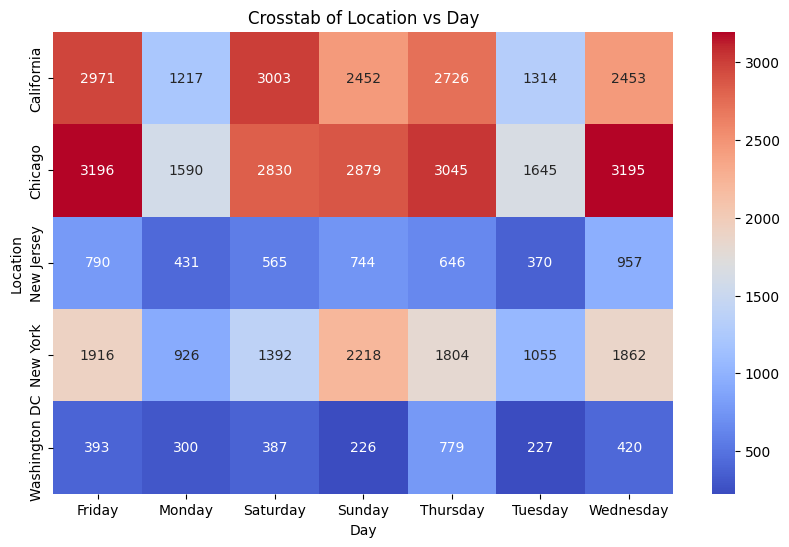

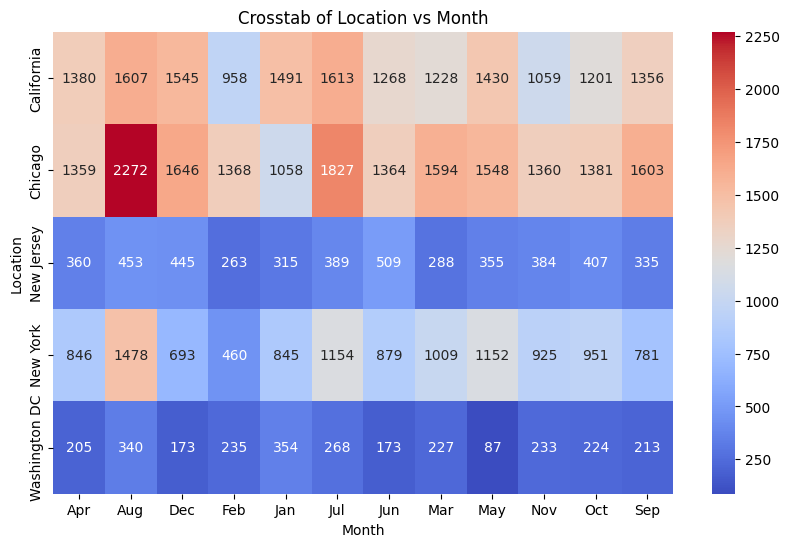

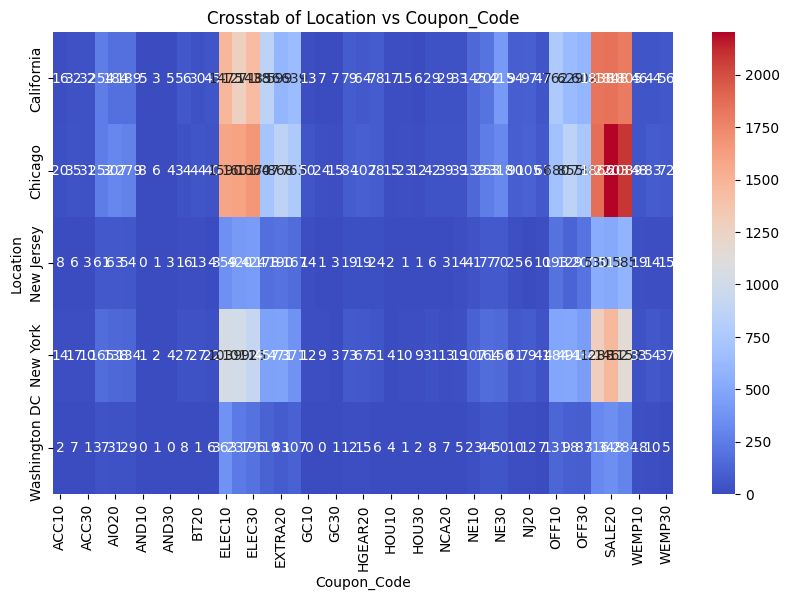

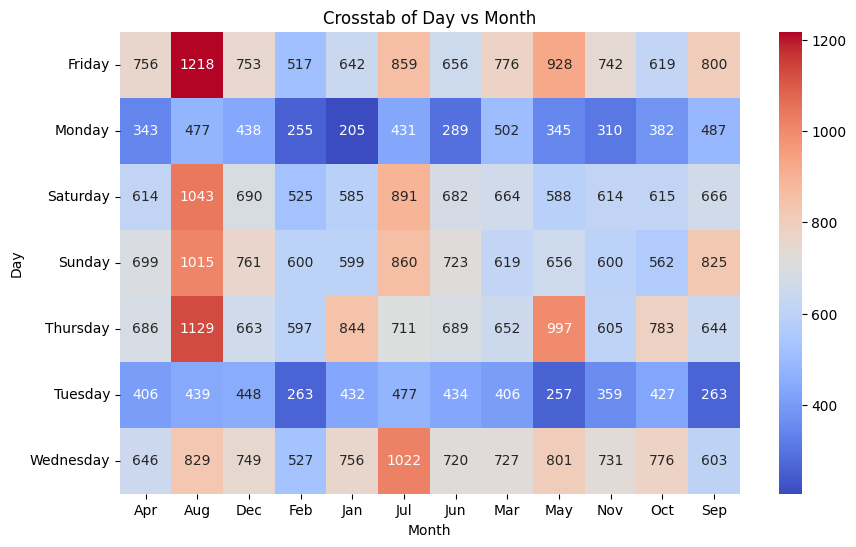

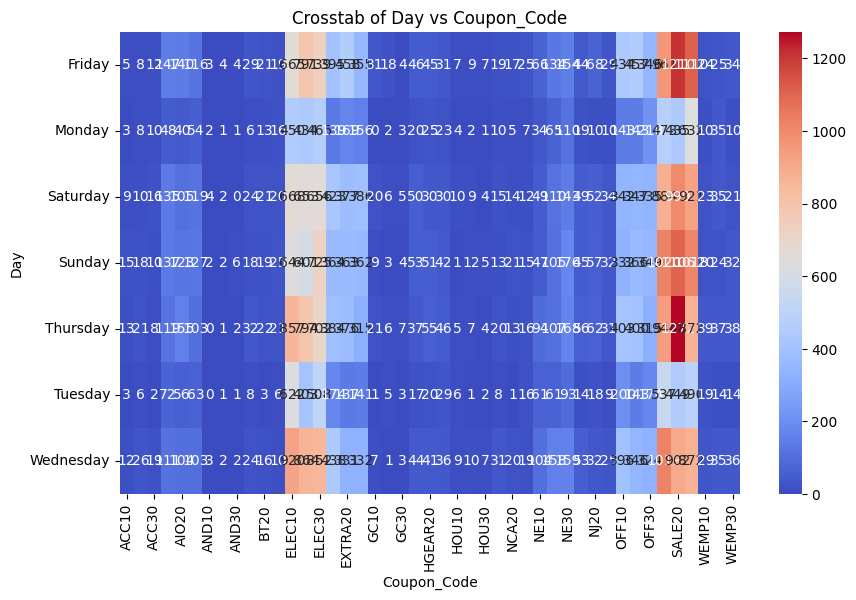

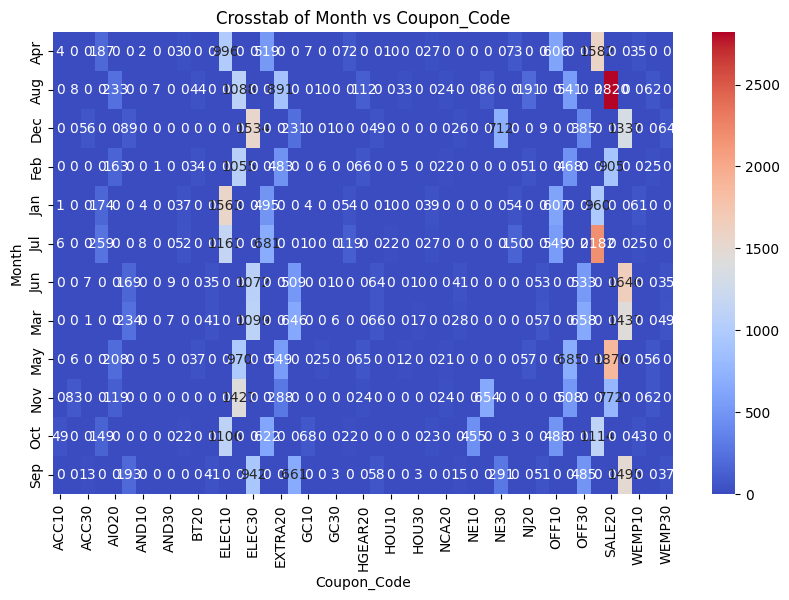

In [23]:
# Create a set to keep track of plotted combinations
plotted_combinations = set()

for i in obj_old_df:
    for j in obj_old_df:
        # Check if the combination has been plotted before in either order
        if (i, j) not in plotted_combinations and (j, i) not in plotted_combinations and i != j:
            crosstab_table = pd.crosstab(obj_old_df[i], obj_old_df[j])
            
            plt.figure(figsize=(10, 6))
            sns.heatmap(crosstab_table, annot=True, cmap='coolwarm', fmt='d')
            plt.title(f'Crosstab of {i} vs {j}')
            plt.show()
            
            # Add the combination to the set
            plotted_combinations.add((i, j))

# 

## checking Outliers in the numericals_columns in the dataset

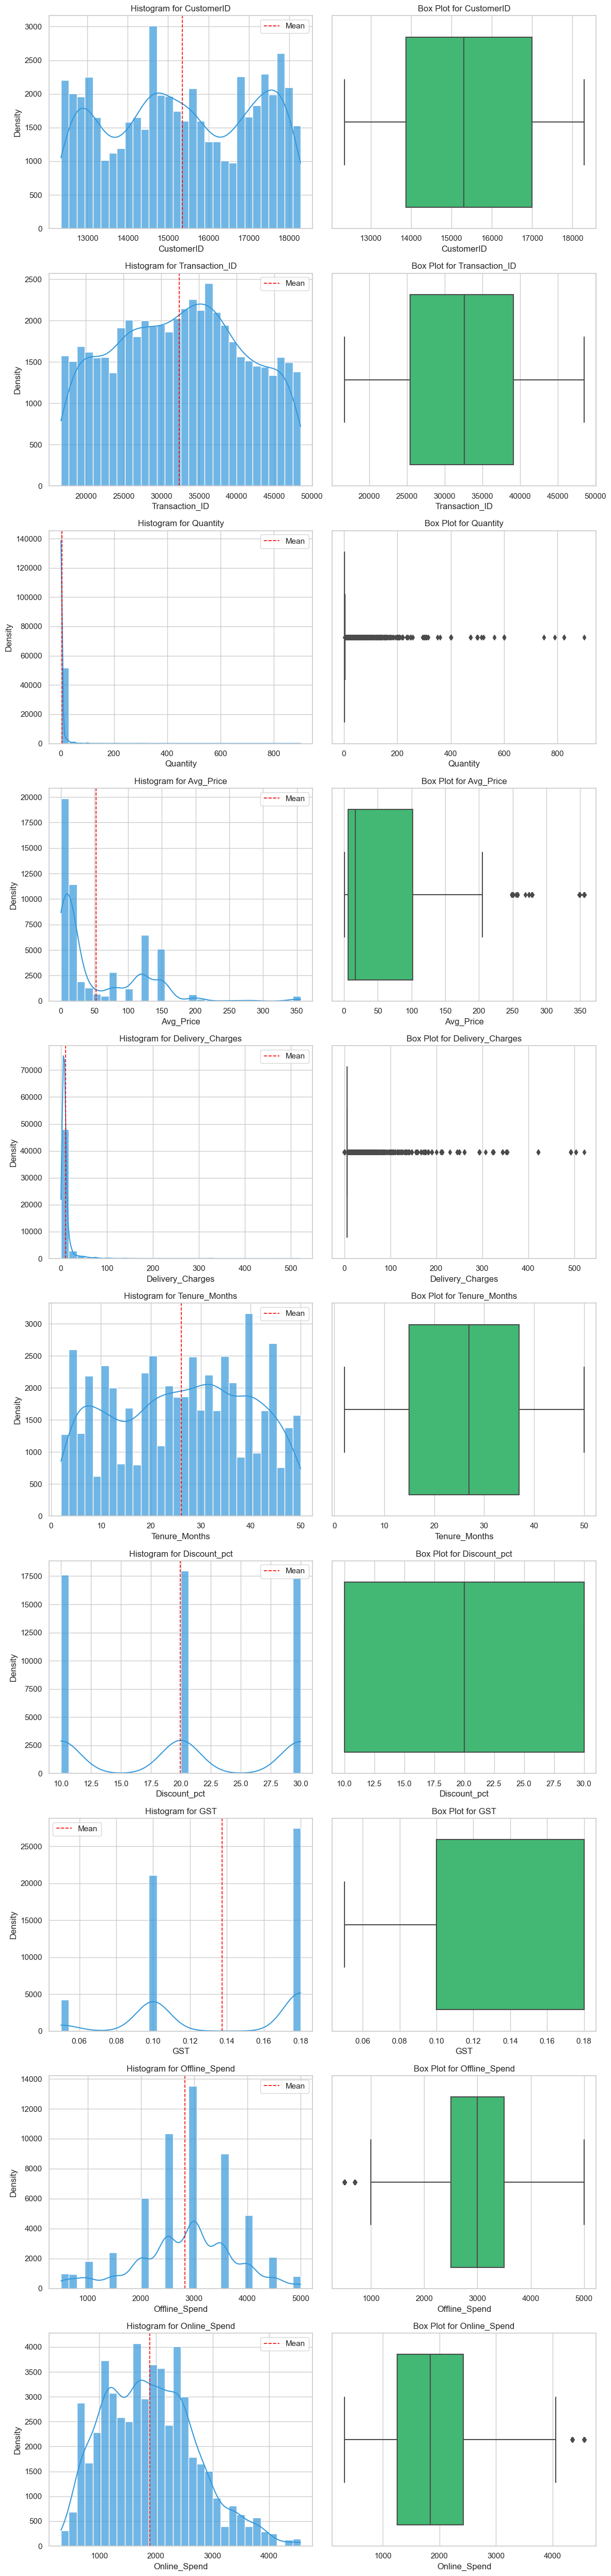

In [24]:
# Assuming dataframe is your DataFrame
numerical_columns = final_df.select_dtypes(include=['float64', 'int64']).columns

# Set a white grid background
sns.set(style="whitegrid")

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(12, 5 * len(numerical_columns)))

# Loop through numerical columns
for i, column in enumerate(numerical_columns):
    # Histogram on the left with KDE
    sns.histplot(data=final_df, x=column, kde=True, ax=axes[i, 0], bins=30, kde_kws={'bw_method': 0.2}, color='#3498db', alpha=0.7)  
    axes[i, 0].set_title('Histogram for {}'.format(column))
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Density')

    # Add mean line to the KDE plot
    mean_value = final_df[column].mean()
    axes[i, 0].axvline(x=mean_value, color='red', linestyle='--', linewidth=1.2, label='Mean')
    axes[i, 0].legend()

    # Box plot on the right
    sns.boxplot(data=final_df, x=column, ax=axes[i, 1], color='#2ecc71')
    axes[i, 1].set_title('Box Plot for {}'.format(column))
    axes[i, 1].set_xlabel(column)


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


#

#  Business Objective: 
# The e-commerce company is expecting below analysis using the data


#

## 1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level
### Invoice Value =(( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges


In [25]:
final_df['Invoice_Value'] = (
    (final_df['Quantity'] * final_df['Avg_Price']) * (1 - final_df['Discount_pct']/100) * (1 + final_df['GST']) +
    final_df['Delivery_Charges'])

In [26]:
final_df.groupby(['Transaction_ID','Product_Category']).agg(invoice=('Invoice_Value','sum'))

invoice
Transaction_ID Product_Category           
16679          Nest-USA          158.67290
16680          Nest-USA          158.67290
16681          Office              8.52950
16682          Apparel           199.16860
               Bags              112.56250
...                                    ...
48493          Nest-USA           99.90100
48494          Apparel            46.90792
48495          Nest-USA          123.44760
48496          Nest-USA          316.50200
48497          Nest-USA          267.99160

[34109 rows x 1 columns]

#

## 2. Perform Detailed exploratory analysis###  Understanding how many customers acquired every month

In [27]:
final_df['Min_DATE']=final_df.groupby('CustomerID')['Transaction_Date'].transform(min)

In [28]:
final_df['cust_seg']=np.where((final_df.Min_DATE.dt.month==final_df.Transaction_Date.dt.month)
                        &(final_df.Min_DATE.dt.year==final_df.Transaction_Date.dt.year),'new_customers','existing_customers')

In [29]:
final_df.cust_seg.value_counts()

cust_seg
new_customers         32033
existing_customers    20891
Name: count, dtype: int64

In [30]:
no_of_customers_acquired=final_df.loc[final_df['cust_seg']=='new_customers'].pivot_table(index=final_df.Month,values='cust_seg',aggfunc='count')
no_of_customers_acquired

cust_seg
Month          
Apr        2850
Aug        3155
Dec        2181
Feb        2847
Jan        4063
Jul        2101
Jun        2461
Mar        3583
May        3020
Nov        1787
Oct        2143
Sep        1842

In [31]:
month_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
no_of_customers_acquired=no_of_customers_acquired.loc[month_order]
no_of_customers_acquired

cust_seg
Month          
Jan        4063
Feb        2847
Mar        3583
Apr        2850
May        3020
Jun        2461
Jul        2101
Aug        3155
Sep        1842
Oct        2143
Nov        1787
Dec        2181

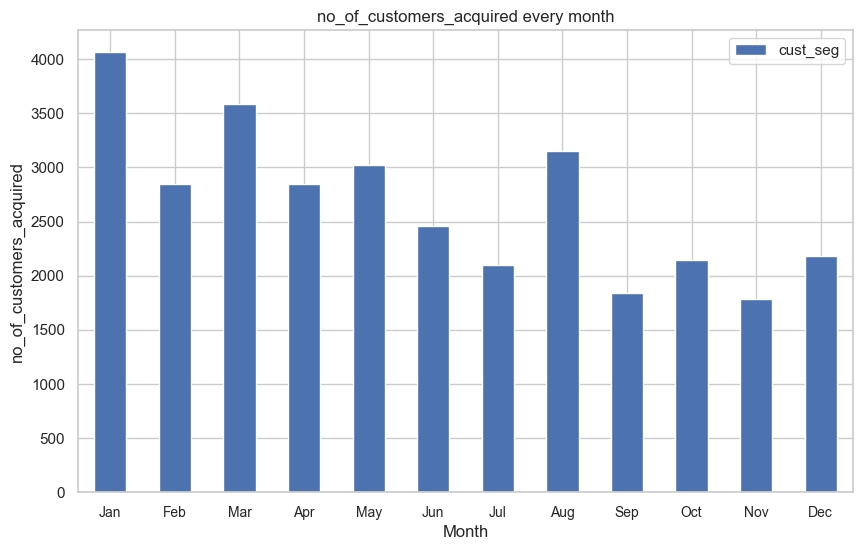

In [32]:
no_of_customers_acquired.plot(kind='bar',figsize=(10, 6))
plt.title('no_of_customers_acquired every month')
plt.ylabel('no_of_customers_acquired')
plt.xticks(rotation=360, fontsize=10)
plt.show()

#

## Understand the retention of customers on month on month basis

In [33]:
new=final_df.copy()
new.sort_values(['CustomerID', 'Transaction_Date'], inplace=True)
# Create a new column 'previous_purchase_date' to track the date of the previous purchase for each customer
new['previous_purchase_date'] = new.groupby('CustomerID')['Transaction_Date'].shift(1)
# Calculate the time gap between consecutive purchases for each customer
new['purchase_time_gap'] = (new['Transaction_Date'] - new['previous_purchase_date']).dt.days
# Identify customers who made a purchase in the current month and had a previous purchase
retained_customers = new[
    (new['purchase_time_gap'].notnull()) & 
    (new['Transaction_Date'].dt.month > new['previous_purchase_date'].dt.month) &
    (~new['previous_purchase_date'].isna())]

In [34]:
retention_count=retained_customers.pivot_table(index=retained_customers.Month,values='CustomerID',aggfunc='count')
retention_count

CustomerID
Month            
Apr            61
Aug           165
Dec           130
Feb            13
Jul           142
Jun           122
Mar            31
May            88
Nov           120
Oct           123
Sep           115

In [35]:
month_order=['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
retention_count=retention_count.loc[month_order]
retention_count

CustomerID
Month            
Feb            13
Mar            31
Apr            61
May            88
Jun           122
Jul           142
Aug           165
Sep           115
Oct           123
Nov           120
Dec           130

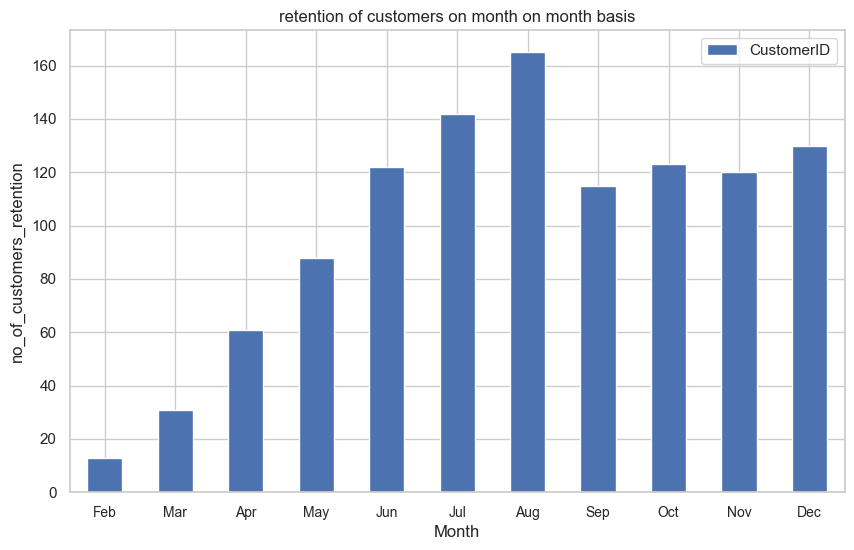

In [36]:
retention_count.plot(kind='bar',figsize=(10, 6))
plt.title('retention of customers on month on month basis')
plt.ylabel('no_of_customers_retention')
plt.xticks(rotation=360, fontsize=10)
plt.show()

#

## How the revenues from existing/new customers on month on month basis

In [37]:
revenue_1=final_df.groupby(['Month','cust_seg']).agg(revenue=('Invoice_Value','sum'))
revenue_1

revenue
Month cust_seg                        
Apr   existing_customers  183014.44770
      new_customers       264465.79199
Aug   existing_customers  217462.37816
      new_customers       200383.62024
Dec   existing_customers  231258.09054
      new_customers       208271.93961
Feb   existing_customers   41032.82808
      new_customers       286290.30928
Jan   new_customers       463575.66147
Jul   existing_customers  254741.86142
      new_customers       168868.81963
Jun   existing_customers  116761.23946
      new_customers       172372.94068
Mar   existing_customers   56490.02554
      new_customers       278954.77740
May   existing_customers  114778.53288
      new_customers       202954.95848
Nov   existing_customers  271580.79080
      new_customers       204265.20880
Oct   existing_customers  209124.92251
      new_customers       241649.95846
Sep   existing_customers  188914.29951
      new_customers       131997.74063

In [38]:
revenue_new=final_df.loc[final_df['cust_seg']=='new_customers'].groupby(['Month','CustomerID']).agg(revenue=('Invoice_Value','sum'))
revenue_new

revenue
Month CustomerID            
Apr   12429       2732.54873
      12481        893.07920
      12494        149.70105
      12605        299.45178
      12621       1213.27066
...                      ...
Sep   17862        855.17412
      17988       1584.73274
      18069       4649.27020
      18212       2623.13861
      18233         82.61500

[1468 rows x 1 columns]

In [39]:
revenue_existing=final_df.loc[final_df['cust_seg']=='existing_customers'].groupby(['Month','CustomerID']).agg(revenue=('Invoice_Value','sum'))
revenue_existing

revenue
Month CustomerID             
Apr   12433        5644.13667
      12471        6027.68769
      12682        3976.69738
      12712         430.01574
      12748       40790.97393
...                       ...
Sep   18109        1010.23782
      18118        7075.93559
      18179        1121.70904
      18190          20.65150
      18223        2403.36596

[1110 rows x 1 columns]

#

## How the discounts playing role in the revenues

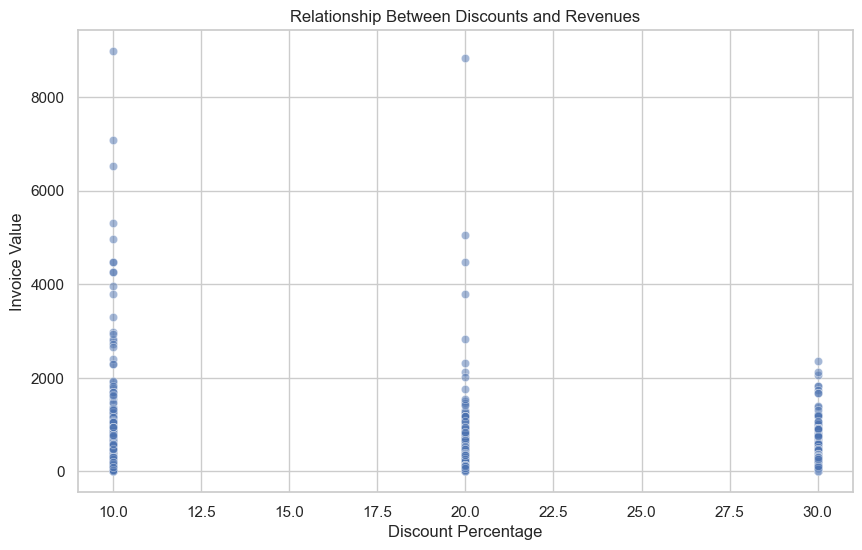

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount_pct', y='Invoice_Value', data=final_df, alpha=0.5)
plt.xlabel('Discount Percentage')
plt.ylabel('Invoice Value')
plt.title('Relationship Between Discounts and Revenues')
plt.show()


It seems like there are disruption( disturbancs) in revenue when applying discounts. Specifically, a 10.0% discount appears to result in some disruption, and a more substantial increase to a 20.0% discount exacerbates this impact on revenue. Furthermore, a significant disruption is observed with a 30.0% discount, indicating that higher discount percentages are associated with a more pronounced decrease in revenue

the relationship between discounts and revenues suggests that as the discount percentage increases, there is a corresponding negative impact on revenue, with the most noticeable disruptions occurring at higher discount levels..

#

## Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc……

# Revenue

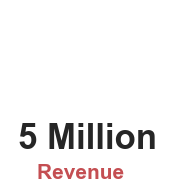

In [41]:
##  Revenue
Revenue=round(final_df.Invoice_Value.sum())
Revenue=f'{Revenue/1000000:.0f} Million'
plt.figure(figsize=(2,2))
plt.text(0.5,0.1,f'{Revenue}',ha='center',fontsize=25, fontweight='bold')
plt.axis('off')
plt.suptitle('Revenue ',color='r',y=0.11,x=0.49,fontsize=15, fontweight='bold')
# plt.savefig("D:/A LABS FLODER/python classes/python codes/output_charts/inventory_units .jpeg")

plt.show()

## Revenue by category

In [42]:
Revenue_by_category=final_df.groupby('Product_Category').agg(Revenue=('Invoice_Value','sum'))
Revenue_by_category

Revenue
Product_Category                  
Accessories           9.277126e+03
Android               9.860494e+02
Apparel               7.354504e+05
Bags                  1.897731e+05
Bottles               2.003876e+04
Drinkware             2.402678e+05
Gift Cards            1.757481e+04
Headgear              5.345419e+04
Housewares            6.372834e+03
Lifestyle             1.145590e+05
Nest                  4.399770e+05
Nest-Canada           6.554575e+04
Nest-USA              2.351316e+06
Notebooks & Journals  1.093681e+05
Office                3.440001e+05
Waze                  1.125057e+04

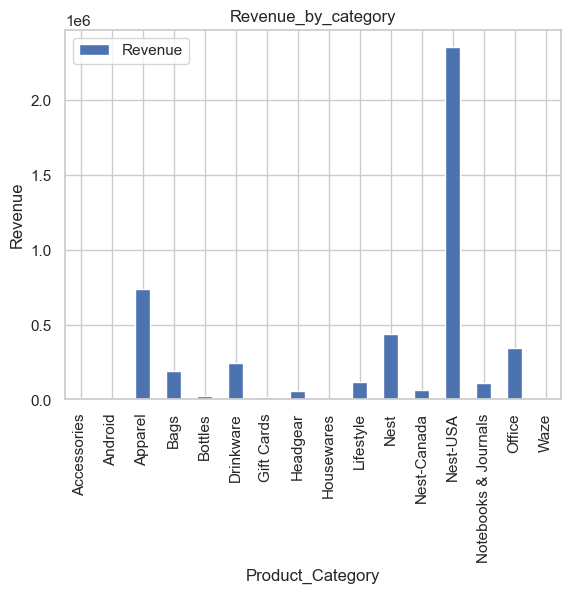

In [43]:
Revenue_by_category.plot(kind='bar')
plt.title('Revenue_by_category')
plt.ylabel('Revenue')
plt.show()

## Revenue by  month, by week, by day

In [44]:
Revenue_by_month=final_df.groupby(['Month']).agg(Revenue=('Invoice_Value','sum'))
Revenue_by_month

Revenue
Month              
Apr    447480.23969
Aug    417845.99840
Dec    439530.03015
Feb    327323.13736
Jan    463575.66147
Jul    423610.68105
Jun    289134.18014
Mar    335444.80294
May    317733.49136
Nov    475845.99960
Oct    450774.88097
Sep    320912.04014

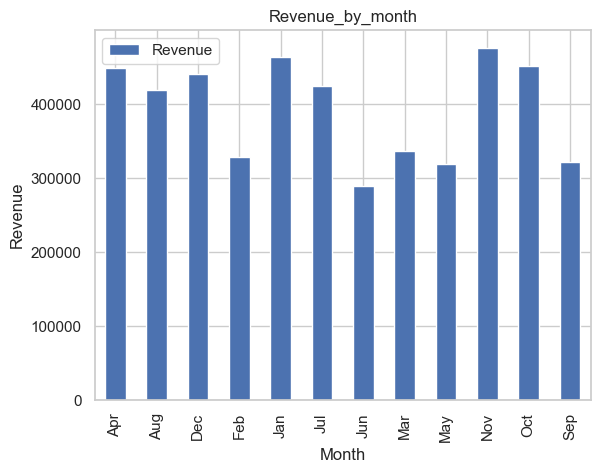

In [45]:
Revenue_by_month.plot(kind='bar')
plt.title('Revenue_by_month')
plt.ylabel('Revenue')
plt.show()

In [46]:
Revenue_by_Week=final_df.groupby(['Week']).agg(Revenue=('Invoice_Value','sum'))
Revenue_by_Week

Revenue
Week              
1     119426.02532
2      98038.45454
3     100388.87515
4     103178.07038
5      96291.66422
6      78156.93448
7      87150.10904
8      86333.88096
9      69955.37432
10     75846.87639
11     64597.47935
12     87930.76575
13     73846.29777
14    123206.78749
15     86121.64907
16    136607.25141
17     88117.71749
18     73946.89623
19     70647.59016
20     67687.31936
21     68452.38128
22     69118.38942
23     58281.73121
24     78626.80712
25     68413.30471
26     65120.08624
27     73343.20941
28    104962.17788
29    118641.19496
30     89276.34382
31    122478.55146
32     93127.79392
33     83367.40592
34     85270.81728
35     87082.58257
36     57225.44766
37     81765.07560
38     64811.17687
39     93187.42131
40     96977.57090
41    114051.66940
42    101488.59660
43     93906.07970
44     94859.37178
45     90946.34224
46     96618.99040
47    118732.73192
48    137618.28380
49    115304.19899
50    125861.49715
51    115155.11691
52     57662.77596

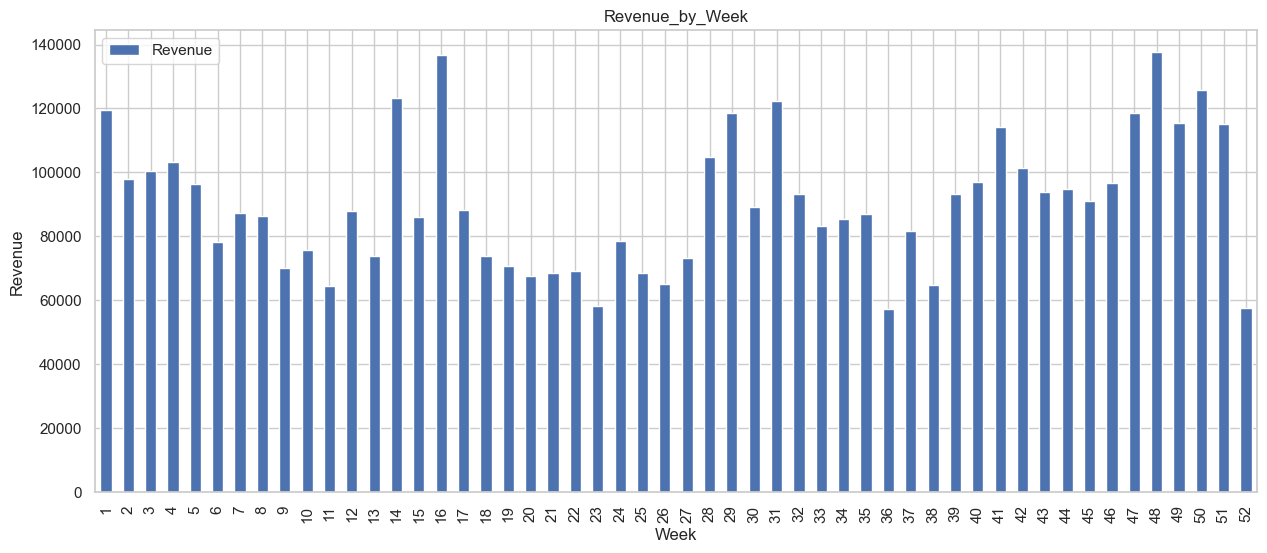

In [47]:
Revenue_by_Week.plot(kind='bar',figsize=(15, 6))
plt.title('Revenue_by_Week')
plt.ylabel('Revenue')
plt.show()

In [48]:
Revenue_by_Day=final_df.groupby(['Day']).agg(Revenue=('Invoice_Value','sum'))
Revenue_by_Day

Revenue
Day                    
Friday     870785.58773
Monday     356366.77862
Saturday   692258.88385
Sunday     706947.60365
Thursday   853846.93816
Tuesday    392914.77243
Wednesday  836090.57883

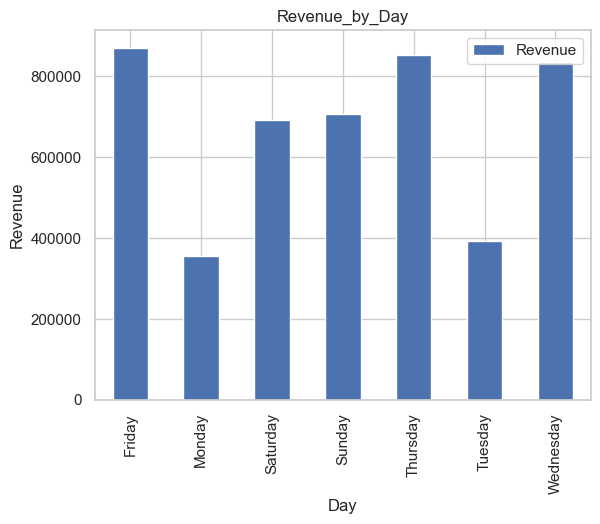

In [49]:
Revenue_by_Day.plot(kind='bar')
plt.title('Revenue_by_Day')
plt.ylabel('Revenue')
plt.show()

#

## Total_orders

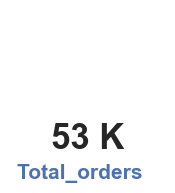

In [50]:
# Total_orders

Total_orders=round(final_df.Transaction_ID.count())
Total_orders=f'{Total_orders/1000:.0f} K'
plt.figure(figsize=(2,2))
plt.text(0.5,0.1,f'{Total_orders}',ha='center',fontsize=25, fontweight='bold')
plt.axis('off')
plt.suptitle('Total_orders ',color='b',y=0.11,x=0.49,fontsize=15, fontweight='bold')
# plt.savefig("D:/A LABS FLODER/python classes/python codes/output_charts/inventory_units .jpeg")

plt.show()

## TOTAL ORDERS BY EACH PRODUCT

In [51]:
order_products=final_df.groupby('Product_Category').agg(Total_orders=('Transaction_ID','count'))
order_products

Total_orders
Product_Category                  
Accessories                    234
Android                         43
Apparel                      18126
Bags                          2177
Bottles                        373
Drinkware                     3483
Gift Cards                     159
Headgear                       771
Housewares                     122
Lifestyle                     3092
Nest                          2198
Nest-Canada                    317
Nest-USA                     14013
Notebooks & Journals           749
Office                        6513
Waze                           554

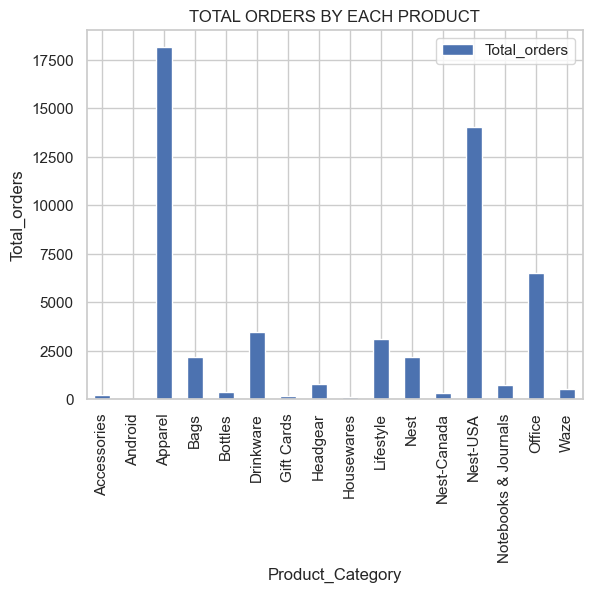

In [52]:
order_products.plot(kind='bar')
plt.title('TOTAL ORDERS BY EACH PRODUCT')
plt.ylabel('Total_orders')
plt.show()

## Total_orders by month

In [53]:
Total_orders_month=final_df.groupby(['Month']).agg(total_orders=('Transaction_ID','count'))
Total_orders_month

total_orders
Month              
Apr            4150
Aug            6150
Dec            4502
Feb            3284
Jan            4063
Jul            5251
Jun            4193
Mar            4346
May            4572
Nov            3961
Oct            4164
Sep            4288

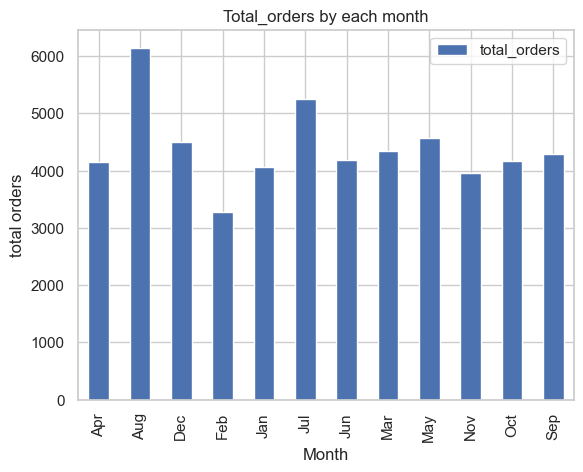

In [54]:
Total_orders_month.plot(kind='bar')
plt.title('Total_orders by each month')
plt.ylabel('total orders')
plt.show()

## Total_orders by each week

In [55]:
Total_orders_week=final_df.groupby(['Week']).agg(total_orders=('Transaction_ID','count'))
Total_orders_week

total_orders
Week              
1             1056
2              829
3              842
4              943
5              926
6              749
7              881
8              876
9              810
10            1012
11             888
12            1090
13             919
14             954
15            1014
16            1100
17             906
18            1139
19            1021
20            1009
21             947
22             945
23             853
24            1117
25            1009
26             901
27             776
28            1305
29            1405
30            1238
31            1524
32            1398
33            1344
34            1304
35            1322
36            1038
37             982
38             903
39            1019
40            1016
41            1030
42             807
43             928
44             967
45             736
46             895
47             899
48            1111
49            1256
50            1258
51            1215
52             512

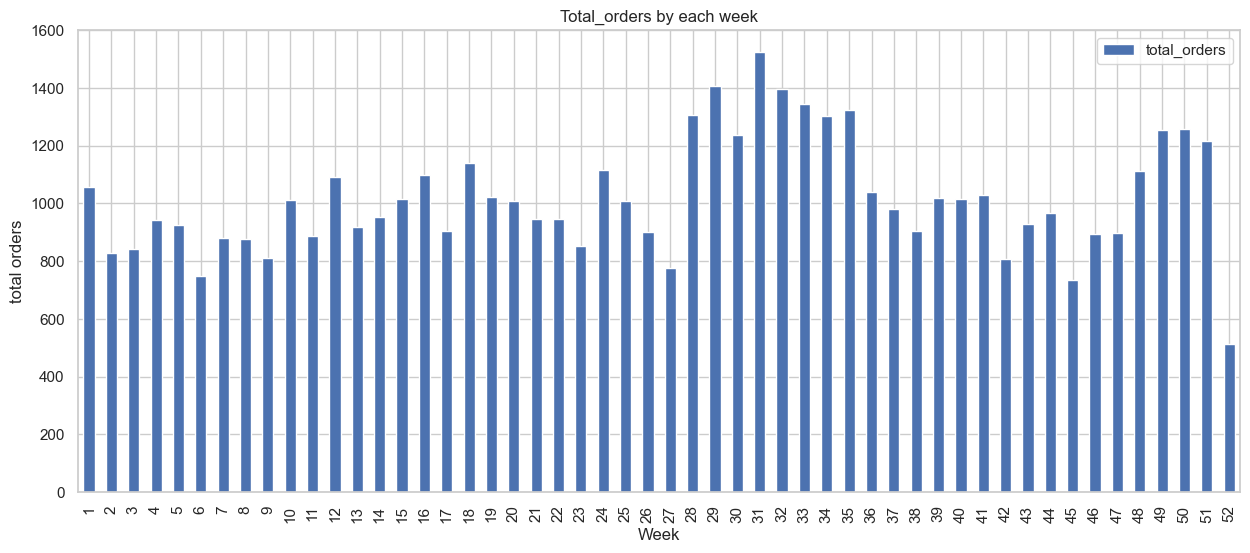

In [56]:
Total_orders_week.plot(kind='bar',figsize=(15, 6))
plt.title('Total_orders by each week')
plt.ylabel('total orders')
plt.show()

## Total_orders by day

In [57]:
Total_orders_day=final_df.groupby(['Day']).agg(total_orders=('Transaction_ID','count'))
Total_orders_day

total_orders
Day                    
Friday             9266
Monday             4464
Saturday           8177
Sunday             8519
Thursday           9000
Tuesday            4611
Wednesday          8887

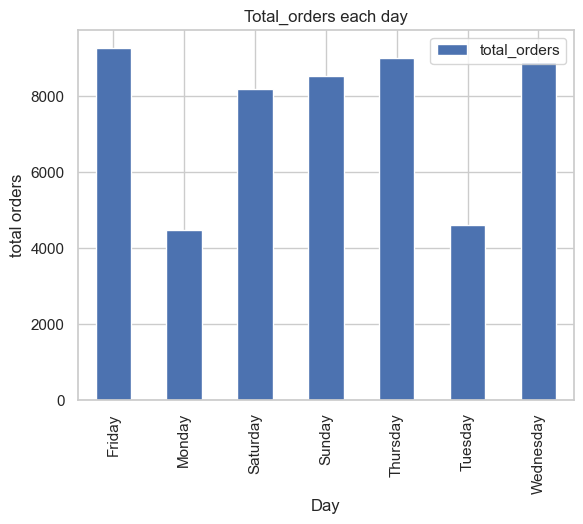

In [58]:
Total_orders_day.plot(kind='bar')
plt.title('Total_orders each day')
plt.ylabel('total orders')
plt.show()

#

## Average_order_value

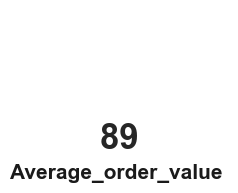

In [59]:
# Average_order_value

Average_order_value=final_df.Invoice_Value.mean()
Average_order_value=f'{Average_order_value/1:.0f} '
plt.figure(figsize=(2,2))
plt.text(0.5,0.1,f'{Average_order_value}',ha='center',fontsize=25, fontweight='bold')
plt.axis('off')
plt.suptitle('Average_order_value ',color='k',y=0.11,x=0.49,fontsize=15, fontweight='bold')
# plt.savefig("D:/A LABS FLODER/python classes/python codes/output_charts/inventory_units .jpeg")

plt.show()

## Average_order_value by each product 

In [60]:
avg_oder_product=final_df.groupby('Product_Category').agg(no_of_products=('Invoice_Value','mean'))
avg_oder_product

no_of_products
Product_Category                    
Accessories                39.645837
Android                    22.931381
Apparel                    40.574337
Bags                       87.171863
Bottles                    53.723216
Drinkware                  68.982990
Gift Cards                110.533381
Headgear                   69.330990
Housewares                 52.236342
Lifestyle                  37.050117
Nest                      200.171512
Nest-Canada               206.768934
Nest-USA                  167.795300
Notebooks & Journals      146.018878
Office                     52.817456
Waze                       20.307894

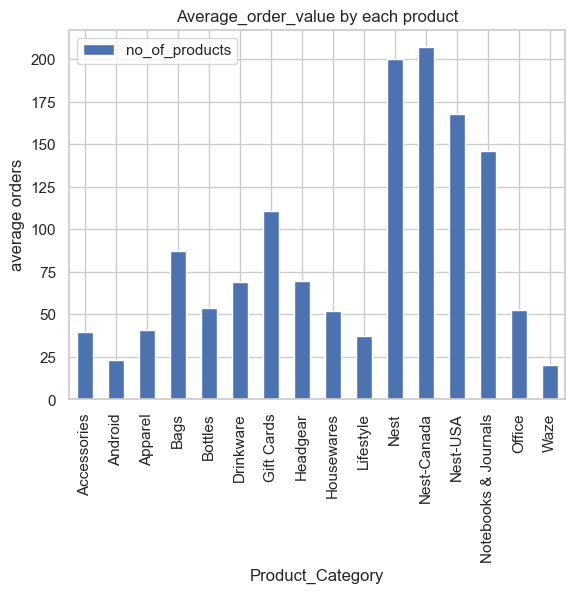

In [61]:
avg_oder_product.plot(kind='bar')
plt.title('Average_order_value by each product')
plt.ylabel('average orders')
plt.show()

## Average_order_value by each month

In [62]:
avg_oder_product_month=final_df.groupby(['Month']).agg(avg_order_value=('Invoice_Value','mean'))
avg_oder_product_month

avg_order_value
Month                 
Apr         107.826564
Aug          67.942439
Dec          97.629949
Feb          99.672088
Jan         114.096889
Jul          80.672383
Jun          68.956399
Mar          77.184722
May          69.495514
Nov         120.132795
Oct         108.255255
Sep          74.839562

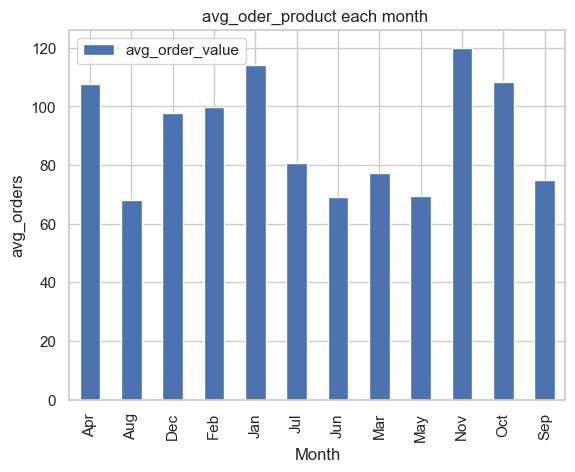

In [63]:
avg_oder_product_month.plot(kind='bar')
plt.title('avg_oder_product each month ')
plt.ylabel('avg_orders')
plt.show()

## Average_order_value by each week

In [64]:
avg_oder_product_week=final_df.groupby(['Week']).agg(avg_order_value=('Invoice_Value','mean'))
avg_oder_product_week

avg_order_value
Week                 
1          113.092827
2          118.261103
3          119.226693
4          109.414709
5          103.986678
6          104.348377
7           98.921804
8           98.554659
9           86.364660
10          74.947506
11          72.744909
12          80.670427
13          80.355057
14         129.147576
15          84.932593
16         124.188410
17          97.260174
18          64.922648
19          69.194506
20          67.083567
21          72.283402
22          73.141153
23          68.325593
24          70.391054
25          67.803077
26          72.275345
27          94.514445
28          80.430788
29          84.442132
30          72.113363
31          80.366504
32          66.615017
33          62.029320
34          65.391731
35          65.871848
36          55.130489
37          83.263824
38          71.773175
39          91.449874
40          95.450365
41         110.729776
42         125.760343
43         101.191896
44          98.096558
45         123.568400
46         107.954179
47         132.072004
48         123.868842
49          91.802706
50         100.048885
51          94.777874
52         112.622609

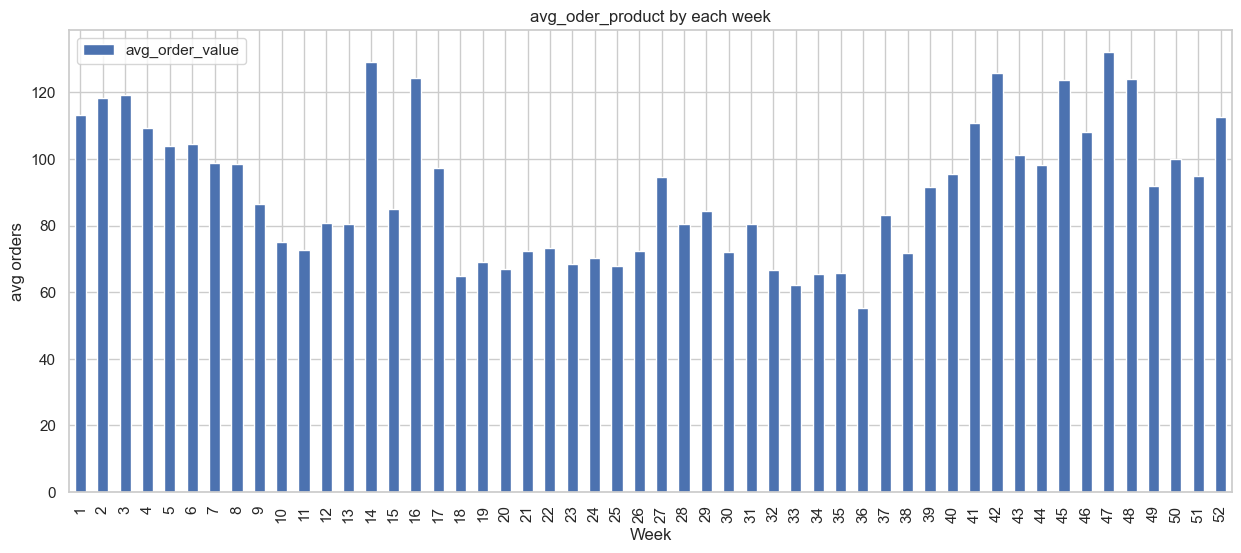

In [65]:
avg_oder_product_week.plot(kind='bar',figsize=(15, 6))
plt.title('avg_oder_product by each week')
plt.ylabel('avg orders')
plt.show()

## Average_order_value by each day

In [66]:
avg_oder_product_day=final_df.groupby(['Day']).agg(avg_order_value=('Invoice_Value','mean'))
avg_oder_product_day

avg_order_value
Day                       
Friday           93.976429
Monday           79.831268
Saturday         84.659274
Sunday           82.984811
Thursday         94.871882
Tuesday          85.212486
Wednesday        94.080182

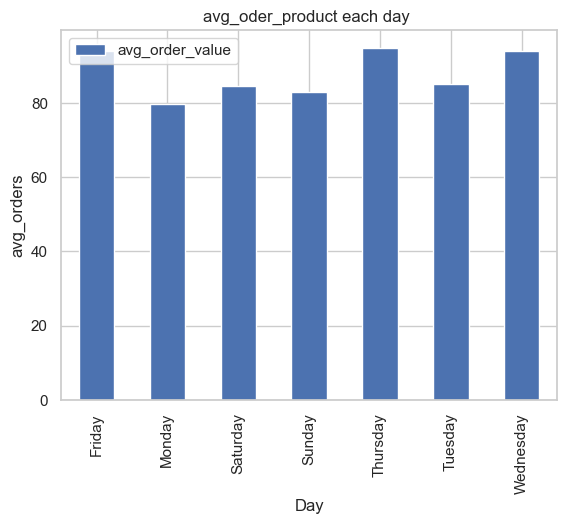

In [67]:
avg_oder_product_day.plot(kind='bar')
plt.title('avg_oder_product each day ')
plt.ylabel('avg_orders')
plt.show()

#

## Total_customers

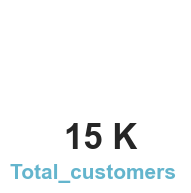

In [68]:
# Total_customers



Total_customers=round(final_df.CustomerID.nunique())
Total_customers=f'{Total_customers/100:.0f} K'
plt.figure(figsize=(2,2))
plt.text(0.5,0.1,f'{Total_customers}',ha='center',fontsize=25, fontweight='bold')
plt.axis('off')
plt.suptitle('Total_customers ',color='c',y=0.11,x=0.49,fontsize=15, fontweight='bold')
# plt.savefig("D:/A LABS FLODER/python classes/python codes/output_charts/inventory_units .jpeg")

plt.show()

## Total_new_customers

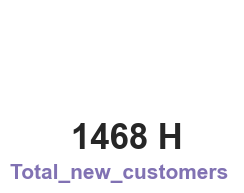

In [69]:
# Total_new_customers



Total_new_customers=round(final_df.loc[final_df['cust_seg']=='new_customers','CustomerID'].nunique())
Total_new_customers=f'{Total_new_customers/1:.0f} H'
plt.figure(figsize=(2,2))
plt.text(0.5,0.1,f'{Total_new_customers}',ha='center',fontsize=25, fontweight='bold')
plt.axis('off')
plt.suptitle('Total_new_customers ',color='m',y=0.11,x=0.49,fontsize=15, fontweight='bold')
# plt.savefig("D:/A LABS FLODER/python classes/python codes/output_charts/inventory_units .jpeg")

plt.show()

## New_customers by each product

In [70]:
no_of_new_cust=final_df.loc[final_df['cust_seg']=='new_customers'].groupby('Product_Category').agg(no_of_new_cust=('cust_seg','count'))
no_of_new_cust

no_of_new_cust
Product_Category                    
Accessories                      117
Android                           27
Apparel                        10778
Bags                            1357
Bottles                          233
Drinkware                       2220
Gift Cards                        89
Headgear                         484
Housewares                        80
Lifestyle                       1860
Nest                             955
Nest-Canada                      221
Nest-USA                        8747
Notebooks & Journals             440
Office                          4088
Waze                             337

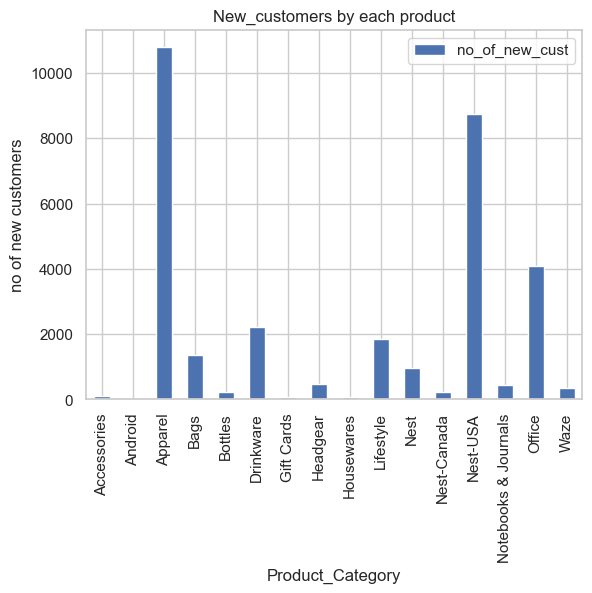

In [71]:
no_of_new_cust.plot(kind='bar')
plt.title('New_customers by each product')
plt.ylabel('no of new customers')
plt.show()

## New_customers by each month

In [72]:
new_cust_by_month=final_df.loc[final_df['cust_seg']=='new_customers'].groupby(['Month']).agg(new_cust_by_month=('cust_seg','count'))
new_cust_by_month

new_cust_by_month
Month                   
Apr                 2850
Aug                 3155
Dec                 2181
Feb                 2847
Jan                 4063
Jul                 2101
Jun                 2461
Mar                 3583
May                 3020
Nov                 1787
Oct                 2143
Sep                 1842

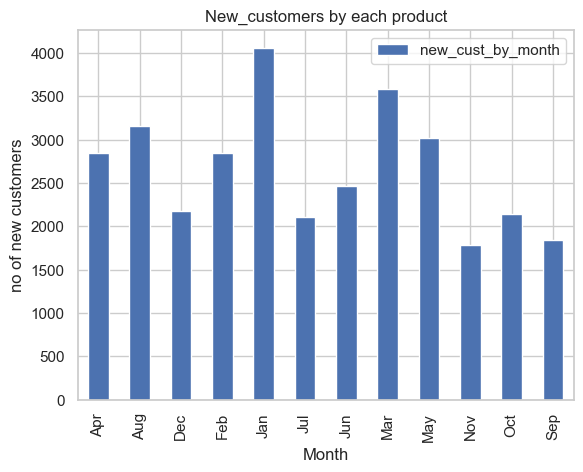

In [73]:
new_cust_by_month.plot(kind='bar')
plt.title('New_customers by each product')
plt.ylabel('no of new customers')
plt.show()

In [74]:
final_df.keys()

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Week', 'Day', 'Month', 'Coupon_Code', 'Discount_pct',
       'GST', 'Date', 'Offline_Spend', 'Online_Spend', 'Invoice_Value',
       'Min_DATE', 'cust_seg'],
      dtype='object')

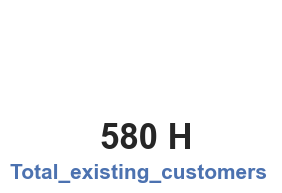

In [75]:
# Total_existing_customers



Total_existing_customers=round(final_df.loc[final_df['cust_seg']=='existing_customers','CustomerID'].nunique())
Total_existing_customers=f'{Total_existing_customers/1:.0f} H'
plt.figure(figsize=(2,2))
plt.text(0.5,0.1,f'{Total_existing_customers}',ha='center',fontsize=25, fontweight='bold')
plt.axis('off')
plt.suptitle('Total_existing_customers ',color='b',y=0.11,x=0.49,fontsize=15, fontweight='bold')
# plt.savefig("D:/A LABS FLODER/python classes/python codes/output_charts/inventory_units .jpeg")

plt.show()

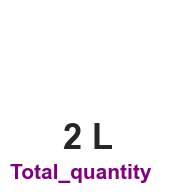

In [76]:
# Total_quantity

Total_quantity=round(final_df.Quantity.sum())
Total_quantity=f'{Total_quantity/100000:.0f} L'
plt.figure(figsize=(2,2))
plt.text(0.5,0.1,f'{Total_quantity}',ha='center',fontsize=25, fontweight='bold')
plt.axis('off')
plt.suptitle('Total_quantity ',color='purple',y=0.11,x=0.49,fontsize=15, fontweight='bold')
# plt.savefig("D:/A LABS FLODER/python classes/python codes/output_charts/inventory_units .jpeg")

plt.show()

In [77]:
final_df.keys()

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Week', 'Day', 'Month', 'Coupon_Code', 'Discount_pct',
       'GST', 'Date', 'Offline_Spend', 'Online_Spend', 'Invoice_Value',
       'Min_DATE', 'cust_seg'],
      dtype='object')

#

# Understand the trends/seasonality of sales by category, location, month etc…

In [78]:
sales_by_category_location_month=final_df.groupby(['Month','Product_Category','Location']).agg(sales=('Invoice_Value','sum'))
# ordering the month 
month_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sales_by_category_location_month=sales_by_category_location_month.loc[month_order]
sales_by_category_location_month

sales
Month Product_Category Location                  
Jan   Accessories      Chicago           57.55430
      Android          California        49.74880
                       Chicago           22.83500
                       New York          26.91380
      Apparel          California     21147.12484
...                                           ...
Dec   Waze             California       239.00850
                       Chicago          433.11456
                       New Jersey       105.24612
                       New York         129.33686
                       Washington DC     60.46200

[770 rows x 1 columns]

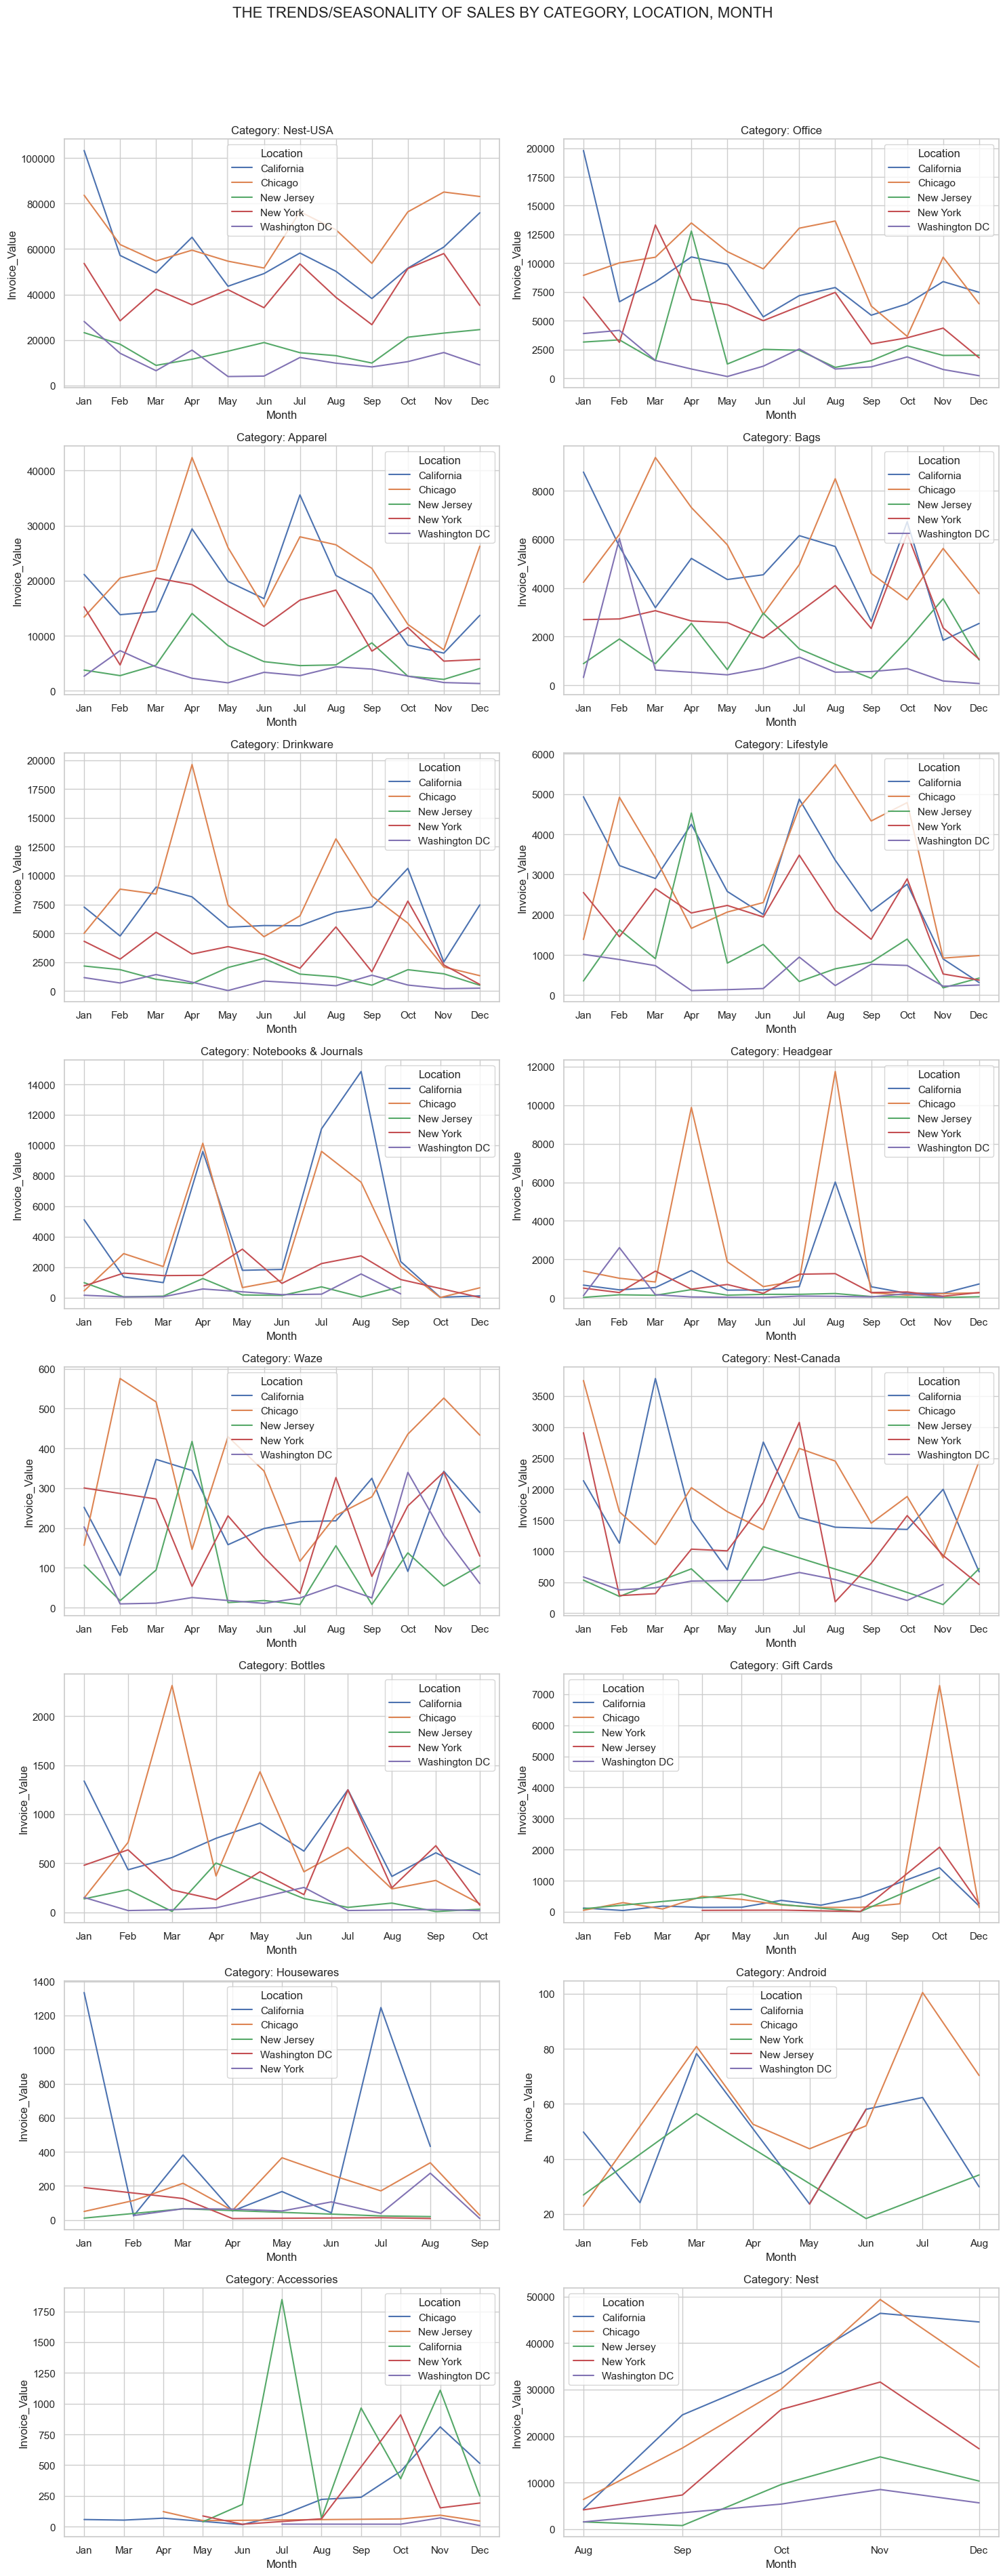

In [79]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Get unique product categories
categories = final_df['Product_Category'].unique()

# Set the number of rows and columns for subplots
rows = len(categories) // 2 + len(categories) % 2
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
fig.suptitle('THE TRENDS/SEASONALITY OF SALES BY CATEGORY, LOCATION, MONTH', fontsize=16)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each category and plot the data
for i, category in enumerate(categories):
    df_category = sales_by_category_location_month.xs(key=category, level='Product_Category', axis=0, drop_level=False)
    df_category = df_category.reset_index()
    
    # Plot the data
    sns.lineplot(x='Month', y='sales', hue='Location', data=df_category, ax=axes[i])
    
    axes[i].set_title(f'Category: {category}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Invoice_Value')
    axes[i].legend(title='Location')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


BY THE ABOVE CHATS WE CAN SEE TRENDS/SEASONALITY  BY SALES BY CATEGORY,LOCATION,MONTH
SOME CATEGORYS HAVE BOTH  TRENDS & SEASONALITY IS THERE AND SOME OTHER  CATEGORYS HAVE VERY LESS TREND WE CAN SEE THAT 

# 

## How number order varies and sales with different days?

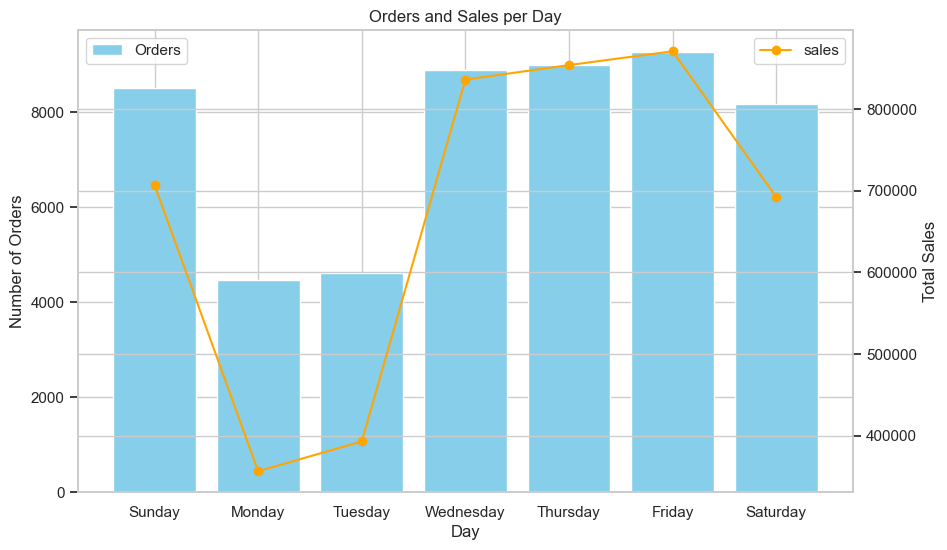

In [80]:
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
day_1=final_df.groupby(by=['Day']).agg(Orders = ('Transaction_ID','count'),sales=('Invoice_Value','sum')).loc[days]
day_1.reset_index(inplace=True)
day_1

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bar chart for Orders
ax.bar(day_1['Day'], day_1['Orders'], color='skyblue', label='Orders')

# Creating a secondary y-axis for Sales
ax2 = ax.twinx()
ax2.plot(day_1['Day'], day_1['sales'], marker='o', color='orange', label='sales')


ax.set_title('Orders and Sales per Day')
ax.set_xlabel('Day')
ax.set_ylabel('Number of Orders')
ax2.set_ylabel('Total Sales')


ax.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.xticks(rotation=45)

plt.show()


Based on the above plot, it can be observed that the highest number and sales  of orders are recorded on Friday, followed by Sunday. Conversely, Monday and Tuesday exhibit significantly lower order volumes and sales 

## Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.

In [81]:
final_df['market_spend'] = final_df['Offline_Spend'] + final_df['Online_Spend']

In [82]:
final_df['delivery_charge_percentage'] = ( final_df['Delivery_Charges']/final_df['Invoice_Value'] ) * 100

In [83]:
data = final_df.groupby(by='Month').agg(Marketing_Spends = ('market_spend',sum)).loc[month_order]

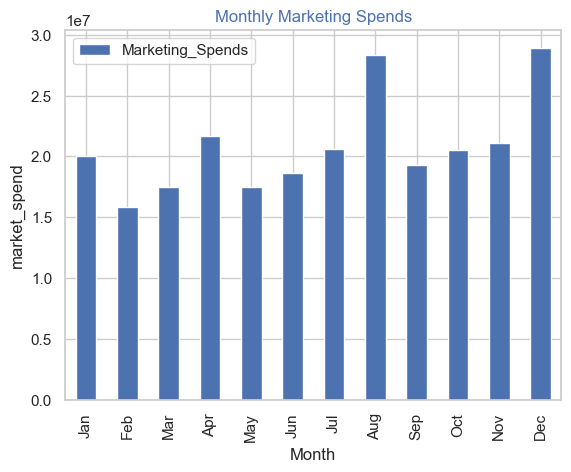

In [84]:
data.plot(kind='bar')
plt.title("Monthly Marketing Spends",c='b')
plt.ylabel('market_spend')
plt.show()

The marketing expenditures in the months of August and December are notably higher compared to the other months

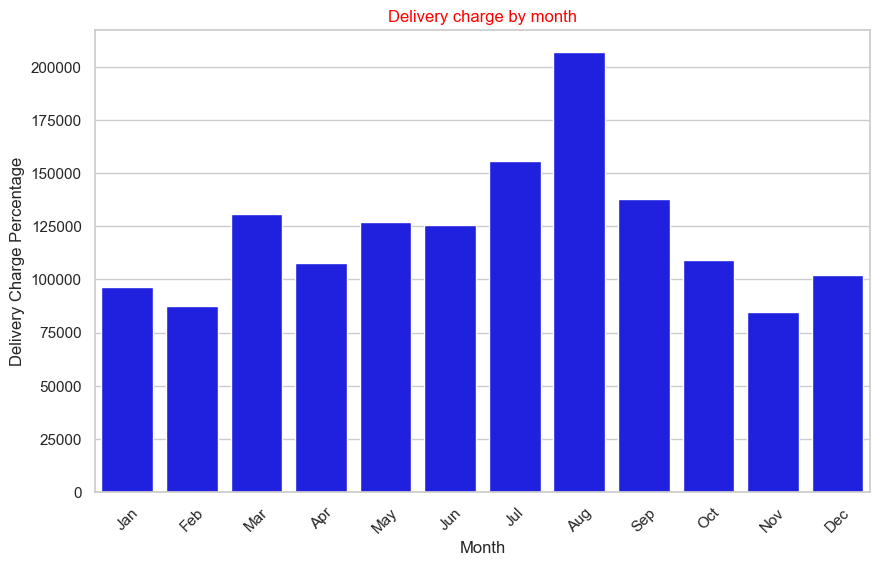

In [85]:

data = final_df.groupby(by='Month').agg(Delivery_charge_percentage=('delivery_charge_percentage', sum)).loc[month_order]

# Create a color list for bar colors
colors = ['blue' if Month not in ['August', 'December'] else 'red' for Month in month_order]


plt.figure(figsize=(10, 6))
sns.barplot(data=data, y='Delivery_charge_percentage', x=data.index, palette=colors)
plt.title("Delivery charge by month", color='red')
plt.xlabel("Month")
plt.ylabel("Delivery Charge Percentage")
plt.xticks(rotation=45)
plt.show()

The delivery charges increase during the second and third quarters of the year, followed by a decrease in the last and first quarters

## How marketing spend is impacting on revenue?

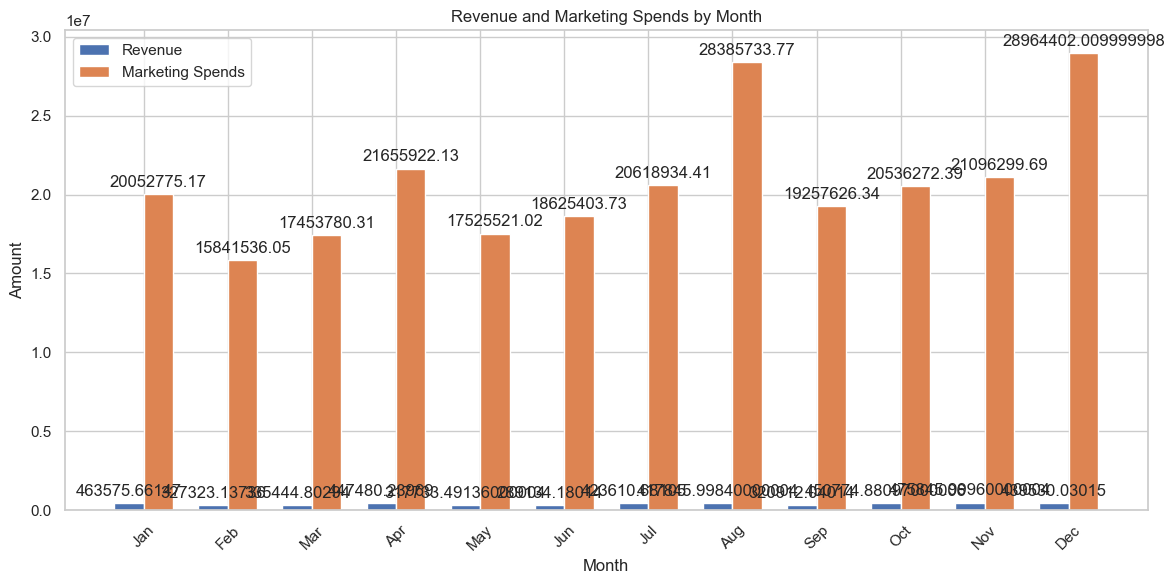

In [86]:
data = final_df.groupby(by='Month').agg(revenue = ('Invoice_Value',sum),marketing_spends = ('market_spend',sum)).loc[month_order]



# Define the width of each bar
bar_width = 0.35

# Create an array of month indices
x = np.arange(len(month_order))

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot revenue bars
revenue_bars = ax.bar(x - bar_width/2, data['revenue'], bar_width, label='Revenue')

# Plot marketing spends bars
marketing_bars = ax.bar(x + bar_width/2, data['marketing_spends'], bar_width, label='Marketing Spends')

# Add labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Amount')
ax.set_title('Revenue and Marketing Spends by Month')
ax.set_xticks(x)
ax.set_xticklabels(month_order, rotation=45)
ax.legend()

# Label each bar with their respective values
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(revenue_bars)
autolabel(marketing_bars)

plt.tight_layout()
plt.show()

There is a notable pattern of increased marketing spends occurring every three months, while sales remain relatively unchanged

## Which product was appeared in the transactions?

In [87]:
final_df.keys()

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Week', 'Day', 'Month', 'Coupon_Code', 'Discount_pct',
       'GST', 'Date', 'Offline_Spend', 'Online_Spend', 'Invoice_Value',
       'Min_DATE', 'cust_seg', 'market_spend', 'delivery_charge_percentage'],
      dtype='object')

In [88]:
products_appeared = final_df['Product_Category'].unique()

print("Products appeared in the transactions:")
print(products_appeared)

Products appeared in the transactions:
['Nest-USA' 'Office' 'Apparel' 'Bags' 'Drinkware' 'Lifestyle'
 'Notebooks & Journals' 'Headgear' 'Waze' 'Nest-Canada' 'Bottles'
 'Gift Cards' 'Housewares' 'Android' 'Accessories' 'Nest']


## Which product was purchased mostly based on the quantity?

In [89]:
final_df.keys()

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Week', 'Day', 'Month', 'Coupon_Code', 'Discount_pct',
       'GST', 'Date', 'Offline_Spend', 'Online_Spend', 'Invoice_Value',
       'Min_DATE', 'cust_seg', 'market_spend', 'delivery_charge_percentage'],
      dtype='object')

In [90]:
most_purchased_product=final_df.groupby('Product_Category').agg(total_qty=('Quantity','sum')).nlargest(6,'total_qty')
most_purchased_product

total_qty
Product_Category           
Office                88383
Apparel               32438
Drinkware             30501
Lifestyle             24881
Nest-USA              21430
Bags                  16364

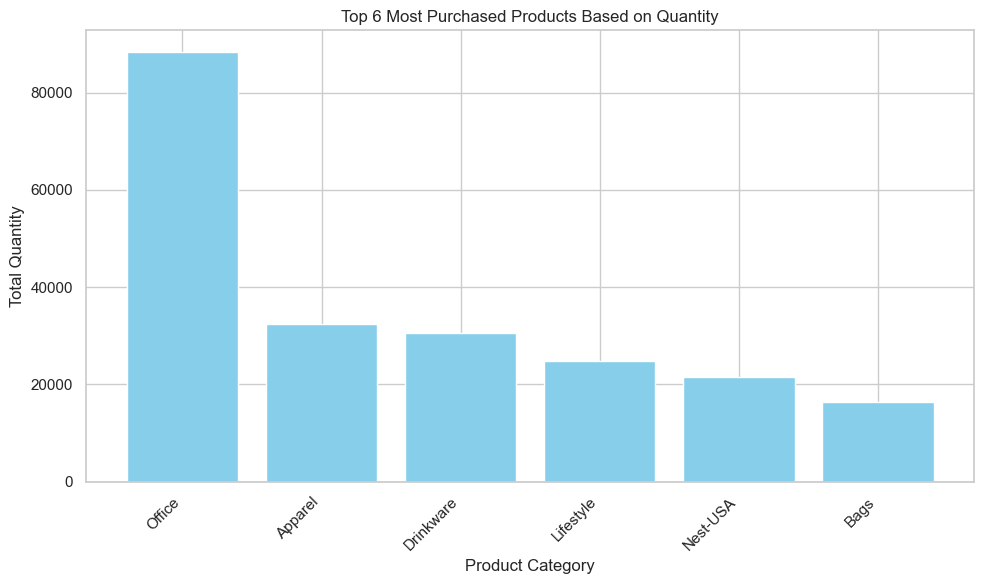

In [91]:
plt.figure(figsize=(10, 6))
plt.bar(most_purchased_product.index, most_purchased_product['total_qty'], color='skyblue')

# Adding title and labels
plt.title('Top 6 Most Purchased Products Based on Quantity')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

## Customer Segmentation

Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, 
Standard customers and define strategy on the same. 

In [92]:
final_df['Last_transaction']=final_df.groupby(by='CustomerID')['Transaction_Date'].transform(max)

In [93]:
final_df['Last_transaction'] = pd.to_datetime(final_df['Last_transaction'])

In [94]:
today = final_df['Last_transaction'].max()

In [95]:
final_df['recency'] =today - final_df['Last_transaction']

In [96]:
final_df['recency']=pd.to_numeric(final_df['recency'].astype(str).str.replace(" days",""))

In [97]:
q1 = final_df['recency'].quantile(0.25)
q2 = final_df['recency'].quantile(0.50)
q3 = final_df['recency'].quantile(0.75)

final_df['recency_score'] = np.where(final_df['recency'] <= q1, 4,
                                   np.where(final_df['recency'] <= q2, 3,
                                            np.where(final_df['recency'] <= q3, 2, 1)))


In [98]:
u=final_df.groupby(by='CustomerID').agg(frequency = ('Transaction_ID','count')).reset_index()
u

CustomerID  frequency
0          12346          2
1          12347         60
2          12348         23
3          12350         17
4          12356         36
...          ...        ...
1463       18259          7
1464       18260         40
1465       18269          8
1466       18277          1
1467       18283        102

[1468 rows x 2 columns]

In [99]:
final_df = pd.merge(left = final_df,right = u,left_on ='CustomerID',right_on = 'CustomerID',how='inner')

In [100]:
q1 = final_df['frequency'].quantile(0.25)
q2 = final_df['frequency'].quantile(0.50)
q3 = final_df['frequency'].quantile(0.75)

final_df['frequency_score'] = np.where(final_df['frequency'] <= q1, 1,
                                   np.where(final_df['frequency'] <= q2, 2,
                                            np.where(final_df['frequency'] <= q3, 3, 4)))


In [101]:
u=final_df.groupby(by='CustomerID').agg(Monetary_value = ('Invoice_Value',sum)).reset_index()

In [102]:
final_df = pd.merge(left = final_df,right = u,left_on ='CustomerID',right_on = 'CustomerID',how='inner')

In [103]:
final_df

CustomerID  Transaction_ID Transaction_Date  \
0           17850           16679       2019-01-01   
1           17850           16680       2019-01-01   
2           17850           16681       2019-01-01   
3           17850           16682       2019-01-01   
4           17850           16682       2019-01-01   
...           ...             ...              ...   
52919       14410           48493       2019-12-31   
52920       14410           48494       2019-12-31   
52921       14410           48495       2019-12-31   
52922       14600           48496       2019-12-31   
52923       14600           48497       2019-12-31   

                                     Product_Description Product_Category  \
0      Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1      Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2                  Google Laptop and Cell Phone Stickers           Office   
3      Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                        Google Canvas Tote Natural/Navy             Bags   
...                                                  ...              ...   
52919              Nest Cam Indoor Security Camera - USA         Nest-USA   
52920                            Google Zip Hoodie Black          Apparel   
52921       Nest Learning Thermostat 3rd Gen-USA - White         Nest-USA   
52922      Nest Protect Smoke + CO White Wired Alarm-USA         Nest-USA   
52923    Nest Protect Smoke + CO White Battery Alarm-USA         Nest-USA   

       Quantity  Avg_Price  Delivery_Charges Coupon_Status Gender  ...  \
0             1     153.71              6.50          Used      M  ...   
1             1     153.71              6.50          Used      M  ...   
2             1       2.05              6.50          Used      M  ...   
3             5      17.53              6.50      Not Used      M  ...   
4             1      16.50              6.50          Used      M  ...   
...         ...        ...               ...           ...    ...  ...   
52919         1     121.30              6.50       Clicked      F  ...   
52920         1      48.92              6.50          Used      F  ...   
52921         1     151.88              6.50          Used      F  ...   
52922         5      80.52              6.50       Clicked      F  ...   
52923         4      80.52             19.99       Clicked      F  ...   

        Min_DATE       cust_seg  market_spend delivery_charge_percentage  \
0     2019-01-01  new_customers       6924.50                   4.096478   
1     2019-01-01  new_customers       6924.50                   4.096478   
2     2019-01-01  new_customers       6924.50                  76.206108   
3     2019-01-01  new_customers       6924.50                   6.527133   
4     2019-01-01  new_customers       6924.50                  27.057403   
...          ...            ...           ...                        ...   
52919 2019-12-31  new_customers       6058.75                   6.506441   
52920 2019-12-31  new_customers       6058.75                  13.856935   
52921 2019-12-31  new_customers       6058.75                   5.265392   
52922 2019-12-31  new_customers       6058.75                   2.053700   
52923 2019-12-31  new_customers       6058.75                   7.459189   

      Last_transaction recency  recency_score  frequency frequency_score  \
0           2019-01-26     339              1        297               4   
1           2019-01-26     339              1        297               4   
2           2019-01-26     339              1        297               4   
3           2019-01-26     339              1        297               4   
4           2019-01-26     339              1        297               4   
...                ...     ...            ...        ...             ...   
52919       2019-12-31       0              4          8               1   
52920       2019-12-31 

In [104]:
q1 = final_df['Monetary_value'].quantile(0.25)
q2 = final_df['Monetary_value'].quantile(0.50)
q3 = final_df['Monetary_value'].quantile(0.75)

final_df['Monetary_value_score'] = np.where(final_df['Monetary_value'] <= q1, 1,
                                   np.where(final_df['Monetary_value'] <= q2, 2,
                                            np.where(final_df['Monetary_value'] <= q3, 3, 4)))


In [105]:
final_df['RFM_score'] = final_df['recency_score'] + final_df['frequency_score'] + final_df['Monetary_value_score']

In [106]:
RFM = final_df[['CustomerID','recency','frequency','Monetary_value','recency_score','frequency_score','Monetary_value_score','RFM_score']]

In [107]:
RFM=RFM.drop_duplicates(subset='CustomerID',keep='first')
RFM

CustomerID  recency  frequency  Monetary_value  recency_score  \
0           17850      339        297     37836.24239              1   
297         13047       13         44      2876.28679              4   
341         12583      151         42      2987.77264              2   
383         13748      364          1         7.81688              1   
384         15100      123          6       904.97624              2   
...           ...      ...        ...             ...            ...   
52881       14438        0          9       447.41712              4   
52890       12956        0         19      2426.63885              4   
52909       15781        0          5       599.78042              4   
52914       14410        0          8       891.00257              4   
52922       14600        0          2       584.49360              4   

       frequency_score  Monetary_value_score  RFM_score  
0                    4                     4          9  
297                  2                     2          8  
341                  2                     2          6  
383                  1                     1          3  
384                  1                     1          4  
...                ...                   ...        ...  
52881                1                     1          6  
52890                1                     1          6  
52909                1                     1          6  
52914                1                     1          6  
52922                1                     1          6  

[1468 rows x 8 columns]

In [108]:
RFM=RFM.sort_values(by=['RFM_score'],ascending=False)

In [109]:
RFM

CustomerID  recency  frequency  Monetary_value  recency_score  \
14665       12567       10        146     11225.26317              4   
33773       14298       32        241     16338.32903              4   
21410       12681       28        223     15897.14861              4   
40539       15719       13        175     15506.12020              4   
19163       14085       13        171     11200.66062              4   
...           ...      ...        ...             ...            ...   
34853       15512      208          6       159.93408              1   
34859       17525      208          9       367.94173              1   
35002       16003      207         20      1506.56712              1   
35022       13092      207          7       275.09245              1   
26810       12621      187         33      2487.74628              1   

       frequency_score  Monetary_value_score  RFM_score  
14665                4                     4         12  
33773                4                     4         12  
21410                4                     4         12  
40539                4                     4         12  
19163                4                     4         12  
...                ...                   ...        ...  
34853                1                     1          3  
34859                1                     1          3  
35002                1                     1          3  
35022                1                     1          3  
26810                1                     1          3  

[1468 rows x 8 columns]

In [110]:
RFM['Segemnt'] = np.where(RFM['RFM_score'] <3 ,"Standard",
                         np.where((RFM['RFM_score'] >=3) & (RFM['RFM_score'] <6),"Silver",
                                  np.where((RFM['RFM_score'] >=6) & (RFM['RFM_score'] <=9),"Gold","Premium"
                                 )))

In [111]:
RFM

CustomerID  recency  frequency  Monetary_value  recency_score  \
14665       12567       10        146     11225.26317              4   
33773       14298       32        241     16338.32903              4   
21410       12681       28        223     15897.14861              4   
40539       15719       13        175     15506.12020              4   
19163       14085       13        171     11200.66062              4   
...           ...      ...        ...             ...            ...   
34853       15512      208          6       159.93408              1   
34859       17525      208          9       367.94173              1   
35002       16003      207         20      1506.56712              1   
35022       13092      207          7       275.09245              1   
26810       12621      187         33      2487.74628              1   

       frequency_score  Monetary_value_score  RFM_score  Segemnt  
14665                4                     4         12  Premium  
33773                4                     4         12  Premium  
21410                4                     4         12  Premium  
40539                4                     4         12  Premium  
19163                4                     4         12  Premium  
...                ...                   ...        ...      ...  
34853                1                     1          3   Silver  
34859                1                     1          3   Silver  
35002                1                     1          3   Silver  
35022                1                     1          3   Silver  
26810                1                     1          3   Silver  

[1468 rows x 9 columns]

## Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment

In [112]:
final_df['first_tran_date'] = final_df.groupby(by='CustomerID')['Transaction_Date'].transform(min)
final_df['first_tran_date'] = pd.to_datetime(final_df['first_tran_date'])

In [113]:
final=final_df.copy()

In [114]:
# Identify datetime columns
datetime_columns = final.select_dtypes(include=['datetime64']).columns

# Print the number of datetime columns and their names
print("Number of datetime columns:", len(datetime_columns))
print("Datetime column names:", datetime_columns)

# Remove datetime columns from the DataFrame
final.drop(columns=datetime_columns, inplace=True)


Number of datetime columns: 5
Datetime column names: Index(['Transaction_Date', 'Date', 'Min_DATE', 'Last_transaction',
       'first_tran_date'],
      dtype='object')


In [115]:
num=final.select_dtypes(exclude='object')

In [116]:
num.duplicated().sum()

4940

In [117]:
num.drop_duplicates(inplace=True)

In [118]:
num=num.drop(columns=['CustomerID','Transaction_ID','Offline_Spend','Online_Spend'
                 ,'Discount_pct','delivery_charge_percentage','recency_score','frequency_score','Monetary_value_score', 'RFM_score'])

In [119]:
col = num.columns

In [120]:
col

Index(['Quantity', 'Avg_Price', 'Delivery_Charges', 'Tenure_Months', 'Week',
       'GST', 'Invoice_Value', 'market_spend', 'recency', 'frequency',
       'Monetary_value'],
      dtype='object')

In [121]:
pipe1=make_pipeline(RobustScaler(),KMeans(n_clusters=4))

In [122]:
pipe1.fit(final[col])

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kmeans', KMeans(n_clusters=4))])

In [123]:
final['K_means_labels'] = pipe1.named_steps['kmeans'].labels_

#### Evaluating the clusters

In [124]:
silhouette_score(final_df[col],final['K_means_labels'])

0.054847869747472404

In [125]:
pipe1.named_steps['kmeans'].inertia_

24008239.156035703

In [126]:
label_0=final.loc[final['K_means_labels']==0]
label_1=final.loc[final['K_means_labels']==1]
label_2=final.loc[final['K_means_labels']==2]
label_3=final.loc[final['K_means_labels']==3]

In [127]:
label_0.describe().T

count          mean           std      min  \
CustomerID                  51003.0   15341.36492    1767.23029  12347.0   
Transaction_ID              51003.0  32569.044193   8626.575669  16679.0   
Quantity                    51003.0      3.423289     10.055708      1.0   
Avg_Price                   51003.0     53.686363     64.624932      0.4   
Delivery_Charges            51003.0      7.887625       4.66977      0.0   
Tenure_Months               51003.0     26.172872     13.476827      2.0   
Week                        51003.0      27.34298     14.494328      1.0   
Discount_pct                51003.0      19.95765      8.117974     10.0   
GST                         51003.0      0.137226      0.045944     0.05   
Offline_Spend               51003.0   2836.072388    932.478618    500.0   
Online_Spend                51003.0   1894.978924    806.709507   320.25   
Invoice_Value               51003.0     82.951899    112.470723  4.37544   
market_spend                51003.0   4731.051312   1421.801829   820.25   
delivery_charge_percentage  51003.0     26.708074     23.262528      0.0   
recency                     51003.0    114.584005     95.618384      0.0   
recency_score               51003.0       2.52142      1.112909      1.0   
frequency                   51003.0    107.388958    135.389693      1.0   
frequency_score             51003.0      2.493285      1.118998      1.0   
Monetary_value              51003.0   9995.809764  14578.722068     6.99   
Monetary_value_score        51003.0      2.491579      1.119214      1.0   
RFM_score                   51003.0      7.506284      2.745405      3.0   
K_means_labels              51003.0           0.0           0.0      0.0   

                                   25%         50%          75%          max  
CustomerID                     13859.0     15311.0      16955.0      18283.0  
Transaction_ID                 25648.0     32769.0      39285.5      48497.0  
Quantity                           1.0         1.0          2.0        206.0  
Avg_Price                         5.99       16.99        119.0       355.74  
Delivery_Charges                   6.0         6.0          6.5        37.83  
Tenure_Months                     15.0        27.0         37.0         50.0  
Week                              15.0        28.0         39.0         52.0  
Discount_pct                      10.0        20.0         30.0         30.0  
GST                                0.1        0.18         0.18         0.18  
Offline_Spend                   2500.0      3000.0       3500.0       5000.0  
Online_Spend                   1253.24     1837.87      2425.35      4556.93  
Invoice_Value                   17.946    37.70896       121.23     5314.376  
market_spend                   3853.73     4674.31      5511.57       8555.3  
delivery_charge_percentage    5.419075   22.035022    40.505428    97.584777  
recency                           32.0        91.0        172.0        364.0  
recency_score                      2.0         3.0          4.0          4.0  
frequency                         33.0        63.0        118.0        695.0  
frequency_score                    1.0         2.0          3.0          4.0  
Monetary_value              2623.13861  5476.40002  10302.69635  78170.50391  
Monetary_value_score               1.0         2.0          3.0          4.0  
RFM_score                          5.0         7.0         10.0         12.0  
K_means_labels                     0.0         0.0          0.0          0.0

In [128]:
label_1.describe().T

count          mean           std        min  \
CustomerID                  106.0  14655.396226   1618.901548    12433.0   
Transaction_ID              106.0  27971.707547  10023.319545    16909.0   
Quantity                    106.0     45.933962     69.551114        1.0   
Avg_Price                   106.0     11.027358     14.526372       0.98   
Delivery_Charges            106.0    323.634528     80.818506      199.9   
Tenure_Months               106.0     24.867925     11.098756        5.0   
Week                        106.0     19.801887     17.245245        1.0   
Discount_pct                106.0     16.415094      8.416388       10.0   
GST                         106.0      0.136132        0.0474       0.05   
Offline_Spend               106.0   2853.773585   1021.126785     1000.0   
Online_Spend                106.0   1554.893302    931.927212     515.44   
Invoice_Value               106.0    545.238961    356.970259   229.7153   
market_spend                106.0   4408.666887   1572.687592    1560.02   
delivery_charge_percentage  106.0     71.017549     23.775007  10.568633   
recency                     106.0    128.481132    128.851574        0.0   
recency_score               106.0      2.660377      1.218014        1.0   
frequency                   106.0    133.283019     177.81289        1.0   
frequency_score             106.0      2.330189      1.328957        1.0   
Monetary_value              106.0  16393.677464  16796.560551  541.14814   
Monetary_value_score        106.0      3.075472      0.912329        1.0   
RFM_score                   106.0      8.066038      2.852798        3.0   
K_means_labels              106.0           1.0           0.0        1.0   

                                   25%         50%           75%          max  
CustomerID                     12935.0     14708.0       15845.0      18041.0  
Transaction_ID                 18580.0     22694.0       40807.0      45142.0  
Quantity                           2.0        25.0          62.0        475.0  
Avg_Price                          2.8       5.045         12.99        99.99  
Delivery_Charges                 294.0       324.0       339.585       521.36  
Tenure_Months                     22.0        23.0          33.0         49.0  
Week                               4.0        11.0          42.0         48.0  
Discount_pct                      10.0        10.0          20.0         30.0  
GST                                0.1        0.18          0.18         0.18  
Offline_Spend                   2000.0      2500.0        3500.0       5000.0  
Online_Spend                     939.9      1218.6       1764.36      4556.93  
Invoice_Value               337.472595   406.97825     589.31036     2365.585  
market_spend                   3498.01      3718.6       5515.44       8555.3  
delivery_charge_percentage   52.944212   76.176373     92.325753     99.09466  
recency                           15.0        76.0         265.0        362.0  
recency_score                      1.0         3.0           4.0          4.0  
frequency                         27.0        55.5         163.0        695.0  
frequency_score                    1.0         2.0           4.0          4.0  
Monetary_value              6513.06154  9012.36912  20595.066765  78170.50391  
Monetary_value_score               3.0         3.0           4.0          4.0  
RFM_score                          7.0         7.0         11.75         12.0  
K_means_labels                     1.0         1.0           1.0          1.0

In [129]:
label_2.describe().T

count          mean           std       min  \
CustomerID                  1741.0  15559.066054   1731.038304   12346.0   
Transaction_ID              1741.0  28062.864446   8022.672675   16692.0   
Quantity                    1741.0       16.3722     28.950957       1.0   
Avg_Price                   1741.0     14.333268     21.906049      0.39   
Delivery_Charges            1741.0     67.606841     31.020349     30.35   
Tenure_Months               1741.0     24.784607     13.564707       2.0   
Week                        1741.0     19.852384     13.671622       1.0   
Discount_pct                1741.0     19.810454      8.319671      10.0   
GST                         1741.0      0.146335        0.0456      0.05   
Offline_Spend               1741.0   2684.721424   1028.561542     500.0   
Online_Spend                1741.0   1853.623785    804.045998    417.73   
Invoice_Value               1741.0     167.79373    178.995612   42.4182   
market_spend                1741.0    4538.34521   1556.370858   1392.67   
delivery_charge_percentage  1741.0     58.069475     25.393495  3.235369   
recency                     1741.0    142.821367    108.983294       0.0   
recency_score               1741.0      2.245836      1.140876       1.0   
frequency                   1741.0    118.072947    151.590055       1.0   
frequency_score             1741.0      2.545089      1.092217       1.0   
Monetary_value              1741.0  11316.192705  15533.071373  124.4332   
Monetary_value_score        1741.0      2.656519        1.0712       1.0   
RFM_score                   1741.0      7.447444       2.73572       3.0   
K_means_labels              1741.0           2.0           0.0       2.0   

                                   25%         50%         75%          max  
CustomerID                     14298.0     15460.0     17231.0      18260.0  
Transaction_ID                 21258.0     25716.0     34851.0      47057.0  
Quantity                           1.0         5.0        20.0        209.0  
Avg_Price                         2.99        8.79       15.99        205.3  
Delivery_Charges                  46.5       57.74        75.0       190.42  
Tenure_Months                     13.0        24.0        39.0         50.0  
Week                               8.0        16.0        32.0         50.0  
Discount_pct                      10.0        20.0        30.0         30.0  
GST                                0.1        0.18        0.18         0.18  
Offline_Spend                   2000.0      2500.0      3500.0       5000.0  
Online_Spend                   1124.95     1827.02      2424.5      4349.02  
Invoice_Value                 72.61458   107.37094   185.85256    2127.1147  
market_spend                   3655.96     4639.99     5444.24       8555.3  
delivery_charge_percentage   37.514838   61.988725   79.015061    99.119349  
recency                           42.0       118.0       226.0        362.0  
recency_score                      1.0         2.0         3.0          4.0  
frequency                         36.0        67.0       116.0        695.0  
frequency_score                    2.0         3.0         3.0          4.0  
Monetary_value              3396.22842  6307.03888  10761.4327  78170.50391  
Monetary_value_score               2.0         3.0         4.0          4.0  
RFM_score                          5.0         7.0         9.0         12.0  
K_means_labels                     2.0         2.0         2.0          2.0

In [130]:
label_3.describe().T

count          mean           std         min  \
CustomerID                  74.0  15024.716216   1835.694147     12451.0   
Transaction_ID              74.0  31300.067568   7625.153504     17121.0   
Quantity                    74.0    406.243243    158.676962       210.0   
Avg_Price                   74.0      4.547568      4.582302        0.79   
Delivery_Charges            74.0     31.537432     45.199979         6.0   
Tenure_Months               74.0     28.608108     13.857215         5.0   
Week                        74.0     25.351351     12.882432         1.0   
Discount_pct                74.0     18.378378      8.280531        10.0   
GST                         74.0      0.118649      0.044915        0.05   
Offline_Spend               74.0   2682.432432    770.048586      1500.0   
Online_Spend                74.0   2017.827973    775.555009       484.9   
Invoice_Value               74.0   1736.368043   1951.951605     188.035   
market_spend                74.0   4700.260405   1268.073037     2485.28   
delivery_charge_percentage  74.0      4.638805      8.116702    0.067901   
recency                     74.0    111.810811    103.063842         0.0   
recency_score               74.0      2.594595      1.145795         1.0   
frequency                   74.0    131.513514    181.817705         9.0   
frequency_score             74.0      2.513514      1.062992         1.0   
Monetary_value              74.0  17551.896426  21414.577366  1056.58812   
Monetary_value_score        74.0      3.067568      1.038058         1.0   
RFM_score                   74.0      8.175676       2.58212         3.0   
K_means_labels              74.0           3.0           0.0         3.0   

                                  25%           50%          75%          max  
CustomerID                   13192.75       14888.5      16889.0      18202.0  
Transaction_ID                24863.0       31700.0      35774.0      46910.0  
Quantity                        300.0         380.5        500.0        900.0  
Avg_Price                        1.25          2.99         4.99        18.99  
Delivery_Charges                  6.0           6.5      40.1825       190.42  
Tenure_Months                    18.0          29.0         41.0         49.0  
Week                             14.0          27.0        32.75         50.0  
Discount_pct                     10.0          20.0         30.0         30.0  
GST                               0.1           0.1         0.18         0.18  
Offline_Spend                  2500.0        2500.0       3000.0       4500.0  
Online_Spend                  1294.22      2114.735      2408.61       4055.3  
Invoice_Value               530.05375        901.75    2246.1925     8979.275  
market_spend                 3737.095      4535.445    5439.2475       8555.3  
delivery_charge_percentage   0.391122       1.24167     4.408299    42.473915  
recency                          19.0          97.5       157.75        359.0  
recency_score                     2.0           2.5          4.0          4.0  
frequency                        46.0          65.0        101.0        695.0  
frequency_score                   2.0           3.0          3.0          4.0  
Monetary_value              4578.1124  10138.321375  20608.52601  78170.50391  
Monetary_value_score              2.0           3.0          4.0          4.0  
RFM_score                         7.0           8.0         10.0         12.0  
K_means_labels                    3.0           3.0          3.0          3.0

By observing the mean of the Monetary Value for all labels, we can infer that Label 3 corresponds to Platinum customers, Label 2 represents Gold customers, Label 1 denotes Silver customers, and Label 0 signifies Standard profiles of customers

Standard Customers:
Recency: These customers made a purchase some time ago but haven't returned recently.
Frequency: They do not purchase frequently.
Monetary: Their spending is lower compared to other segments.
Strategy:
Send targeted emails or SMS with special discounts or promotions to encourage repeat purchases.
Offer loyalty rewards or points for their next purchase to incentivize them to return.
Introduce new products or services that might appeal to this segment to re-engage them

Premium Segment:

Recency: These customers are your most recent buyers and are highly engaged.
Frequency: They purchase frequently and are extremely loyal.
Monetary: They are your highest spenders, contributing significantly to your revenue.
Strategy:
Provide personalized services such as dedicated account managers or priority support.
Offer exclusive access to limited edition products or services.
Create VIP events or experiences tailored specifically for Premium customers.

Gold Segment:

Recency: These customers have made recent purchases and tend to be more loyal.
Frequency: They purchase regularly but not at the level of Premium customers.
Monetary: They spend a significant amount compared to other segments but not as much as Premium customers.
Strategy:
Provide VIP treatment with early access to sales, events, or new products.
Offer exclusive discounts or perks for being Gold members.
Create referral programs where they can earn rewards for referring friends or family.

Silver Segment:

Recency: These customers have made purchases recently but are not very frequent buyers.
Frequency: They buy from you, but not as often as Gold or Premium customers.
Monetary: Their spending is moderate compared to other segments.
Strategy:
Provide personalized recommendations based on their recent purchases to encourage them to buy more.
Offer tiered discounts or exclusive offers for their next purchase to increase their loyalty.
Invite them to join a loyalty program with special benefits for Silver members.

#

## Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

In [131]:
q1 = final['RFM_score'].quantile(0.33)
q2 = final['RFM_score'].quantile(0.66)

In [132]:
final['CLV_RFM'] = np.where((final['RFM_score']<q1),"Low value",
                            np.where((final['RFM_score']>=q1) & (final['RFM_score']<q2),"Medium value","High Value"))

In [133]:
df_1 = final[['recency', 'frequency', 'Monetary_value', 'Tenure_Months', 'Coupon_Status', 'Avg_Price', 'Delivery_Charges', 'Discount_pct', 'Product_Category', 'Invoice_Value', 'Gender', 'CLV_RFM']]


In [134]:
df_1['CLV_RFM'].value_counts(normalize=True)

CLV_RFM
High Value      0.372043
Medium value    0.363030
Low value       0.264927
Name: proportion, dtype: float64

#

## model preparing 

In [135]:
X = df_1.drop(columns='CLV_RFM')
y = df_1['CLV_RFM']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [137]:
num = df_1.select_dtypes(exclude='object').columns
cat = df_1.select_dtypes(include='object').columns
num= X.select_dtypes(exclude='object').columns
cat= X.select_dtypes(include='object').columns

In [138]:
rbs=RobustScaler()
ohe = OneHotEncoder(drop='first')
rfc = RandomForestClassifier()

In [139]:
ct = make_column_transformer((rbs,num),
                            (ohe,cat))

In [140]:
pipe2 = make_pipeline(ct,rfc)

In [141]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  Index(['recency', 'frequency', 'Monetary_value', 'Tenure_Months', 'Avg_Price',
       'Delivery_Charges', 'Discount_pct', 'Invoice_Value'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Coupon_Status', 'Product_Category', 'Gender'], dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [142]:
train_preds_pipe2 = pipe2.predict(X_train)
test_preds_pipe2 = pipe2.predict(X_test)
print("Accuracy train pipe2 : ",accuracy_score(train_preds_pipe2, y_train))
print("Accuracy test pipe2 : ",accuracy_score(test_preds_pipe2, y_test))

Accuracy train pipe2 :  1.0
Accuracy test pipe2 :  1.0


In [143]:
print(classification_report(train_preds_pipe2,y_train))

              precision    recall  f1-score   support

  High Value       1.00      1.00      1.00     13094
   Low value       1.00      1.00      1.00      9327
Medium value       1.00      1.00      1.00     13038

    accuracy                           1.00     35459
   macro avg       1.00      1.00      1.00     35459
weighted avg       1.00      1.00      1.00     35459



In [144]:
cv=cross_val_score(estimator=pipe2,X=X,y=y,cv=5)
cv.mean()

0.9660266064122599

### From the above evaluation our model is having ac accuracy of 96.4% and is able to predict values correctly.

In [145]:
preds=pipe2.predict(X)

In [146]:
final['CLV_predict'] =preds

In [147]:
final.head(3)

CustomerID  Transaction_ID  \
0       17850           16679   
1       17850           16680   
2       17850           16681   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Gender Location  ...  \
0         1     153.71               6.5          Used      M  Chicago  ...   
1         1     153.71               6.5          Used      M  Chicago  ...   
2         1       2.05               6.5          Used      M  Chicago  ...   

   recency  recency_score frequency frequency_score Monetary_value  \
0      339              1       297               4    37836.24239   
1      339              1       297               4    37836.24239   
2      339              1       297               4    37836.24239   

   Monetary_value_score  RFM_score  K_means_labels     CLV_RFM  CLV_predict  
0                     4          9               0  High Value   High Value  
1                     4          9               0  High Value   High Value  
2                     4          9               0  High Value   High Value  

[3 rows x 33 columns]

#

## Cross-Selling (Which products are selling together)

In [148]:
mba  = final_df[['Transaction_ID','Product_Description','Quantity']]

In [149]:
mba['Product_Description'] = mba['Product_Description'].str.strip()

In [150]:
mba['Transaction_ID'] = mba['Transaction_ID'].astype('str')

In [151]:
basket_selling = mba.groupby(by=['Transaction_ID','Product_Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index("Transaction_ID")

In [152]:
basket_selling

Product_Description  1 oz Hand Sanitizer  \
Transaction_ID                             
16679                                0.0   
16680                                0.0   
16681                                0.0   
16682                                0.0   
16684                                0.0   
...                                  ...   
48493                                0.0   
48494                                0.0   
48495                                0.0   
48496                                0.0   
48497                                0.0   

Product_Description  20 oz Stainless Steel Insulated Tumbler  \
Transaction_ID                                                 
16679                                                    0.0   
16680                                                    0.0   
16681                                                    0.0   
16682                                                    0.0   
16684                                                    0.0   
...                                                      ...   
48493                                                    0.0   
48494                                                    0.0   
48495                                                    0.0   
48496                                                    0.0   
48497                                                    0.0   

Product_Description  22 oz Android Bottle  22 oz YouTube Bottle Infuser  \
Transaction_ID                                                            
16679                                 0.0                           0.0   
16680                                 0.0                           0.0   
16681                                 0.0                           0.0   
16682                                 0.0                           0.0   
16684                                 0.0                           0.0   
...                                   ...                           ...   
48493                                 0.0                           0.0   
48494                                 0.0                           0.0   
48495                                 0.0                           0.0   
48496                                 0.0                           0.0   
48497                                 0.0                           0.0   

Product_Description  23 oz Wide Mouth Sport Bottle  \
Transaction_ID                                       
16679                                          0.0   
16680                                          0.0   
16681                                          0.0   
16682                                          0.0   
16684                                          0.0   
...                                            ...   
48493                                          0.0   
48494                                          0.0   
48495                                          0.0   
48496                                          0.0   
48497                                          0.0   

Product_Description  24 oz YouTube Sergeant Stripe Bottle  \
Transaction_ID                                              
16679                                                 0.0   
16680                                                 0.0   
16681                                                 0.0   
16682                                                 0.0   
16684                                                 0.0   
...                                                   ...   
48493                                                 0.0   
48494                                                 0.0   
48495                                                 0.0   
48496                                                 0.0   
48497                                                 0.0   

Product_Description  25L Classic Rucksack  26 oz Double Wall Insulated Bottle  \
Transaction_ID                          

In [153]:
#we need to consolidate the items into 1 transaction per row with each product 1 hot encoded.
# Convert the units to 1 hot encoded values

In [154]:
def encode(x):
    return 1 if x >= 1 else 0


In [155]:
basket_sets = basket_selling.applymap(encode)

In [156]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

C:\Users\mailm\anaconda3\envs\new11\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [157]:
frequent_itemsets

support                                           itemsets
0  0.128886            (Nest Cam Indoor Security Camera - USA)
1  0.132796           (Nest Cam Outdoor Security Camera - USA)
2  0.140098  (Nest Learning Thermostat 3rd Gen-USA - Stainl...

In [158]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

### It appears that no products were purchased together.

#

## Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days)

In [159]:
purchase_1=final_df.groupby(by='CustomerID')['Transaction_Date'].apply(pd.Series)

In [160]:
final_df.sort_values(by=['CustomerID','Transaction_Date'],inplace = True)

In [161]:
final_df['Days_Between_Transactions'] = final_df.groupby('CustomerID')['Transaction_Date'].diff().dt.days

In [162]:
final_df.head(2)

CustomerID  Transaction_ID Transaction_Date  \
45927       12346           38223       2019-09-15   
45928       12346           38223       2019-09-15   

                                    Product_Description Product_Category  \
45927  Android Men's Engineer Short Sleeve Tee Charcoal          Apparel   
45928                    Google Stylus Pen w/ LED Light           Office   

       Quantity  Avg_Price  Delivery_Charges Coupon_Status Gender  ...  \
45927         1      19.99              75.0          Used      F  ...   
45928         2       5.50              75.0          Used      F  ...   

      Last_transaction  recency  recency_score frequency frequency_score  \
45927       2019-09-15      107              2         2               1   
45928       2019-09-15      107              2         2               1   

      Monetary_value  Monetary_value_score  RFM_score first_tran_date  \
45927      174.98174                     1          4      2019-09-15   
45928      174.98174                     1          4      2019-09-15   

       Days_Between_Transactions  
45927                        NaN  
45928                        0.0  

[2 rows x 36 columns]

In [163]:
final_df['Days_Between_Transactions'].fillna(0,inplace=True)

In [164]:
q6=final_df.groupby(by='CustomerID').agg(Mean_days = ('Days_Between_Transactions','mean'))

In [165]:
final_df=pd.merge(left=final_df,right=q6,left_on='CustomerID',right_on='CustomerID',how='inner')

In [166]:
def next_day(avg_days):
    if avg_days <= 30:
        return '0-30 days'
    elif avg_days <= 60:
        return '31-60 days'
    elif avg_days <= 90:
        return '61-90 days'
    else:
        return 'Over 90 days'


In [167]:
final_df['next_day_category']=final_df['Mean_days'].apply(next_day)

In [168]:
final_df.drop(columns=['Mean_days','Days_Between_Transactions'],inplace = True)

In [169]:
#Keeping only relevant columns
col = ['CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Quantity', 'Avg_Price','Coupon_Status', 'Discount_pct','recency', 'frequency', 'Monetary_value', 
       'RFM_score','next_day_category']

In [170]:
X = final_df[col].drop(columns='next_day_category')
y = final_df['next_day_category']

In [171]:
num = X.select_dtypes(exclude ='object').columns
cat = X.select_dtypes(include ='object').columns

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [173]:
ct = make_column_transformer((rbs,num),
                            (ohe,cat))

In [174]:
pipe3 = make_pipeline(ct,rfc)

In [175]:
pipe3.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  Index(['CustomerID', 'Tenure_Months', 'Quantity', 'Avg_Price', 'Discount_pct',
       'recency', 'frequency', 'Monetary_value', 'RFM_score'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Gender', 'Location', 'Coupon_Status'], dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [176]:
train_preds_pipe3 = pipe3.predict(X_train)
test_preds_pipe3 = pipe3.predict(X_test)
print("Accuracy train pipe3 :: ",accuracy_score(train_preds_pipe3, y_train))
print("Accuracy test pipe3 :: ",accuracy_score(test_preds_pipe3, y_test))

Accuracy train pipe3 ::  1.0
Accuracy test pipe3 ::  0.9997137131405669


In [177]:
cv=cross_val_score(estimator=pipe3,X=X,y=y,cv=5)

In [178]:
cv.mean()

0.998337157253076

###  From the above evaluation we can colclude that our model have a accuracy of 99.71 %.

In [179]:
preds2 = pipe3.predict(X)

In [180]:
final_df['predicted_next_day_category'] =preds2

# 

## Perform cohort analysis by defining below cohorts

Customers who started in each month and understand their behaviour

In [181]:
# Extracted the month of the first transaction for each customer 
final_df['Acquisition_Month'] = final_df.groupby('CustomerID')['Transaction_Date'].transform('min').dt.strftime('%b')

In [182]:
final_df.loc[final_df['Acquisition_Month']=='Jan'].describe().T

count                           mean  \
CustomerID                  10938.0                   15304.354087   
Transaction_ID              10938.0                   27556.478881   
Transaction_Date              10938  2019-05-09 03:43:01.020296192   
Quantity                    10938.0                       5.038673   
Avg_Price                   10938.0                       53.74744   
Delivery_Charges            10938.0                      12.278653   
Tenure_Months               10938.0                         27.629   
Week                        10938.0                      18.825745   
Discount_pct                10938.0                      16.651125   
GST                         10938.0                       0.136432   
Date                          10938  2019-05-09 03:43:01.020296192   
Offline_Spend               10938.0                    2907.414518   
Online_Spend                10938.0                    1890.941521   
Invoice_Value               10938.0                     101.005573   
Min_DATE                      10938  2019-01-13 19:09:58.354360832   
market_spend                10938.0                    4798.356039   
delivery_charge_percentage  10938.0                      26.983935   
Last_transaction              10938  2019-08-30 10:01:54.536478208   
recency                     10938.0                     122.582008   
recency_score               10938.0                       2.655239   
frequency                   10938.0                     223.616566   
frequency_score             10938.0                       2.977235   
Monetary_value              10938.0                   23357.642242   
Monetary_value_score        10938.0                       3.029987   
RFM_score                   10938.0                       8.662461   
first_tran_date               10938  2019-01-13 19:09:58.354360832   

                                            min                  25%  \
CustomerID                              12431.0              14031.0   
Transaction_ID                          16679.0             18549.25   
Transaction_Date            2019-01-01 00:00:00  2019-01-22 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                  6.0   
Delivery_Charges                            0.0                  6.0   
Tenure_Months                               2.0                 19.0   
Week                                        1.0                  4.0   
Discount_pct                               10.0                 10.0   
GST                                        0.05                  0.1   
Date                        2019-01-01 00:00:00  2019-01-22 00:00:00   
Offline_Spend                             500.0               2000.0   
Online_Spend                             320.25              1122.49   
Invoice_Value                           4.37544             20.43258   
Min_DATE                    2019-01-01 00:00:00  2019-01-06 00:00:00   
market_spend                             820.25              3516.04   
delivery_charge_percentage                  0.0             5.076447   
Last_transaction            2019-01-01 00:00:00  2019-06-05 00:00:00   
recency                                     0.0                 17.0   
recency_score                               1.0                  1.0   
frequency                                   1.0                 47.0   
frequency_score                             1.0                  2.0   
Monetary_value                          7.81688           4629.90629   
Monetary_value_score                        1.0                  2.0   
RFM_score                                   3.0                  6.0   
first_tran_date             2019-01-01 00:00:00  2019-01-06 00:00:00   

                                            50%                  75%  \
CustomerID                              15061.0              17069.0   
Transaction_ID                          25803.0   

In [183]:
#Customers who started in Jan have a mean frequncy of 223 means on an average they buy 223 times.
#Customers who started in Jan have mean invoice value of 101.12

In [184]:
final_df.loc[final_df['Acquisition_Month']=='Feb'].describe().T

count                           mean  \
CustomerID                  6214.0                    15468.69971   
Transaction_ID              6214.0                   28543.457354   
Transaction_Date              6214  2019-05-21 05:53:51.541680128   
Quantity                    6214.0                       4.362247   
Avg_Price                   6214.0                      51.927584   
Delivery_Charges            6214.0                      12.066881   
Tenure_Months               6214.0                      25.990666   
Week                        6214.0                      20.637271   
Discount_pct                6214.0                      20.566463   
GST                         6214.0                       0.138444   
Date                          6214  2019-05-21 05:53:51.541680128   
Offline_Spend               6214.0                    2811.152237   
Online_Spend                6214.0                    1926.922586   
Invoice_Value               6214.0                      88.594366   
Min_DATE                      6214  2019-02-12 22:04:21.860315392   
market_spend                6214.0                    4738.074823   
delivery_charge_percentage  6214.0                      27.686225   
Last_transaction              6214  2019-08-24 09:56:15.217251328   
recency                     6214.0                     128.585935   
recency_score               6214.0                       2.433054   
frequency                   6214.0                     119.891857   
frequency_score             6214.0                       3.022369   
Monetary_value              6214.0                   10213.081949   
Monetary_value_score        6214.0                        3.03299   
RFM_score                   6214.0                       8.488413   
first_tran_date               6214  2019-02-12 22:04:21.860315392   

                                            min                  25%  \
CustomerID                              12395.0              13520.0   
Transaction_ID                          19399.0              20508.0   
Transaction_Date            2019-02-01 00:00:00  2019-02-15 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                  6.8   
Delivery_Charges                            0.0                  6.0   
Tenure_Months                               2.0                 18.0   
Week                                        1.0                  7.0   
Discount_pct                               10.0                 20.0   
GST                                        0.05                  0.1   
Date                        2019-02-01 00:00:00  2019-02-15 00:00:00   
Offline_Spend                             500.0               2500.0   
Online_Spend                              484.9              1253.24   
Invoice_Value                             6.396            19.437225   
Min_DATE                    2019-02-01 00:00:00  2019-02-08 00:00:00   
market_spend                            1170.64               3877.2   
delivery_charge_percentage                  0.0             5.844273   
Last_transaction            2019-02-01 00:00:00  2019-06-23 00:00:00   
recency                                     1.0                 26.0   
recency_score                               1.0                  1.0   
frequency                                   2.0                 64.0   
frequency_score                             1.0                  3.0   
Monetary_value                         75.26412           5640.21338   
Monetary_value_score                        1.0                  3.0   
RFM_score                                   3.0                  7.0   
first_tran_date             2019-02-01 00:00:00  2019-02-08 00:00:00   

                                            50%                  75%  \
CustomerID                              15808.0              16931.0   
Transaction_ID                          26083.5             34972.75   
Tran

In [185]:
#Customers who started in Feb have a mean frequncy of 119 means on an average they buy 119 times.
#Customers who started in Feb have mean invoice value of 88.5

In [186]:
final_df.loc[final_df['Acquisition_Month']=='Mar'].describe().T

count                           mean  \
CustomerID                  7669.0                   15423.005998   
Transaction_ID              7669.0                   29578.352849   
Transaction_Date              7669  2019-06-01 20:19:11.023601664   
Quantity                    7669.0                       5.024384   
Avg_Price                   7669.0                      47.384094   
Delivery_Charges            7669.0                       11.10335   
Tenure_Months               7669.0                      24.172122   
Week                        7669.0                      22.364585   
Discount_pct                7669.0                      24.559917   
GST                         7669.0                       0.139952   
Date                          7669  2019-06-01 20:19:11.023601664   
Offline_Spend               7669.0                    2563.372017   
Online_Spend                7669.0                    1772.833965   
Invoice_Value               7669.0                      84.664503   
Min_DATE                      7669  2019-03-16 05:55:15.530056192   
market_spend                7669.0                    4336.205983   
delivery_charge_percentage  7669.0                      29.127764   
Last_transaction              7669  2019-08-22 03:21:51.096623104   
recency                     7669.0                     130.859825   
recency_score               7669.0                       2.377885   
frequency                   7669.0                       93.11892   
frequency_score             7669.0                       2.634111   
Monetary_value              7669.0                    7968.402332   
Monetary_value_score        7669.0                       2.579606   
RFM_score                   7669.0                       7.591603   
first_tran_date               7669  2019-03-16 05:55:15.530056192   

                                            min                  25%  \
CustomerID                              12347.0              14081.0   
Transaction_ID                          21625.0              23112.0   
Transaction_Date            2019-03-01 00:00:00  2019-03-17 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                 5.99   
Delivery_Charges                            0.0                  6.0   
Tenure_Months                               2.0                 14.0   
Week                                        9.0                 11.0   
Discount_pct                               10.0                 20.0   
GST                                        0.05                  0.1   
Date                        2019-03-01 00:00:00  2019-03-17 00:00:00   
Offline_Spend                             500.0               2000.0   
Online_Spend                             320.25              1172.96   
Invoice_Value                            6.3927             19.04694   
Min_DATE                    2019-03-01 00:00:00  2019-03-08 00:00:00   
market_spend                             820.25              3636.06   
delivery_charge_percentage                  0.0             6.623866   
Last_transaction            2019-03-02 00:00:00  2019-05-24 00:00:00   
recency                                     2.0                 42.0   
recency_score                               1.0                  1.0   
frequency                                   1.0                 46.0   
frequency_score                             1.0                  2.0   
Monetary_value                          14.7928           3054.38027   
Monetary_value_score                        1.0                  2.0   
RFM_score                                   3.0                  5.0   
first_tran_date             2019-03-01 00:00:00  2019-03-08 00:00:00   

                                            50%                  75%  \
CustomerID                              15356.0              16904.0   
Transaction_ID                          25835.0              35877.0   
Tran

In [187]:
#Customers who started in Feb have a mean frequncy of 93 means on an average they buy 93 times.
#Customers who started in Feb have mean invoice value of 84.6

In [188]:
final_df.loc[final_df['Acquisition_Month']=='Apr'].describe().T

count                           mean  \
CustomerID                  5015.0                   15507.903689   
Transaction_ID              5015.0                   30383.829711   
Transaction_Date              5015  2019-06-11 08:59:32.003987968   
Quantity                    5015.0                       4.525823   
Avg_Price                   5015.0                      49.503503   
Delivery_Charges            5015.0                       9.770873   
Tenure_Months               5015.0                      26.340778   
Week                        5015.0                      23.741974   
Discount_pct                5015.0                      14.516451   
GST                         5015.0                       0.138712   
Date                          5015  2019-06-11 08:59:32.003987968   
Offline_Spend               5015.0                    2982.552343   
Online_Spend                5015.0                     1912.53786   
Invoice_Value               5015.0                       94.33399   
Min_DATE                      5015  2019-04-15 01:39:03.768694016   
market_spend                5015.0                    4895.090203   
delivery_charge_percentage  5015.0                      26.682193   
Last_transaction              5015  2019-08-05 17:14:33.619142656   
recency                     5015.0                     147.281555   
recency_score               5015.0                       2.132203   
frequency                   5015.0                      65.768893   
frequency_score             5015.0                       2.283549   
Monetary_value              5015.0                    5997.130096   
Monetary_value_score        5015.0                        2.40339   
RFM_score                   5015.0                       6.819143   
first_tran_date               5015  2019-04-15 01:39:03.768694016   

                                            min                  25%  \
CustomerID                              12429.0              13984.0   
Transaction_ID                          24611.0              25513.5   
Transaction_Date            2019-04-01 00:00:00  2019-04-13 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                 6.99   
Delivery_Charges                            0.0                  6.0   
Tenure_Months                               2.0                 15.0   
Week                                       14.0                 15.0   
Discount_pct                               10.0                 10.0   
GST                                        0.05                  0.1   
Date                        2019-04-01 00:00:00  2019-04-13 00:00:00   
Offline_Spend                             500.0               2500.0   
Online_Spend                             320.25              1363.31   
Invoice_Value                            6.3927             19.57322   
Min_DATE                    2019-04-01 00:00:00  2019-04-07 00:00:00   
market_spend                             820.25              4127.19   
delivery_charge_percentage                  0.0             5.419075   
Last_transaction            2019-04-03 00:00:00  2019-04-24 00:00:00   
recency                                     7.0                 50.0   
recency_score                               1.0                  1.0   
frequency                                   1.0                 30.0   
frequency_score                             1.0                  1.0   
Monetary_value                          15.4208           2608.94972   
Monetary_value_score                        1.0                  1.0   
RFM_score                                   3.0                  5.0   
first_tran_date             2019-04-01 00:00:00  2019-04-07 00:00:00   

                                            50%                  75%  \
CustomerID                              15535.0              17340.0   
Transaction_ID                          26427.0              34404.0   
Tran

In [189]:
#Customers who started in Apr have a mean frequncy of 65 means on an average they buy 65 times.
#Customers who started in Apr have mean invoice value of 94.33

In [190]:
final_df.loc[final_df['Acquisition_Month']=='May'].describe().T

count                           mean  \
CustomerID                  4539.0                   15797.315047   
Transaction_ID              4539.0                   31695.823529   
Transaction_Date              4539  2019-06-27 11:17:19.788499712   
Quantity                    4539.0                       3.913197   
Avg_Price                   4539.0                      45.532234   
Delivery_Charges            4539.0                       9.029163   
Tenure_Months               4539.0                      25.381362   
Week                        4539.0                      26.009253   
Discount_pct                4539.0                      19.453624   
GST                         4539.0                       0.141848   
Date                          4539  2019-06-27 11:17:19.788499712   
Offline_Spend               4539.0                     2458.14056   
Online_Spend                4539.0                    1767.878782   
Invoice_Value               4539.0                      74.599997   
Min_DATE                      4539  2019-05-14 10:47:49.530733568   
market_spend                4539.0                    4226.019341   
delivery_charge_percentage  4539.0                      27.943833   
Last_transaction              4539  2019-08-20 13:04:33.628552448   
recency                     4539.0                     132.455166   
recency_score               4539.0                       2.137916   
frequency                   4539.0                      83.626129   
frequency_score             4539.0                       2.555629   
Monetary_value              4539.0                    6249.418962   
Monetary_value_score        4539.0                       2.386429   
RFM_score                   4539.0                       7.079974   
first_tran_date               4539  2019-05-14 10:47:49.530733568   

                                            min                  25%  \
CustomerID                              12370.0              14501.5   
Transaction_ID                          26901.0              27716.0   
Transaction_Date            2019-05-01 00:00:00  2019-05-10 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                 5.59   
Delivery_Charges                            0.0                  6.0   
Tenure_Months                               2.0                 15.0   
Week                                       18.0                 19.0   
Discount_pct                               10.0                 20.0   
GST                                        0.05                  0.1   
Date                        2019-05-01 00:00:00  2019-05-10 00:00:00   
Offline_Spend                             500.0               2000.0   
Online_Spend                              465.4              1153.81   
Invoice_Value                             6.396             18.12064   
Min_DATE                    2019-05-01 00:00:00  2019-05-08 00:00:00   
market_spend                              965.4              3732.47   
delivery_charge_percentage                  0.0             6.597076   
Last_transaction            2019-05-01 00:00:00  2019-05-25 00:00:00   
recency                                     4.0                 58.0   
recency_score                               1.0                  1.0   
frequency                                   1.0                 39.0   
frequency_score                             1.0                  2.0   
Monetary_value                            7.056           2532.34064   
Monetary_value_score                        1.0                  1.0   
RFM_score                                   3.0                  5.0   
first_tran_date             2019-05-01 00:00:00  2019-05-08 00:00:00   

                                            50%                  75%  \
CustomerID                              15998.0              17251.0   
Transaction_ID                          28687.0              34915.0   
Tran

In [191]:
#Customers who started in May have a mean frequncy of 83 means on an average they buy 83 times.
#Customers who started in May have mean invoice value of 74.5

In [192]:
final_df.loc[final_df['Acquisition_Month']=='Jun'].describe().T

count                           mean  \
CustomerID                  3754.0                   15314.494672   
Transaction_ID              3754.0                   33764.635855   
Transaction_Date              3754  2019-07-23 10:28:42.322855680   
Quantity                    3754.0                       4.595631   
Avg_Price                   3754.0                      47.132163   
Delivery_Charges            3754.0                       9.092778   
Tenure_Months               3754.0                      25.826585   
Week                        3754.0                      29.713905   
Discount_pct                3754.0                      26.550346   
GST                         3754.0                       0.140037   
Date                          3754  2019-07-23 10:28:42.322855680   
Offline_Spend               3754.0                    2821.390517   
Online_Spend                3754.0                    1841.645309   
Invoice_Value               3754.0                      72.580877   
Min_DATE                      3754  2019-06-15 22:49:02.141715456   
market_spend                3754.0                    4663.035826   
delivery_charge_percentage  3754.0                       29.78203   
Last_transaction              3754  2019-08-29 08:51:16.398508032   
recency                     3754.0                      123.63106   
recency_score               3754.0                       2.125466   
frequency                   3754.0                      47.419819   
frequency_score             3754.0                       1.864678   
Monetary_value              3754.0                    3541.556755   
Monetary_value_score        3754.0                       1.732019   
RFM_score                   3754.0                       5.722163   
first_tran_date               3754  2019-06-15 22:49:02.141715456   

                                            min                  25%  \
CustomerID                              12348.0              13846.0   
Transaction_ID                          29371.0              30171.0   
Transaction_Date            2019-06-01 00:00:00  2019-06-12 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                 5.59   
Delivery_Charges                            0.0                  6.0   
Tenure_Months                               2.0                 11.0   
Week                                       22.0                 24.0   
Discount_pct                               10.0                 30.0   
GST                                        0.05                  0.1   
Date                        2019-06-01 00:00:00  2019-06-12 00:00:00   
Offline_Spend                             500.0               2500.0   
Online_Spend                             320.25              1394.83   
Invoice_Value                             6.352             16.97754   
Min_DATE                    2019-06-01 00:00:00  2019-06-09 00:00:00   
market_spend                             820.25              4084.43   
delivery_charge_percentage                  0.0             6.506441   
Last_transaction            2019-06-02 00:00:00  2019-06-16 00:00:00   
recency                                     3.0                 51.0   
recency_score                               1.0                  1.0   
frequency                                   1.0                 25.0   
frequency_score                             1.0                  1.0   
Monetary_value                         16.72974          1517.643688   
Monetary_value_score                        1.0                  1.0   
RFM_score                                   3.0                  4.0   
first_tran_date             2019-06-01 00:00:00  2019-06-09 00:00:00   

                                            50%                  75%  \
CustomerID                              15379.0              16885.0   
Transaction_ID                          31010.0              36565.0   
Tran

In [193]:
#Customers who started in Jun have a mean frequncy of 47 means on an average they buy 47 times.
#Customers who started in Jun have mean invoice value of 72.5

In [194]:
final_df.loc[final_df['Acquisition_Month']=='Jul'].describe().T

count                           mean  \
CustomerID                  2984.0                   15091.161193   
Transaction_ID              2984.0                   35501.234584   
Transaction_Date              2984  2019-08-14 02:15:36.193029632   
Quantity                    2984.0                       3.991622   
Avg_Price                   2984.0                      49.212912   
Delivery_Charges            2984.0                        8.19868   
Tenure_Months               2984.0                      25.889075   
Week                        2984.0                      32.820375   
Discount_pct                2984.0                      13.438338   
GST                         2984.0                       0.139357   
Date                          2984  2019-08-14 02:15:36.193029632   
Offline_Spend               2984.0                    2556.467828   
Online_Spend                2984.0                    1707.557671   
Invoice_Value               2984.0                      84.381686   
Min_DATE                      2984  2019-07-16 12:00:57.908847104   
market_spend                2984.0                    4264.025499   
delivery_charge_percentage  2984.0                      26.898419   
Last_transaction              2984  2019-09-09 23:09:48.739946496   
recency                     2984.0                     112.034853   
recency_score               2984.0                       2.500335   
frequency                   2984.0                       88.52681   
frequency_score             2984.0                       2.462131   
Monetary_value              2984.0                    7296.217657   
Monetary_value_score        2984.0                       2.474866   
RFM_score                   2984.0                       7.437332   
first_tran_date               2984  2019-07-16 12:00:57.908847104   

                                            min                  25%  \
CustomerID                              12377.0              13764.0   
Transaction_ID                          31700.0              32612.0   
Transaction_Date            2019-07-01 00:00:00  2019-07-13 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                  5.7   
Delivery_Charges                            0.0                  6.0   
Tenure_Months                               2.0                 10.0   
Week                                       27.0                 28.0   
Discount_pct                               10.0                 10.0   
GST                                        0.05                  0.1   
Date                        2019-07-01 00:00:00  2019-07-13 00:00:00   
Offline_Spend                            1500.0               2000.0   
Online_Spend                             478.27              1128.09   
Invoice_Value                            6.8157              17.0781   
Min_DATE                    2019-07-01 00:00:00  2019-07-06 00:00:00   
market_spend                            1978.27               3651.7   
delivery_charge_percentage                  0.0               5.3481   
Last_transaction            2019-07-03 00:00:00  2019-07-24 00:00:00   
recency                                     6.0                 56.0   
recency_score                               1.0                  2.0   
frequency                                   1.0                 29.0   
frequency_score                             1.0                  1.0   
Monetary_value                          13.6464            2921.7597   
Monetary_value_score                        1.0                  2.0   
RFM_score                                   3.0                  5.0   
first_tran_date             2019-07-01 00:00:00  2019-07-06 00:00:00   

                                            50%                  75%  \
CustomerID                              14840.5              16686.0   
Transaction_ID                          33702.0             36936.25   
Tran

In [195]:
#Customers who started in Jul have a mean frequncy of 88 means on an average they buy 88 times.
#Customers who started in Jul have mean invoice value of 84.3

In [196]:
final_df.loc[final_df['Acquisition_Month']=='Aug'].describe().T

count                           mean  \
CustomerID                  3691.0                   14947.933622   
Transaction_ID              3691.0                   36697.505554   
Transaction_Date              3691  2019-08-26 20:42:58.813329664   
Quantity                    3691.0                       3.799241   
Avg_Price                   3691.0                      42.872753   
Delivery_Charges            3691.0                       9.165261   
Tenure_Months               3691.0                      25.571661   
Week                        3691.0                        34.6356   
Discount_pct                3691.0                       20.23029   
GST                         3691.0                       0.143303   
Date                          3691  2019-08-26 20:42:58.813329664   
Offline_Spend               3691.0                    2787.862368   
Online_Spend                3691.0                    1914.760293   
Invoice_Value               3691.0                      70.966357   
Min_DATE                      3691  2019-08-15 00:50:43.077756928   
market_spend                3691.0                    4702.622661   
delivery_charge_percentage  3691.0                      31.747972   
Last_transaction              3691  2019-09-20 13:57:14.191276032   
recency                     3691.0                     101.418586   
recency_score               3691.0                       2.511785   
frequency                   3691.0                      61.600379   
frequency_score             3691.0                        2.15443   
Monetary_value              3691.0                    4515.561672   
Monetary_value_score        3691.0                       1.920076   
RFM_score                   3691.0                       6.586291   
first_tran_date               3691  2019-08-15 00:50:43.077756928   

                                            min                  25%  \
CustomerID                              12359.0              13187.0   
Transaction_ID                          34287.0              35043.5   
Transaction_Date            2019-08-01 00:00:00  2019-08-08 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                  4.8   
Delivery_Charges                            0.0                  6.0   
Tenure_Months                               2.0                 13.0   
Week                                       31.0                 32.0   
Discount_pct                               10.0                 20.0   
GST                                        0.05                  0.1   
Date                        2019-08-01 00:00:00  2019-08-08 00:00:00   
Offline_Spend                            1500.0               2500.0   
Online_Spend                             641.12               1528.1   
Invoice_Value                             6.352             14.46138   
Min_DATE                    2019-08-01 00:00:00  2019-08-07 00:00:00   
market_spend                            2141.12              4143.02   
delivery_charge_percentage                  0.0             7.923002   
Last_transaction            2019-08-01 00:00:00  2019-08-11 00:00:00   
recency                                    12.0                 53.0   
recency_score                               2.0                  2.0   
frequency                                   1.0                 23.0   
frequency_score                             1.0                  1.0   
Monetary_value                          8.63376           1629.65368   
Monetary_value_score                        1.0                  1.0   
RFM_score                                   4.0                  4.0   
first_tran_date             2019-08-01 00:00:00  2019-08-07 00:00:00   

                                            50%                  75%  \
CustomerID                              14672.0              16735.0   
Transaction_ID                          35963.0              36756.0   
Tran

In [197]:
#Customers who started in Aug have a mean frequncy of 61 means on an average they buy 61 times.
#Customers who started in Aug have mean invoice value of 70.9

In [198]:
final_df.loc[final_df['Acquisition_Month']=='Sep'].describe().T

count                           mean  \
CustomerID                  1893.0                   14934.905441   
Transaction_ID              1893.0                   38273.751717   
Transaction_Date              1893  2019-09-15 10:52:40.697305600   
Quantity                    1893.0                       5.258848   
Avg_Price                   1893.0                      45.681342   
Delivery_Charges            1893.0                       9.736698   
Tenure_Months               1893.0                      26.786582   
Week                        1893.0                      37.404649   
Discount_pct                1893.0                      29.661912   
GST                         1893.0                       0.140449   
Date                          1893  2019-09-15 10:52:40.697305600   
Offline_Spend               1893.0                    2775.488642   
Online_Spend                1893.0                    1699.551035   
Invoice_Value               1893.0                      72.389746   
Min_DATE                      1893  2019-09-13 22:21:52.202852352   
market_spend                1893.0                    4475.039678   
delivery_charge_percentage  1893.0                      32.872808   
Last_transaction              1893  2019-09-22 22:17:18.351822592   
recency                     1893.0                      99.071315   
recency_score               1893.0                       2.231907   
frequency                   1893.0                      50.447438   
frequency_score             1893.0                       2.009509   
Monetary_value              1893.0                     3626.08597   
Monetary_value_score        1893.0                       1.753302   
RFM_score                   1893.0                       5.994717   
first_tran_date               1893  2019-09-13 22:21:52.202852352   

                                            min                  25%  \
CustomerID                              12346.0              13048.0   
Transaction_ID                          37184.0              37613.0   
Transaction_Date            2019-09-01 00:00:00  2019-09-07 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                  0.79                 4.08   
Delivery_Charges                            0.0                  6.0   
Tenure_Months                               2.0                 16.0   
Week                                       35.0                 36.0   
Discount_pct                               10.0                 30.0   
GST                                        0.05                  0.1   
Date                        2019-09-01 00:00:00  2019-09-07 00:00:00   
Offline_Spend                            2500.0               2500.0   
Online_Spend                              484.9              1292.58   
Invoice_Value                           6.91686             14.25174   
Min_DATE                    2019-09-01 00:00:00  2019-09-07 00:00:00   
market_spend                             2984.9              3792.58   
delivery_charge_percentage                  0.0             7.617597   
Last_transaction            2019-09-01 00:00:00  2019-09-07 00:00:00   
recency                                    12.0                 96.0   
recency_score                               2.0                  2.0   
frequency                                   1.0                 24.0   
frequency_score                             1.0                  1.0   
Monetary_value                           7.7243           1487.63402   
Monetary_value_score                        1.0                  1.0   
RFM_score                                   4.0                  4.0   
first_tran_date             2019-09-01 00:00:00  2019-09-07 00:00:00   

                                            50%                  75%  \
CustomerID                              14657.0              16912.0   
Transaction_ID                          38095.0              38883.0   
Tran

In [199]:
#Customers who started in Sept have a mean frequncy of 50 means on an average they buy 50 times.
#Customers who started in Sept have mean invoice value of 72.3

In [200]:
final_df.loc[final_df['Acquisition_Month']=='Oct'].describe().T

count                           mean  \
CustomerID                  2226.0                   14818.323001   
Transaction_ID              2226.0                   41006.139263   
Transaction_Date              2226  2019-10-17 11:49:38.975741184   
Quantity                    2226.0                       4.269542   
Avg_Price                   2226.0                      67.043648   
Delivery_Charges            2226.0                      12.448455   
Tenure_Months               2226.0                      25.398473   
Week                        2226.0                      42.033243   
Discount_pct                2226.0                       10.49416   
GST                         2226.0                        0.12973   
Date                          2226  2019-10-17 11:49:38.975741184   
Offline_Spend               2226.0                    3130.952381   
Online_Spend                2226.0                     1972.77699   
Invoice_Value               2226.0                     113.733446   
Min_DATE                      2226  2019-10-15 20:07:45.768194048   
market_spend                2226.0                    5103.729371   
delivery_charge_percentage  2226.0                      25.854028   
Last_transaction              2226  2019-10-21 22:59:11.482479872   
recency                     2226.0                      70.042228   
recency_score               2226.0                       3.053459   
frequency                   2226.0                      51.934412   
frequency_score             2226.0                       1.975741   
Monetary_value              2226.0                    5693.436007   
Monetary_value_score        2226.0                       2.316712   
RFM_score                   2226.0                       7.345912   
first_tran_date               2226  2019-10-15 20:07:45.768194048   

                                            min                  25%  \
CustomerID                              12421.0              13742.0   
Transaction_ID                          39484.0             40204.25   
Transaction_Date            2019-10-01 00:00:00  2019-10-09 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                 4.56   
Delivery_Charges                            0.0                  6.0   
Tenure_Months                               2.0                 11.0   
Week                                       40.0                 41.0   
Discount_pct                               10.0                 10.0   
GST                                        0.05                  0.1   
Date                        2019-10-01 00:00:00  2019-10-09 00:00:00   
Offline_Spend                            2000.0               2500.0   
Online_Spend                             734.31              1416.14   
Invoice_Value                            6.3927            17.886435   
Min_DATE                    2019-10-01 00:00:00  2019-10-08 06:00:00   
market_spend                            2780.15              4511.94   
delivery_charge_percentage                  0.0             4.846135   
Last_transaction            2019-10-01 00:00:00  2019-10-11 00:00:00   
recency                                    12.0                 66.0   
recency_score                               3.0                  3.0   
frequency                                   1.0                 24.0   
frequency_score                             1.0                  1.0   
Monetary_value                             6.99           2378.70174   
Monetary_value_score                        1.0                  1.0   
RFM_score                                   5.0                  6.0   
first_tran_date             2019-10-01 00:00:00  2019-10-08 06:00:00   

                                            50%                  75%  \
CustomerID                              14257.0              16133.0   
Transaction_ID                          40934.0              41671.0   
Tran

In [201]:
#Customers who started in Sept have a mean frequncy of 51 means on an average they buy 51 times.
#Customers who started in Sept have mean invoice value of 113.7

In [202]:
final_df.loc[final_df['Acquisition_Month']=='Nov'].describe().T

count                           mean  \
CustomerID                  1820.0                   15646.737912   
Transaction_ID              1820.0                   43611.407143   
Transaction_Date              1820  2019-11-15 04:02:54.065934080   
Quantity                    1820.0                        4.01044   
Avg_Price                   1820.0                      81.809159   
Delivery_Charges            1820.0                       8.310033   
Tenure_Months               1820.0                      26.952198   
Week                        1820.0                      46.113736   
Discount_pct                1820.0                      20.181319   
GST                         1820.0                       0.119401   
Date                          1820  2019-11-15 04:02:54.065934080   
Offline_Spend               1820.0                    3019.505495   
Online_Spend                1820.0                    2206.124505   
Invoice_Value               1820.0                     114.408577   
Min_DATE                      1820  2019-11-14 18:34:48.791208704   
market_spend                1820.0                        5225.63   
delivery_charge_percentage  1820.0                      22.270453   
Last_transaction              1820  2019-11-17 05:34:40.879120896   
recency                     1820.0                      43.767582   
recency_score               1820.0                       3.149451   
frequency                   1820.0                      41.979121   
frequency_score             1820.0                       1.665385   
Monetary_value              1820.0                    4792.164723   
Monetary_value_score        1820.0                       2.105495   
RFM_score                   1820.0                        6.92033   
first_tran_date               1820  2019-11-14 18:34:48.791208704   

                                            min                  25%  \
CustomerID                              12468.0              14502.0   
Transaction_ID                          42268.0             42737.75   
Transaction_Date            2019-11-01 00:00:00  2019-11-06 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                  5.5   
Delivery_Charges                            6.0                  6.0   
Tenure_Months                               3.0                 16.0   
Week                                       44.0                 45.0   
Discount_pct                               20.0                 20.0   
GST                                        0.05                  0.1   
Date                        2019-11-01 00:00:00  2019-11-06 00:00:00   
Offline_Spend                            2000.0               2500.0   
Online_Spend                              484.9              1642.31   
Invoice_Value                             6.352               19.688   
Min_DATE                    2019-11-01 00:00:00  2019-11-06 00:00:00   
market_spend                             2984.9              4415.27   
delivery_charge_percentage              0.63597             4.375729   
Last_transaction            2019-11-01 00:00:00  2019-11-08 00:00:00   
recency                                    13.0                 35.0   
recency_score                               3.0                  3.0   
frequency                                   1.0                 24.0   
frequency_score                             1.0                  1.0   
Monetary_value                         34.58608            2522.6001   
Monetary_value_score                        1.0                  1.0   
RFM_score                                   5.0                  6.0   
first_tran_date             2019-11-01 00:00:00  2019-11-06 00:00:00   

                                            50%                  75%  \
CustomerID                              15864.0              17027.0   
Transaction_ID                          43538.0              44481.0   
Tran

In [203]:
#Customers who started in Nov have a mean frequncy of 41 means on an average they buy 41 times.
#Customers who started in Nov have mean invoice value of 114.4

In [204]:
final_df.loc[final_df['Acquisition_Month']=='Dec'].describe().T

count                           mean  \
CustomerID                  2181.0                   15361.153141   
Transaction_ID              2181.0                   46838.105456   
Transaction_Date              2181  2019-12-13 22:30:12.379642368   
Quantity                    2181.0                       3.153599   
Avg_Price                   2181.0                      77.534516   
Delivery_Charges            2181.0                       8.490348   
Tenure_Months               2181.0                      28.205869   
Week                        2181.0                      48.004585   
Discount_pct                2181.0                           30.0   
GST                         2181.0                       0.123388   
Date                          2181  2019-12-13 22:30:12.379642368   
Offline_Spend               2181.0                    3920.678588   
Online_Spend                2181.0                    2577.799982   
Invoice_Value               2181.0                      95.493782   
Min_DATE                      2181  2019-12-13 14:24:55.460797696   
market_spend                2181.0                    6498.478569   
delivery_charge_percentage  2181.0                      23.099721   
Last_transaction              2181  2019-12-14 16:34:19.972489984   
recency                     2181.0                      16.309491   
recency_score               2181.0                            4.0   
frequency                   2181.0                      61.929849   
frequency_score             2181.0                       1.787254   
Monetary_value              2181.0                     6446.40193   
Monetary_value_score        2181.0                       1.979367   
RFM_score                   2181.0                       7.766621   
first_tran_date               2181  2019-12-13 14:24:55.460797696   

                                            min                  25%  \
CustomerID                              12350.0              13800.0   
Transaction_ID                          45272.0              46114.0   
Transaction_Date            2019-12-01 00:00:00  2019-12-08 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                  0.39                13.85   
Delivery_Charges                            0.0                  6.5   
Tenure_Months                               2.0                 17.0   
Week                                        1.0                 49.0   
Discount_pct                               30.0                 30.0   
GST                                        0.05                  0.1   
Date                        2019-12-01 00:00:00  2019-12-08 00:00:00   
Offline_Spend                            3000.0               3500.0   
Online_Spend                             663.46              2011.57   
Invoice_Value                            6.3927             21.31018   
Min_DATE                    2019-12-01 00:00:00  2019-12-08 00:00:00   
market_spend                            4409.19              5511.57   
delivery_charge_percentage                  0.0             5.265392   
Last_transaction            2019-12-01 00:00:00  2019-12-09 00:00:00   
recency                                     0.0                 11.0   
recency_score                               4.0                  4.0   
frequency                                   1.0                 18.0   
frequency_score                             1.0                  1.0   
Monetary_value                         19.06284            1431.1339   
Monetary_value_score                        1.0                  1.0   
RFM_score                                   6.0                  6.0   
first_tran_date             2019-12-01 00:00:00  2019-12-08 00:00:00   

                                            50%                  75%  \
CustomerID                              15203.0              17337.0   
Transaction_ID                          46918.0              47619.0   
Tran

In [205]:
#Customers who started in Nov have a mean frequncy of 61 means on an average they buy 61 times.
#Customers who started in Nov have mean invoice value of 95.4

#

## Which Month cohort has maximum retention

In [206]:
final_df['Transaction_Date'] = pd.to_datetime(final_df['Transaction_Date'])

In [207]:
final_df['Acquisition_Month'] = final_df.groupby('CustomerID')['Transaction_Date'].transform('min').dt.strftime('%b')

In [208]:
cohorts = final_df.groupby('Acquisition_Month')
retention_table = pd.DataFrame(index=cohorts.size().index, columns=month_order)

In [209]:
retention_table = pd.DataFrame(index=cohorts.size().index, columns=month_order)
for cohort, group in cohorts:
    cohort_size = len(group['CustomerID'].unique())
    for i in month_order:
        active_customers = group[group['Transaction_Date'].dt.strftime('%b') == i]['CustomerID'].nunique()
        retention_rate = active_customers / cohort_size
        retention_table.loc[cohort, i] = retention_rate

In [210]:
retention_table.loc[month_order]

Jan       Feb       Mar       Apr       May       Jun  \
Acquisition_Month                                                          
Jan                1.0  0.060465  0.111628   0.15814  0.106977  0.204651   
Feb                0.0       1.0  0.072917   0.09375  0.166667  0.177083   
Mar                0.0       0.0       1.0  0.101695   0.19774  0.141243   
Apr                0.0       0.0       0.0       1.0   0.08589  0.147239   
May                0.0       0.0       0.0       0.0       1.0  0.107143   
Jun                0.0       0.0       0.0       0.0       0.0       1.0   
Jul                0.0       0.0       0.0       0.0       0.0       0.0   
Aug                0.0       0.0       0.0       0.0       0.0       0.0   
Sep                0.0       0.0       0.0       0.0       0.0       0.0   
Oct                0.0       0.0       0.0       0.0       0.0       0.0   
Nov                0.0       0.0       0.0       0.0       0.0       0.0   
Dec                0.0       0.0       0.0       0.0       0.0       0.0   

                        Jul       Aug       Sep       Oct       Nov       Dec  
Acquisition_Month                                                              
Jan                0.162791  0.218605  0.106977  0.130233  0.093023   0.15814  
Feb                0.229167  0.197917   0.15625     0.125  0.114583  0.166667  
Mar                0.180791  0.186441  0.124294  0.124294  0.084746  0.107345  
Apr                0.147239  0.110429  0.092025   0.06135   0.09816   0.07362  
May                0.080357  0.116071  0.089286  0.116071     0.125  0.071429  
Jun                0.145985  0.160584  0.087591  0.080292   0.10219  0.080292  
Jul                     1.0  0.138298  0.042553   0.06383  0.117021  0.095745  
Aug                     0.0       1.0  0.103704  0.111111  0.074074  0.059259  
Sep                     0.0       0.0       1.0  0.076923  0.038462  0.025641  
Oct                     0.0       0.0       0.0       1.0  0.068966  0.045977  
Nov                     0.0       0.0       0.0       0.0       1.0  0.102941  
Dec                     0.0       0.0       0.0       0.0       0.0       1.0

### From the above table we can say that retention rate of customers acquired in JAN.

In [211]:
retention_table = retention_table.astype(float)
max_retention_month = retention_table.max().idxmax()
print("Month with Maximum Retention Rate:: ", max_retention_month)

Month with Maximum Retention Rate::  Jan
